# Описание проекта

Необходимо создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.

Идея решения задачи от заказчика:

1.  Создать модель предсказания ДТП (целевое значение — **at_fault (виновник)** в таблице **parties)**
    -   Для модели выбрать тип виновника — только машина (**car**).
    -   Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
    -   Для моделирования ограничиться данными за 2012 год — они самые свежие.
    -   Обязательное условие — учесть фактор возраста автомобиля.
2.  На основе модели исследовать основные факторы ДТП.
3.  Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
    -   Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
    -   Какие ещё факторы нужно учесть?
    -   Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Заказчик предлагает вам поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы.

#### Цель работы
Путем исследования ответить на вопросы:
1.   Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
2.   Какие ещё факторы нужно учесть?
3.   Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

#### Содержание работы
Работа пройдет в следующие этапы:
1. Подключение к БД и ознакомление с данными
2. Статистический анализ факторов в рамках совещания рабочей группы
3. Создание модели для оценки водительского риска
4. Анализ важности факторов ДТП
5. Выводы по работе

## Описание таблиц данных

### ER - диаграмма

![image](https://pictures.s3.yandex.net/resources/1.7_2880border_1_1654004672.png)

### **collisions (информация о происшествиях)**

|                      Описание                      |    Обозначение в таблице    |                                                                         Подробнее                                                                        |
|:--------------------------------------------------:|:---------------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------:|
| Идентификационный  Номер в базе данных             | CASE_ID                     | Уникальный номер для зарегистрированного происшествия в таблице происшествий.                                                                            |
| Дата происшествия                                  | COLLISION_DATE              | Формат год/месяц/день                                                                                                                                    |
| Время происшествия                                 | COLLISION_TIME              | Формат: 24-часовой                                                                                                                                       |
| Является ли место происшествие перекрёстком        | INTERSECTION                | Y — Intersection (перекрёсток)                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | N — Not Intersection (не перекрёсток)                                                                                                                    |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | -- — Not stated (Не указано)                                                                                                                             |
| Погода                                             | WEATHER_1                   | A — Clear (Ясно)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Cloudy (Облачно)                                                                                                                                     |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Raining (Дождь)                                                                                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Snowing (Снегопад)                                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Fog (Туман)                                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | F — Other (Другое)                                                                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | G — Wind (Ветер)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Серьёзность происшествия                           | COLLISION_DAMAGE            | 1 — FATAL ТС (Не подлежит восстановлению)                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 2 — SEVERE DAMAGE (Серьёзный ремонт, большая часть под замену/Серьёзное повреждение капитального строения)                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 3 — MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло)                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 4 — SMALL DAMAGE (Отдельный элемент кузова под замену/покраску)                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 0 – SCRATCH (Царапина)                                                                                                                                   |
| Основной фактор аварии                             | PRIMARY_COLL_FACTOR         | A — Code Violation (Нарушение правил ПДД)                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Other Improper Driving (Другое неправильное вождение)                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Other Than Driver (Кроме водителя)                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Unknown (Неизвестно)                                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Fell Asleep (Заснул)                                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Состояние дороги                                   | ROAD_SURFACE                | A — Dry (Сухая)                                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Wet (Мокрая)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Snowy or Icy (Заснеженная или обледенелая)                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.)                                                                               |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Освещение                                          | LIGHTING                    | A — Daylight (Дневной свет)                                                                                                                              |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Dusk-Dawn (Сумерки-Рассвет)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Dark-Street Lights (Темно-Уличные фонари)                                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Dark-No Street Lights (Темно-Нет уличных фонарей)                                                                                                    |
|                                                    |                             | E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают)                                                                                |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Номер географических районов, где произошло ДТП    | COUNTY_CITY_LOCATION        | число                                                                                                                                                    |
| Названия географических районов, где произошло ДТП | COUNTY_LOCATION             | список разных названий, категориальный тип данных                                                                                                        |
| Направление движения                               | DIRECTION                   | N — North (Север)                                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — East (Восток)                                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | S — South (Юг)                                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | W — West (Запад)                                                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - or blank — Not State (Не указано)                                                                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | на перекрёстке                                                                                                                                           |
| Расстояние от главной дороги (метры)               | DISTANCE                    | число                                                                                                                                                    |
| Тип дороги                                         | LOCATION_TYPE               | H — Highway (Шоссе)                                                                                                                                      |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | I — Intersection (Перекрёсток)                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | R — Ramp (or Collector) (Рампа)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - or blank — Not State Highway (Не указано)                                                                                                              |
| Количество участников                              | PARTY_COUNT                 | число                                                                                                                                                    |
| Категория нарушения                                | PCF_VIOLATION_CATEGORY      | 01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения) |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 02 — Impeding Traffic (Препятствие движению транспорта)                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 03 — Unsafe Speed (Превышение скорости)                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 04 — Following Too Closely (Опасное сближение)                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 05 — Wrong Side of Road (Неправильная сторона дороги)                                                                                                    |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 06 — Improper Passing (Неправильное движение)                                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 07 — Unsafe Lane Change (Небезопасная смена полосы движения)                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 08 — Improper Turning (Неправильный поворот)                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 09 — Automobile Right of Way (Автомобильное право проезда)                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 10 — Pedestrian Right of Way (Пешеходное право проезда)                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 11 — Pedestrian Violation (Нарушение пешеходами)                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 12 — Traffic Signals and Signs (Дорожные сигналы и знаки)                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 13 — Hazardous Parking (Неправильная парковка)                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 14 — Lights (Освещение)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 15 — Brakes (Тормоза)                                                                                                                                    |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 16 — Other Equipment (Другое оборудование)                                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 17 — Other Hazardous Violation (Другие нарушения)                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)                                                                                     |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 19 — Speeding (Скорость)                                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 20 — Pedestrian dui (Нарушение пешехода)                                                                                                                 |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 21 — Unsafe Starting or Backing (Опасный старт)                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 22 — Other Improper Driving (Другое неправильное вождение)                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения)           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 24 — Fell Asleep (Заснул)                                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | 00 — Unknown (Неизвестно)                                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Тип аварии                                         | TYPE_OF_COLLISION           | A — Head-On (Лоб в лоб)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Sideswipe (Сторона)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Rear End (Столкновение задней частью)                                                                                                                |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Broadside (Боковой удар)                                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Hit Object (Удар объекта)                                                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | F — Overturned (Опрокинутый)                                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | G — Vehicle (транспортное средство/ Пешеход)                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | H — Other (Другое)                                                                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Дополнительные участники ДТП                       | MOTOR_VEHICLE_INVOLVED_WITH | Other motor vehicle (Другой автомобиль)                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Fixed object (Неподвижный объект)                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Parked motor vehicle (Припаркованный автомобиль)                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Pedestrian (Пешеход)                                                                                                                                     |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Bicycle (Велосипедист)                                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Non-collision (Не столкновение)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Other object (Другой объект)                                                                                                                             |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Motor vehicle on other roadway (Автомобиль на другой проезжей)                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Animal (Животное)                                                                                                                                        |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | Train (Поезд)                                                                                                                                            |
| Дорожное состояние                                 | ROAD_CONDITION_1            | A — Holes, Deep Ruts (Ямы, глубокая колея)                                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Loose Material on Roadway (Сыпучий материал на проезжей части)                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Obstruction on Roadway (Препятствие на проезжей части)                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — Construction or Repair Zone (Зона строительства или ремонта)                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | E — Reduced Roadway Width (Уменьшенная ширина проезжей части)                                                                                            |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | F — Flooded (Затоплено)                                                                                                                                  |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | G — Other (Другое)                                                                                                                                       |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | H — No Unusual Condition (Нет ничего необычного)                                                                                                         |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |
| Устройство управления                              | CONTROL_CONDITION_1         | A — Functioning (Функционирует)                                                                                                                          |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | B — Not Functioning (Не функционирует)                                                                                                                   |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | C — Obscured (Затемнённый)                                                                                                                               |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | D — None (Нет)                                                                                                                                           |
|                                                    |                             |                                                                                                                                                          |
|                                                    |                             | - — Not Stated (Не указано)                                                                                                                              |

### **Parties (описание участников происшествия)**

|                                                                            |                       |                                                                               |
|----------------------------------------------------------------------------|-----------------------|-------------------------------------------------------------------------------|
|                                  Описание                                  | Обозначение в таблице |                                   Подробнее                                   |
| Идентификационный  номер в базе данных                                     | CASE_ID               | Уникальный номер для зарегистрированного происшествия в таблице происшествий. |
| Номер участника происшествия                                               | PARTY_NUMBER          | От 1 до N — по числу участников происшествия                                  |
| Тип участника происшествия                                                 | PARTY_TYPE            | 1 — Car (Авто)                                                                |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 2 — Road bumper (Дорожные знаки)                                              |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 3 — Building (Строения)                                                       |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 4 — Road signs (Отбойник)                                                     |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 5 — Other (Другое)                                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | 6 — Operator (Оператор)                                                       |
|                                                                            |                       |                                                                               |
|                                                                            |                       | - — Not Stated (Не указано)                                                   |
| Виновность участника                                                       | AT_FAULT              | 0/1                                                                           |
| Сумма страховки (тыс. $)                                                   | INSURANCE_PREMIUM     | число                                                                         |
| Состояние участника: физическое или с учётом принятых лекарств             | PARTY_DRUG_PHYSICAL   | E — Under Drug Influence (Под воздействием лекарств)                          |
|                                                                            |                       |                                                                               |
|                                                                            |                       | F — Impairment — Physical (Ухудшение состояния)                               |
|                                                                            |                       |                                                                               |
|                                                                            |                       | G — Impairment Unknown (Не известно)                                          |
|                                                                            |                       |                                                                               |
|                                                                            |                       | H — Not Applicable (Не оценивался)                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | I — Sleepy/Fatigued (Сонный/Усталый)                                          |
|                                                                            |                       |                                                                               |
|                                                                            |                       | - — Not Stated (Не указано)                                                   |
| Трезвость участника                                                        | PARTY_SOBRIETY        | A — Had Not Been Drinking (Не пил)                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | B — Had Been Drinking, Under Influence (Был пьян, под влиянием)               |
|                                                                            |                       |                                                                               |
|                                                                            |                       | C — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием)        |
|                                                                            |                       |                                                                               |
|                                                                            |                       | D — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно)    |
|                                                                            |                       |                                                                               |
|                                                                            |                       | G — Impairment Unknown (Неизвестно ухудшение)                                 |
|                                                                            |                       |                                                                               |
|                                                                            |                       | H — Not Applicable (Не оценивался)                                            |
|                                                                            |                       |                                                                               |
|                                                                            |                       | - — Not Stated (Не указано)                                                   |
| Наличие телефона в автомобиле (возможности разговаривать по громкой связи) | CELLPHONE_IN_USE      | 0/1                                                                           |
|                                                                            |                       |                                                                               |

### Vehicles  **(Описание автомобиля)**

|                Описание               | Обозначение в таблице |                                   Подробнее                                   |
|:-------------------------------------:|:---------------------:|:-----------------------------------------------------------------------------:|
| Индекс текущей таблицы                | ID                    | Номер в таблице                                                               |
| Идентификационный номер в базе данных | CASE_ID               | Уникальный номер для зарегистрированного происшествия в таблице происшествий. |
| Тип кузова                            | VEHICLE_TYPE          | MINIVAN                                                                       |
|                                       |                       |                                                                               |
|                                       |                       | COUPE                                                                         |
|                                       |                       |                                                                               |
|                                       |                       | SEDAN                                                                         |
|                                       |                       |                                                                               |
|                                       |                       | HATCHBACK                                                                     |
|                                       |                       |                                                                               |
|                                       |                       | OTHER                                                                         |
| Тип КПП                               | VEHICLE_TRANSMISSION  | auto (Автоматическая)                                                         |
|                                       |                       |                                                                               |
|                                       |                       | manual (Ручная)                                                               |
|                                       |                       |                                                                               |
|                                       |                       | - — Not Stated (Не указано)                                                   |
| Возраст автомобиля (в годах)          | VEHICLE_AGE           | число                                                                         |

# Библиотеки, config и функции

## Библиотеки

In [93]:
import warnings
import time
import re


import pandas as pd
import numpy as np
from sqlalchemy import create_engine


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


from catboost import CatBoostClassifier
from catboost import Pool

from lightgbm import LGBMClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from skorch.callbacks import EpochScoring, EarlyStopping
from skorch.dataset import ValidSplit
from skorch import NeuralNetClassifier


from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import optuna

## Config

In [94]:
DB_CONFIG = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-science-vehicle-db' # название базы данных
} 

CONNECTION_STR = 'postgresql://{}:{}@{}:{}/{}'.format(
    DB_CONFIG['user'],
    DB_CONFIG['pwd'],
    DB_CONFIG['host'],
    DB_CONFIG['port'],
    DB_CONFIG['db']
)

ENGINE = create_engine(
    CONNECTION_STR + "?options=--transaction-mode=autocommits?slmode=disable",
    isolation_level=None)

DATE_FLAG = "BETWEEN '2012.01.01' AND '2012.12.31'"
COLLISION_TYPE_FLAG = "NOT LIKE 'scratch'"
VEHICLE_TYPE_FLAG = "LIKE 'car'"

RANDOM_STATE = 42
TEST_SIZE = 0.2

SCALER = MinMaxScaler()
OHE = OneHotEncoder(drop='first')
OE = OrdinalEncoder()

TASK_TYPE = "GPU"

TIMEOUT = 3600

def auc(y_true, y_prob):
    return roc_auc_score(y_true, y_prob, average=None)
SCORER = make_scorer(auc)


sns.set_theme(style="white")

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

warnings.filterwarnings('ignore')

torch.manual_seed(RANDOM_STATE)
torch.use_deterministic_algorithms(True)

## Функции

### Замер времени

In [95]:
def exec_time(start, end):
    '''
    This function calculates the difference between two given datetime objects
    and returns the difference in the format of HH:MM:SS.

    Parameters
    start: datetime object
    end: datetime object
    Returns
    diff_time (str): The difference between the two given datetime objects in
                     the format of HH:MM:SS.
    '''
    diff_time = end - start
    m, s = divmod(diff_time, 60)
    h, m = divmod(m, 60)
    s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))

    return "Completed for {0:02d}:{1:02d}:{2:02d}".format(h, m, s)

### Работа с данными

In [96]:
def df_quik_view(df, asc=False, print_time=True):
    '''
    This function provides a quick overview of the input DataFrame by
    returning a summary table containing information such as number of
    unique values, missing values, data type, completeness percentage, and
    unique values of each column in the DataFrame. It also prints general 
    information such as the shape of the table, the number and percentage of
    duplicates in the table, and the memory usage of the table.
    
    Parameters:
    df (pd.DataFrame): a pandas DataFrame to analyze.
    asc (bool): a boolean value indicating whether to sort unique values in
                ascending order. Default is False, which means descending order.
    
    Returns:
    pd.DataFrame: a summary table of the input DataFrame containing the number
                  of unique values, missing values, data type, completeness
                  percentage, and unique values of each column.
    '''
    start = time.time() if print_time else None

    unique_values = []
    for i in df.columns:
        unique_values.append(df[i].sort_values(ascending=asc).unique())

    nans = df.isna().sum()
    table_scan = pd.DataFrame(
        {
            'values_num':    df.count(),
            'nulls_num':     df.isna().sum(),
            'completeness':  100 - (nans / (nans + df.notna().sum()) * 100),
            'uniques_num':   df.nunique(),
            'unique_values': unique_values,
            'dtype':         df.dtypes
        }
    )

    df_shape = df.shape
    duplicates = df.duplicated().sum()
    memory = df.memory_usage(index=False).sum() / 1_000_00
    print('General data analysis:')
    print()
    print('Shape of the table:     ', df_shape)
    print('Duplicates in the table: {}, ({}%)'
          .format(duplicates, round(duplicates / df_shape[0], 4) * 100)
         )
    print('Memory usage:            ' + str(round(memory, 1)) + '+ MB')
    print()

    if print_time:
        end = time.time()
        print('\n')
        print("======================")
        print(exec_time(start, end))
        print("======================")
    
    return table_scan

In [97]:
def sql_query(query, engine=ENGINE, print_time=True):
    if print_time:
        start = time.time()
        table = pd.read_sql_query(query, con=engine)
        end = time.time()
            
        print("Query " + exec_time(start, end).lower())
        print("============================")
        print("\n")

        return table
    else:
        return pd.read_sql_query(query, con=self.engine)

In [98]:
def change_dtypes(data, **dtypes):
    '''
    This function changes the data types of the specified columns in a pandas
    DataFrame and returns the updated DataFrame.
        
    Parameters:
    data (pd.DataFrame): a pandas DataFrame to modify.
    **dtypes (dict): keyword arguments representing the column names and
    new data types to apply to the columns.
        
    Returns:
    pd.DataFrame: a pandas DataFrame with updated data types for the
    specified columns.
    '''
    memory_before = data.memory_usage(index=False).sum()
    print(f'Initial value of memory usage:                 ', memory_before)

    data = data.astype(dtypes)

    memory_after = data.memory_usage(index=False).sum()
    memory_percent = round(
        (memory_before - memory_after) / memory_before * 100,2)

    print('Value of memory usage after changing data types:', memory_after)
    print()
    print(f'Memory usage reduced by {memory_percent}%', '\n')

    return data

In [99]:
def remove_outs(data, feature, drop):
    data = data[feature]

    i = data.quantile(q=0.75) - data.quantile(q=0.25)

    w1 = data.quantile(q=0.25) - (1.5 * i)
    w2 = data.quantile(q=0.75) + (1.5 * i)

    if drop:
        if w1 > data.min():
            data = data.where(data > w1, None)
        data = data.where(data < w2, None)
    else:
        if w1 > data.min():
            data = data.apply(lambda x: w1 if x < w1 else x)
        data = data.apply(lambda x: w2 if x > w2 else x)
    
    return data

### Визуализация данных

In [100]:
def analyze_data(data, x, y, rotation=45, hue=None, figsize=None):
    color = '#CC8963' if hue is None else None
    data[x] = data[x].fillna("Missing")

    sns.set_theme(style="whitegrid")
    print('Visualization of categorical data')
    print()

    figure, (ax_bar) = plt.subplots(
                1, 1, figsize=(18, 5) if figsize is None else figsize)
    sns.barplot(data=data, x=x, y=y, hue=hue,
                linewidth=0.5, ax=ax_bar,
                color=color, alpha=0.8).set_title(
                    f"{x} distribution by {y}", y=1.02, fontsize=14)

    ax_bar.tick_params(axis='x', rotation=rotation)
    plt.show()
    print()

In [101]:
def create_visualization(data, dtype, target, is_cat_target=False,
                         figsize=None, bins=50):
    '''
    This function creates visualizations for scalar and categorical
    features and the target variable. It uses the seaborn and matplotlib
    libraries for plotting.

    Parameters:
    data (pandas.DataFrame): The dataset to be visualized.
    dtype (str): Type of visualization to be created. 'scalars' for quantitative
                 features, 'categories' for categorical features and target
                 variable prevalence, 'target' for target variable distribution.
    target (str): The name of the target variable.
    is_cat_target (bool, optional): If True, the target variable is categorical.
                                    Default is False.
    figsize (tuple, optional): Figure size. Default is None.
    bins (int, optional): Number of bins for histograms. Default is 50.

    Returns:
    None.
    '''
    sns.set_theme(style="white")
    if dtype == 'scalars':
        target_nunique = data[target].nunique()

        print('Visualization of quantitative features distribution:')
        print()

        if is_cat_target:
            for i in data.drop(target, axis=1):
                if data[i].dtype != 'O' and data[i].unique().shape[0] > 10:
                    print(f'Feature: {i}')

                    figure, (ax_box, ax_hist) = plt.subplots(
                        2, 1, sharex=True,
                        gridspec_kw={'height_ratios': (.3, .7)},
                        figsize=(9, 7) if figsize is None else figsize)

                    sns.despine(fig=None, ax=None, top=True, right=True,
                                left=False, bottom=False, offset=None,
                                trim=False)

                    sns.boxplot(data=data, x=i, y=target, orient='h',
                                ax=ax_box, palette={0: '#008744', 1: '#d62d20'}
                                ).set_title(i, y=1.5, fontsize=14)
                    sns.histplot(data=data, x=i, hue=target, kde=True, 
                                 bins=bins, palette={0: '#008744',
                                                     1: '#d62d20'}
                                                     ).set_ylabel('Amount')

                    plt.show()
                    print()
                    print('Feature statistics:')
                    display(pd.DataFrame(data[i].describe()).apply(round,
                                                                   args=[2]))
        else:
            for i in data.drop(target, axis=1):
                if data[i].dtype != 'O' and not is_cat_target:
                    print(f'Feature: {i}')

                    figure, (ax_box, ax_hist) = plt.subplots(
                        2, 1, sharex=True,
                        gridspec_kw={'height_ratios': (.3, .7)},
                        figsize=(9, 7) if figsize is None else figsize)

                    sns.despine(fig=None, ax=None, top=True, right=True,
                                left=False, bottom=False, offset=None,
                                trim=False)

                    sns.boxplot(data=data, x=i, ax=ax_box).set_title(
                        i, y=1.5, fontsize=14)
                    sns.histplot(data=data, x=i, kde=True, bins=bins
                                 ).set_ylabel('Amount')

                    plt.show()
                    print()
                    print('Feature statistics:')
                    display(pd.DataFrame(data[i].describe()).apply(round,
                                                                   args=[2]))
    elif dtype == 'categories':
        sns.set_theme(style="whitegrid")
        print('Visualization of categorical features and target prevalence:')
        print()

        for i in data.drop(target, axis=1):
            if data[i].dtype in ['O', 'category'] or is_cat_target:
                try:
                    data[i] = data[i].fillna("Missing")
                except: # if dtype is 'category'
                    data[i] = data[i].cat.add_categories("Missing")
                    data[i] = data[i].fillna("Missing")
                    
                bar_data = data[i].value_counts().reset_index().rename(
                    columns={'index': data[i].name, data[i].name: 'Count'}
                    ).sort_values(by=i)

                if is_cat_target:
                    prev_data = (data.groupby([i])[target]
                                 .value_counts(normalize=True)
                                 .reset_index(name='prevalance'))
                    prev_data['prevalance'] = (
                        prev_data['prevalance'].round(4) * 100)
                else:
                    prev_data = (data.groupby([i])[target]
                                 .mean()
                                 .reset_index(name='target_mean'))
                    prev_data['target_mean'] = prev_data['target_mean'].round(2)

                print(f'Feature: {i}')

                figure, (ax_bar, ax_prev) = plt.subplots(
                    1, 2, figsize=(18, 5) if figsize is None else figsize)

                sns.barplot(data=bar_data, x=i, y='Count',
                            linewidth=0.5, ax=ax_bar,
                            color='#CC8963', alpha=0.8).set_title(
                                f'{i} distribution', y=1.02, fontsize=14)
                if is_cat_target:
                    try:
                        sns.barplot(data=prev_data, x=i, y='prevalance',
                                    hue=target, linewidth=0.5,
                                    palette={0: '#008744', 1: '#d62d20'},
                                    ax=ax_prev, alpha=0.8).set_title(
                                        f'target prevalence, %', y=1.02,
                                        fontsize=14)
                    except:
                        sns.barplot(data=prev_data, x=i, y='prevalance',
                                    hue=target, ax=ax_prev, alpha=0.8
                                    ).set_title(f'target prevalence, %', y=1.02,
                                                fontsize=14)
                else:
                    sns.barplot(data=prev_data, x=i, y='target_mean',
                                color='#008744', alpha=0.8).set_title(
                                    f'target means', y=1.02, fontsize=14)

                r_ = 0 if bar_data.shape[0] < 5 else 90
                ax_bar.tick_params(axis='x', rotation=r_)
                ax_prev.tick_params(axis='x', rotation=r_)

                plt.show()
                print()
    elif dtype == 'target':
        print('Visualization of target distribution:')
        print()
        print(f'Target: {target}')

        if is_cat_target:
            plt.figure(figsize=(5, 5) if figsize is None else figsize)

            target_ = data[target].value_counts().reset_index().rename(
                columns={'index': data[target].name,
                         data[target].name: 'Amount'})

            sns.barplot(
                data=target_,
                x=target, y='Amount'
            ).set_title(f"Target {target} categories", y=1.02, fontsize=14)

            plt.show()
            print()
            print('Target statistics:')
            display(pd.DataFrame(data[target].describe()))
        else:
            print('Visualization of target distribution:')
            print()
            print(f'Target: {target}')

            figure, (ax_box, ax_hist) = plt.subplots(
                2, 1, sharex=True, gridspec_kw={'height_ratios': (.25, .75)},
                figsize=(9, 7) if figsize is None else figsize)

            sns.despine(fig=None, ax=None, top=True, right=True, left=False,
                        bottom=False, offset=None, trim=False)

            sns.boxplot(data=data,
                        x=target, ax=ax_box
            ).set_title(f"Target {target} distribution", y=1.5, fontsize=14)
            sns.histplot(data=data, x=target, kde=True, bins=bins)

            plt.show()
            print()
            print('Feature statistics:')
            display(pd.DataFrame(data[target].describe()))

    print()

In [102]:
def get_corr_map(df, method="pearson", figisze=(15, 12)):
    '''
    This function takes a pandas DataFrame and generates a correlation matrix
    using the specified correlation method. The resulting matrix is plotted as
    a heatmap using seaborn library.

    Parameters:
    df (pandas.DataFrame): The input dataframe
    method (str), default="pearson": The correlation method to be used.
                                     The options are 'pearson', 'kendall',
                                     or 'spearman'.
    figisze (tuple): default=(15, 12) The figure size of the resulting plot.
    
    Returns:
    None
    '''
    plt.figure(figsize=figisze)
    sns.heatmap(
        round(df.corr(method=method), 2), vmax=1, vmin=-1, square=True,
        linewidths=3, annot=True, cmap='coolwarm'
    )
    plt.show()

### IV WOE

In [103]:
# to check monotonicity of a series
def is_monotonic(temp_series):
    return all(temp_series[i] <= temp_series[i + 1] for i in range(len(temp_series) - 1)) or all(temp_series[i] >= temp_series[i + 1] for i in range(len(temp_series) - 1))

def prepare_bins(bin_data, c_i, target_col, max_bins):
    force_bin = True
    binned = False
    remarks = np.nan
    # ----------------- Monotonic binning -----------------
    for n_bins in range(max_bins, 2, -1):
        try:
            bin_data[c_i + "_bins"] = pd.qcut(bin_data[c_i], n_bins, duplicates="drop")
            monotonic_series = bin_data.groupby(c_i + "_bins")[target_col].mean().reset_index(drop=True)
            if is_monotonic(monotonic_series):
                force_bin = False
                binned = True
                remarks = "binned monotonically"
                break
        except:
            pass
    # ----------------- Force binning -----------------
    # creating 2 bins forcefully because 2 bins will always be monotonic
    if force_bin or (c_i + "_bins" in bin_data and bin_data[c_i + "_bins"].nunique() < 2):
        _min=bin_data[c_i].min()
        _mean=bin_data[c_i].mean()
        _max=bin_data[c_i].max()
        bin_data[c_i + "_bins"] = pd.cut(bin_data[c_i], [_min, _mean, _max], include_lowest=True)
        if bin_data[c_i + "_bins"].nunique() == 2:
            binned = True
            remarks = "binned forcefully"
    
    if binned:
        return c_i + "_bins", remarks, bin_data[[c_i, c_i+"_bins", target_col]].copy()
    else:
        remarks = "couldn't bin"
        return c_i, remarks, bin_data[[c_i, target_col]].copy()

# calculate WOE and IV for every group/bin/class for a provided feature
def iv_woe_4iter(binned_data, target_col, class_col):
    if "_bins" in class_col:
        binned_data[class_col] = binned_data[class_col].cat.add_categories(['Missing'])
        binned_data[class_col] = binned_data[class_col].fillna("Missing")
        temp_groupby = binned_data.groupby(class_col).agg({class_col.replace("_bins", ""):["min", "max"],
                                                           target_col: ["count", "sum", "mean"]}).reset_index()
    else:
        binned_data[class_col] = binned_data[class_col].fillna("Missing")
        temp_groupby = binned_data.groupby(class_col).agg({class_col:["first", "first"],
                                                           target_col: ["count", "sum", "mean"]}).reset_index()
    
    temp_groupby.columns = ["sample_class", "min_value", "max_value", "sample_count", "event_count", "event_rate"]
    temp_groupby["non_event_count"] = temp_groupby["sample_count"] - temp_groupby["event_count"]
    temp_groupby["non_event_rate"] = 1 - temp_groupby["event_rate"]
    temp_groupby = temp_groupby[["sample_class", "min_value", "max_value", "sample_count",
                                 "non_event_count", "non_event_rate", "event_count", "event_rate"]]
    
    if "_bins" not in class_col and "Missing" in temp_groupby["min_value"]:
        temp_groupby["min_value"] = temp_groupby["min_value"].replace({"Missing": np.nan})
        temp_groupby["max_value"] = temp_groupby["max_value"].replace({"Missing": np.nan})
    temp_groupby["feature"] = class_col
    if "_bins" in class_col:
        temp_groupby["sample_class_label"]=temp_groupby["sample_class"].replace({"Missing": np.nan}).astype('category').cat.codes.replace({-1: np.nan})
    else:
        temp_groupby["sample_class_label"]=np.nan
    temp_groupby = temp_groupby[["feature", "sample_class", "sample_class_label", "sample_count", "min_value", "max_value",
                                 "non_event_count", "non_event_rate", "event_count", "event_rate"]]
    
    """
    **********get distribution of good and bad
    """
    temp_groupby['distbn_non_event'] = temp_groupby["non_event_count"]/temp_groupby["non_event_count"].sum()
    temp_groupby['distbn_event'] = temp_groupby["event_count"]/temp_groupby["event_count"].sum()

    temp_groupby['woe'] = np.log(temp_groupby['distbn_non_event'] / temp_groupby['distbn_event'])
    temp_groupby['iv'] = (temp_groupby['distbn_non_event'] - temp_groupby['distbn_event']) * temp_groupby['woe']
    
    temp_groupby["woe"] = temp_groupby["woe"].replace([np.inf,-np.inf],0)
    temp_groupby["iv"] = temp_groupby["iv"].replace([np.inf,-np.inf],0)
    
    return temp_groupby

"""
- iterate over all features.
- calculate WOE & IV for there classes.
- append to one DataFrame woe_iv.
"""
def var_iter(data, target_col, max_bins):
    woe_iv = pd.DataFrame()
    remarks_list = []
    for c_i in data.columns:
        if c_i not in [target_col]:
            if data[c_i].dtype == "category":
                data[c_i] = data[c_i].astype("object")
            # check if binning is required. if yes, then prepare bins and calculate woe and iv.
            """
            ----logic---
            binning is done only when feature is continuous and non-binary.
            Note: Make sure dtype of continuous columns in dataframe is not object.
            """
            c_i_start_time=time.time()
            if np.issubdtype(data[c_i], np.number) and data[c_i].nunique() > 2:
                class_col, remarks, binned_data = prepare_bins(data[[c_i, target_col]].copy(), c_i, target_col, max_bins)
                agg_data = iv_woe_4iter(binned_data.copy(), target_col, class_col)
                remarks_list.append({"feature": c_i, "remarks": remarks})
            else:
                agg_data = iv_woe_4iter(data[[c_i, target_col]].copy(), target_col, c_i)
                remarks_list.append({"feature": c_i, "remarks": "categorical"})
            # print("---{} seconds. c_i: {}----".format(round(time.time() - c_i_start_time, 2), c_i))
            woe_iv = woe_iv.append(agg_data)
    return woe_iv, pd.DataFrame(remarks_list)

# after getting woe and iv for all classes of features calculate aggregated IV values for features.
def get_iv_woe(data, target_col, max_bins):
    func_start_time = time.time()
    woe_iv, binning_remarks = var_iter(data, target_col, max_bins)
    print("------------------IV and WOE calculated for individual groups.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    
    woe_iv["feature"] = woe_iv["feature"].replace("_bins", "", regex=True)    
    woe_iv = woe_iv[["feature", "sample_class", "sample_class_label", "sample_count", "min_value", "max_value",
                     "non_event_count", "non_event_rate", "event_count", "event_rate", 'distbn_non_event',
                     'distbn_event', 'woe', 'iv']]
    
    iv = woe_iv.groupby("feature")[["iv"]].agg(["sum", "count"]).reset_index()
    print("------------------Aggregated IV values for features calculated.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    
    iv.columns = ["feature", "iv", "number_of_classes"]
    null_percent_data=pd.DataFrame(data.isnull().mean()).reset_index()
    null_percent_data.columns=["feature", "feature_null_percent"]
    iv=iv.merge(null_percent_data, on="feature", how="left")
    print("------------------Null percent calculated in features.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    iv = iv.merge(binning_remarks, on="feature", how="left")
    woe_iv = woe_iv.merge(iv[["feature", "iv", "remarks"]].rename(columns={"iv": "iv_sum"}), on="feature", how="left")
    print("------------------Binning remarks added and process is complete.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    return iv, woe_iv.replace({"Missing": np.nan})

def iv_classifier(iv):
    if iv < 0.02:
        return "Bullshit"
    elif iv < 0.1:
        return "Weak"
    elif iv < 0.3:
        return "Medium"
    elif iv < 0.5:
        return "Strong"
    else:
        return "Only the God"

### Метрики и важность параметров

In [104]:
def create_metrics(model, X, y, only_result):
    from sklearn.metrics import accuracy_score, precision_score, \
                                recall_score, f1_score, \
                                confusion_matrix, roc_auc_score, \
                                precision_recall_curve, roc_curve

    predictions = model.predict(X)
    probabilities = model.predict_proba(X)[:, 1]

    results = pd.DataFrame(
        {
            'accuracy': [accuracy_score(y, predictions)],
            'precision': [precision_score(y, predictions)],
            'recall': [recall_score(y, predictions)],
            'f1': [f1_score(y, predictions)],
            'auc': [roc_auc_score(y, probabilities, average=None)],
        }
    ).T.reset_index().rename(columns={'index': 'metrics', 0: 'score'})

    print('Metrics values:')

    if only_result:
        return results
    else:
        cm = pd.DataFrame(confusion_matrix(y, predictions))
        cm_norm = pd.DataFrame(
            confusion_matrix(y, predictions, normalize='true') * 100)

        figure, (ax_roc, ax_f1, ax_matrix) = plt.subplots(1, 3, figsize=(21, 5))

        fpr, tpr, thresholds = roc_curve(y, probabilities)
        ax_roc.plot(fpr, tpr, lw=2)
        ax_roc.plot([0, 1], [0, 1])
        ax_roc.set_xlim([-0.05, 1.0])
        ax_roc.set_ylim([0.0, 1.05])
        ax_roc.set_xlabel('False Positive Rate')
        ax_roc.set_ylabel('True Positive Rate')
        ax_roc.set_title('ROC curve')

        precision, recall, thresholds = precision_recall_curve(y, probabilities)

        ax_f1.step(recall, precision, where='post')
        ax_f1.set_xlabel('Recall')
        ax_f1.set_ylabel('Precision')
        ax_f1.set_xlim([-0.05, 1.0])
        ax_f1.set_ylim([0.0, 1.05])
        ax_f1.set_title('Precision-Recall')

        sns.heatmap(
            cm_norm,
            linewidths=3,
            linecolor='white',
            annot=True,
            cmap='Blues',
            ax=ax_matrix,
        )
        ax_matrix.set_title('Normalized Confusion Matrix, %')

        plt.show()

        print("Metrics values:")
        display(results)

In [105]:
def get_feature_importances(model, X_train):

    if model.feature_importances_.shape != ():
        print('Feature importances:')

        feature_importances = pd.Series(
            model.feature_importances_, index=X_train.columns
        ).reset_index().rename(
            columns={'index': 'feature', 0: 'importance'}
        ).sort_values(
            by='importance', ascending=False
        ).reset_index(drop=True)

        feature_importances['feature'] = feature_importances['feature'].apply(str)

        plt.figure(figsize=(10, 10))
        sns.barplot(y=feature_importances['feature'], x=feature_importances['importance'])

        plt.show()
    else:
        print('Cannot calculate feature importances for loaded models!')

In [106]:
def get_shap(model, X, y, plot_size=(12, 10)):
    import shap

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X, y)

    shap.summary_plot(shap_values, X, plot_size=plot_size)

## Подключение к БД и ознакомление с данными

Подключимся к БД и проведем верхнеуровневый анализ таблиц.

In [107]:
try:
    ENGINE.connect()
    print("Database connection successful")
except Exception as e: # 
    print("Error connecting to database:", e)

Database connection successful


### case_ids

In [108]:
sql_query(
    """
    SELECT *
    FROM case_ids
    LIMIT 5;
    """
)

Query completed for 00:00:00




,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


In [109]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM case_ids;
        """
    )
)

Query completed for 00:00:08


General data analysis:

Shape of the table:      (1400000, 2)
Duplicates in the table: 0, (0.0%)
Memory usage:            224.0+ MB



Completed for 00:00:08


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
case_id,1400000,0,100.0,1400000,"[5668369, 5668368, 5668367, 5668366, 5668365, ...",object
db_year,1400000,0,100.0,1,[2021],object


### vehicles

In [110]:
sql_query(
    """
    SELECT *
    FROM vehicles
    LIMIT 5;
    """
)

Query completed for 00:00:00




,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3
1,1,3858022,1,sedan,auto,3
2,1175712,5305030,1,sedan,auto,3
3,1175717,5305033,3,sedan,auto,5
4,1175722,5305034,2,sedan,auto,5


In [111]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM vehicles;
        """
    )
)

Query completed for 00:00:10


General data analysis:

Shape of the table:      (1021234, 6)
Duplicates in the table: 0, (0.0%)
Memory usage:            490.2+ MB



Completed for 00:00:10


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
id,1021234,0,100.000000,1021234,"[1517654, 1517653, 1517652, 1517651, 1517650, ...",int64
case_id,1021234,0,100.000000,792642,"[5668360, 5668356, 5668352, 5668349, 5668348, ...",object
party_number,1021234,0,100.000000,27,"[27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 1...",int64
vehicle_type,1021234,0,100.000000,5,"[sedan, other, minivan, hatchback, coupe]",object
vehicle_transmission,997575,23659,97.683293,2,"[manual, auto, None]",object
vehicle_age,996652,24582,97.592912,22,"[161.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14...",float64


### collisions

In [112]:
sql_query(
    """
    SELECT *
    FROM collisions
    LIMIT 5;
    """
)

Query completed for 00:00:00




,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00


In [113]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM collisions;
        """
    )
)

Query completed for 00:00:44


General data analysis:

Shape of the table:      (1400000, 20)
Duplicates in the table: 0, (0.0%)
Memory usage:            2240.0+ MB



Completed for 00:01:17


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
case_id,1400000,0,100.000000,1400000,"[5668369, 5668368, 5668367, 5668366, 5668365, ...",object
county_city_location,1400000,0,100.000000,538,"[5802, 5801, 5800, 5704, 5703, 5702, 5701, 570...",object
county_location,1400000,0,100.000000,58,"[yuba, yolo, ventura, tuolumne, tulare, trinit...",object
distance,1400000,0,100.000000,5071,"[8363520.0, 5607360.0, 3263040.0, 2851200.0, 2...",float64
direction,1059358,340642,75.668429,4,"[west, south, north, east, None]",object
intersection,1387781,12219,99.127214,2,"[1.0, 0.0, nan]",float64
weather_1,1392741,7259,99.481500,7,"[wind, snowing, raining, other, fog, cloudy, c...",object
location_type,518779,881221,37.055643,3,"[ramp, intersection, highway, None]",object
collision_damage,1400000,0,100.000000,5,"[small damage, severe damage, scratch, middle ...",object
party_count,1400000,0,100.000000,18,"[27, 21, 20, 15, 14, 13, 12, 11, 10, 9, 8, 7, ...",int64


### parties

In [114]:
sql_query(
    """
    SELECT *
    FROM parties
    LIMIT 5;
    """
)

Query completed for 00:00:00




,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0


In [115]:
df_quik_view(
    sql_query(
        """
        SELECT *
        FROM parties;
        """
    )
)

Query completed for 00:00:35


General data analysis:

Shape of the table:      (2752408, 9)
Duplicates in the table: 0, (0.0%)
Memory usage:            1981.7+ MB



Completed for 00:00:25


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
id,2752408,0,100.000000,2752408,"[2752408, 2752407, 2752406, 2752405, 2752404, ...",int64
case_id,2752408,0,100.000000,1400000,"[5668369, 5668368, 5668367, 5668366, 5668365, ...",object
party_number,2752408,0,100.000000,27,"[27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 1...",int64
party_type,2748786,3622,99.868406,5,"[road signs, road bumper, other, car, building...",object
at_fault,2752408,0,100.000000,2,"[1, 0]",int64
insurance_premium,2347006,405402,85.271006,106,"[105.0, 104.0, 103.0, 102.0, 101.0, 100.0, 99....",float64
party_sobriety,2678453,73955,97.313080,6,"[not applicable, impairment unknown, had not b...",object
party_drug_physical,432288,2320120,15.705811,5,"[under drug influence, sleepy/fatigued, not ap...",object
cellphone_in_use,2240771,511637,81.411295,2,"[1.0, 0.0, nan]",float64


#  Статистический анализ факторов ДТП в рамках совещания рабочей группы 

### Анализ сезонности количества ДТП

#### Ежемесячная сезонность

Query completed for 00:00:01


Visualization of categorical data



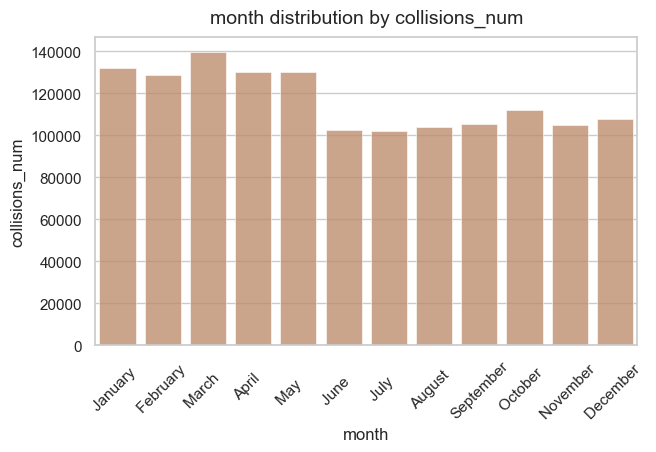

In [116]:
analyze_data(
    data=sql_query(
        """
        SELECT
            month,
            collisions_num
        FROM (
            SELECT
                EXTRACT(MONTH FROM collision_date) AS month_num,
                to_char(collision_date, 'Month') AS month, 
                COUNT(*) AS collisions_num
            FROM 
                collisions
            GROUP BY
                month_num,
                to_char(collision_date, 'Month')
            ORDER BY
                month_num ASC
        ) AS t;
        """
    ),
    x="month", y="collisions_num",
    figsize=(7, 4)
)

Можно сделать вывод, что в количестве ДТП присутствуеть внутрегодовая сезонность:

**Зимой и весонй количество ДТП увеличивается**

#### Сезонность по дню недели

Query completed for 00:00:01


Visualization of categorical data



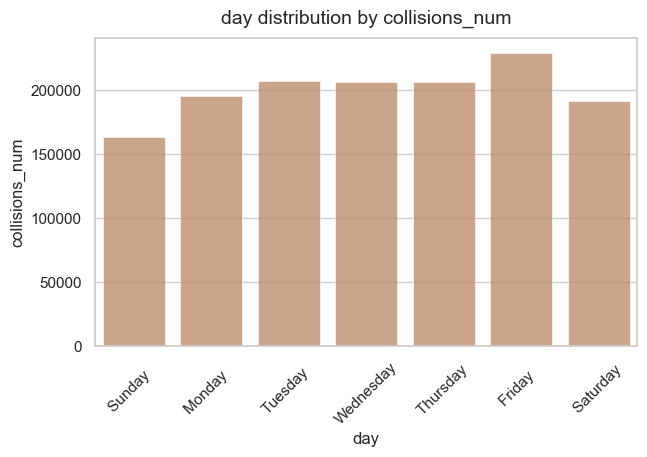

In [117]:
analyze_data(
    data=sql_query(
        """
        SELECT
            day,
            collisions_num
        FROM (
            SELECT
                EXTRACT(DOW FROM collision_date) AS day_num,
                to_char(collision_date, 'Day') AS day, 
                COUNT(*) AS collisions_num
            FROM 
                collisions
            GROUP BY
                day_num,
                to_char(collision_date, 'Day')
            ORDER BY
                day_num ASC
        ) AS t;
        """
    ),
    x="day", y="collisions_num",
    figsize=(7, 4)
)

Сезонность также присутствует и внутри недель: в течении недели количество аварий растет, начиная с с воскресенья и достигая максимума к пятнице, резко падая в субботу.

#### Внутредневная сезонность

Query completed for 00:00:00


Visualization of categorical data



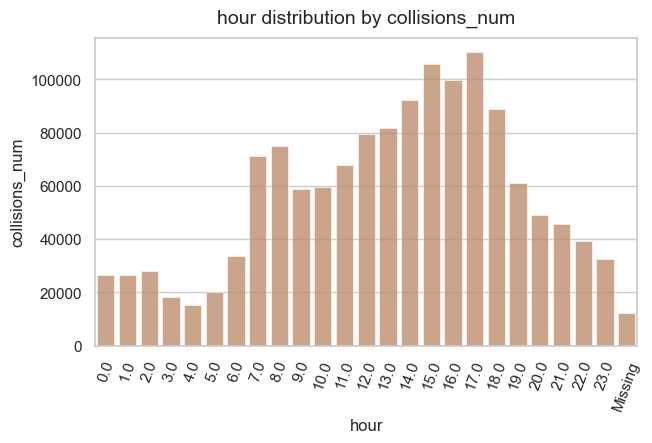

In [118]:
analyze_data(
    data=sql_query(
        """
        SELECT
            EXTRACT(HOUR FROM collision_time)::integer AS hour,
            COUNT(*) AS collisions_num
        FROM 
            collisions
        GROUP BY
            hour
        """
    ),
    x="hour", y="collisions_num",
    rotation=70,
    figsize=(7, 4)
)

Внутредневная сезонность наиболее отчетлива: риск ДТП падает с 17 часов вечера вплоть до 4 утра почти в 5 раз, после чего растет вновь.

### Постановка аналитических задач

Для углубления понимания природы данных к собранию, необходимо выяснить следующую информацию:
1. Как связана серьезность происшествия и трезвость виновников?
2. Как связана серьезность происшествия и средний срок эксплуатации автомобиля?
3. Как связана серьезность происшествия и осовещенность дороги?
4. Как связано количество участников ДТП и трезвость виновников?
5. Как связано количество участников ДТП и средний срок эксплуатации автомобиля?
6. Как связано количество участников ДТП и осовещенность дороги?

В рамках данной работы ответим на первые два вопроса.

#### Анализ серьезности происшествия и трезвости виновников

Query completed for 00:00:01


Visualization of categorical data



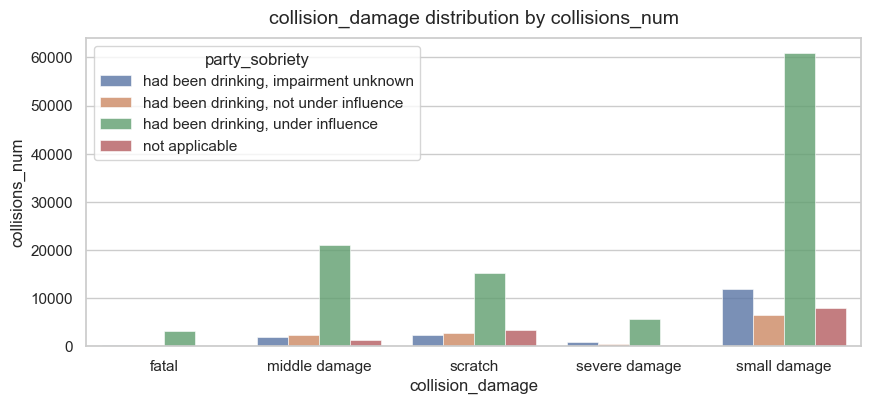

In [119]:
analyze_data(
    data=sql_query(
        """
        SELECT 
            c.collision_damage, 
            p.party_sobriety, 
            COUNT(*) AS collisions_num
        FROM 
            parties p
            LEFT JOIN collisions c ON p.case_id = c.case_id
        WHERE
            p.at_fault = 1
            AND p.party_sobriety NOT IN ('had not been drinking', 'impairment unknown')
        GROUP BY 
            c.collision_damage, 
            p.party_sobriety;
        """
    ),
    x="collision_damage", y="collisions_num", hue="party_sobriety",
    rotation=0,
    figsize=(10, 4)
)

Можно сделать вывод, что опьянение многократно увеличивает риск любого происшествия, при этом наиболее часто оно будет небольшим.

#### Анализ серьезности происшествия и среднего срока эксплуатации автомобиля

Query completed for 00:00:01


Visualization of categorical data



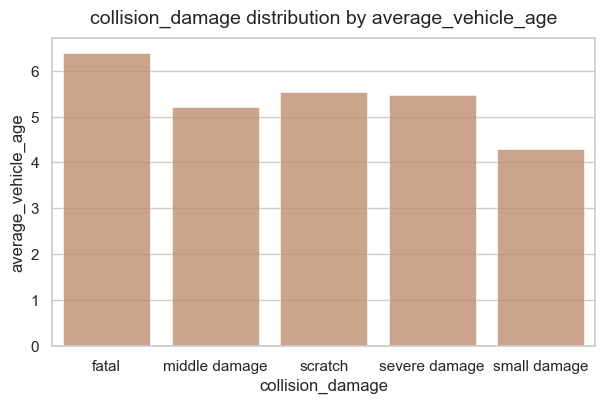

In [120]:
analyze_data(
    data=sql_query(
        """
        SELECT 
            c.collision_damage, 
            avg(v.vehicle_age) as average_vehicle_age 
        FROM 
            collisions c 
            left join vehicles v on c.case_id = v.case_id
        GROUP BY 
            c.collision_damage
        """
    ),
    x="collision_damage", y="average_vehicle_age",
    rotation=0,
    figsize=(7, 4)
)

Можно сделать вывод что средний срок эксплуатации прямо пропорционален серьезности ДТП.

# Промежуточные выводы

Исходя из описания данных и первичного ознакомления, можно обозначить следующие промежуточные выводы:
1. Уже можно ответить на вопрос "Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?":

На основе приведенных данных такую модель построить однозначно нельзя, так как каждое наблюдение в данных - ДТП с разницей в степени виновности участников ДТП (Виновен или невиновен). Следовательно не существует возможности определения риска попасть в ДТП.

Тем не менее, можно изменить вопрос на "Возможно ли создать адекватную систему оценки риска виновности водителя при попадании в ДТП при выдаче авто?"


2. Исходя из предыдущего пункта, можно сказать, что в данных присутствуют явные утечки инормации (data leakage) в виде "информации из будущего".
Например серьезность происшествия, количество участников ДТП и так далее.

3. В данных могут присутствовать потенциальные утечки в виде "информации из будущего" в параметрах, описывающих "трезвость" участников ДТП и их состояние, поскольку можно с высокой степенью вероятности утверждать, что подобную информацию можно было получить только после ДТП, и её невозможно будет получить в явном виде при выдаче автомобиля.

4. Исходя из предыдущих пунктов, можно предположить, что подобная "информация из будущего" полностью или частично присутствует и в других параметрах.


Учтем данные выводы в дальнейшем анализе данных.

# Создание модели для оценки водительского риска

## Классификация полей

Разобъем поля таблиц БД по следующим категориям:
1. Явные утечки данных, которые не могут использоваться при обучении моделей
2. Потенциальные утечки данных, которые стоит проверить перед использованием в модели
3. Флаги, по которым будет происходить фильтрация данных
4. Поля, которые можно использовать для обучения модели

In [121]:
# Parameters not included in the dataset due to data leakage
leakages = [
    # collisions
    "collision_damage", "party_count", "primary_collision_factor",
    "pcf_violation_category", "type_of_collision",
    "motor_vehicle_involved_with",

    # parties
    "party_number"
]

# Potential leakages
pot_leakages = [
    # parties
    "party_sobriety", "party_drug_physical"
]


# Dataset flags
collisions_flags = ["collision_date", "collision_damage"]
parties_flags = ["party_type"]


# Potential dataset features
collisions_features = [
    "collision_date", "collision_time", "county_city_location",
    "county_location", "distance", "direction", "intersection", "weather_1",
    "location_type", "road_surface", "road_condition_1", "lighting",
    "control_device"
]
parties_features = ["at_fault", "insurance_premium", "cellphone_in_use"]
vehicles_features = ["vehicle_type", "vehicle_transmission", "vehicle_age"]

## Выгрузка данных для формирования датасета

### Загрузка данных из БД

In [122]:
dds = sql_query(
    f"""
    SELECT
        {", ".join("c." + el for el in collisions_features)},
        {", ".join("p." + el for el in parties_features)},
        {", ".join("v." + el for el in vehicles_features)},
        {", ".join("p." + el for el in pot_leakages)}
    FROM
        parties AS p
        LEFT JOIN collisions AS c ON p.case_id = c.case_id
        LEFT JOIN vehicles AS v ON p.case_id = v.case_id
    WHERE
        {"c." + collisions_flags[0]}::DATE {DATE_FLAG}
        AND {"c." + collisions_flags[1]} {COLLISION_TYPE_FLAG}
        AND {"p." + parties_flags[0]} {VEHICLE_TYPE_FLAG};
    """
)

print("Dataset sketch sample:")
display(dds.head())
print()
df_quik_view(dds)

Query completed for 00:00:10


Dataset sketch sample:


,collision_date,collision_time,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,road_surface,road_condition_1,lighting,control_device,at_fault,insurance_premium,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age,party_sobriety,party_drug_physical
0,2012-01-18,13:53:00,4313,santa clara,0.0,None,NaN,clear,None,dry,normal,daylight,functioning,0,19.0,NaN,sedan,auto,0.0,had not been drinking,None
1,2012-01-26,08:50:00,3000,orange,900.0,north,0.0,clear,None,dry,normal,daylight,none,0,65.0,0.0,None,None,NaN,had not been drinking,None
2,2012-02-02,16:18:00,1600,kings,50.0,north,0.0,clear,highway,dry,normal,daylight,functioning,1,19.0,0.0,sedan,manual,4.0,had not been drinking,None
3,2012-01-20,18:26:00,1931,los angeles,0.0,None,1.0,clear,None,dry,normal,daylight,functioning,1,21.0,NaN,None,None,NaN,had not been drinking,None
4,2012-01-16,01:26:00,3100,placer,1276.0,south,0.0,clear,highway,dry,normal,dark with no street lights,none,1,27.0,0.0,coupe,manual,4.0,"had been drinking, under influence",None



General data analysis:

Shape of the table:      (226984, 21)
Duplicates in the table: 2365, (1.04%)
Memory usage:            381.3+ MB



Completed for 00:00:08


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
collision_date,226984,0,100.000000,366,"[2012-12-31, 2012-12-30, 2012-12-29, 2012-12-2...",object
collision_time,225598,1386,99.389384,1440,"[23:59:00, 23:58:00, 23:57:00, 23:56:00, 23:55...",object
county_city_location,226984,0,100.000000,513,"[5802, 5801, 5800, 5704, 5703, 5702, 5701, 570...",object
county_location,226984,0,100.000000,58,"[yuba, yolo, ventura, tuolumne, tulare, trinit...",object
distance,226984,0,100.000000,2321,"[1584000.0, 792000.0, 549120.0, 528000.0, 3168...",float64
direction,175734,51250,77.421316,4,"[west, south, north, east, None]",object
intersection,225895,1089,99.520231,2,"[1.0, 0.0, nan]",float64
weather_1,226205,779,99.656804,7,"[wind, snowing, raining, other, fog, cloudy, c...",object
location_type,101712,125272,44.810207,3,"[ramp, intersection, highway, None]",object
road_surface,225492,1492,99.342685,4,"[wet, snowy, slippery, dry, None]",object


### Оптимизация использования памяти

In [123]:
dds["collision_date"] = pd.to_datetime(dds["collision_date"])
dds["collision_time"] = pd.to_datetime(
    dds["collision_time"], format='%H:%M:%S').dt.hour

dtypes = {
    "collision_time":           "float32",
    "county_city_location":     "category",
    "county_location":          "category",
    "distance":                 "float32",
    "direction":                "category",
    "intersection":             "category",
    "weather_1":                "category",
    "location_type":            "category",
    "road_surface":             "category",
    "road_condition_1":         "category",
    "lighting":                 "category",
    "control_device":           "category",
    "at_fault":                 "int8",
    "insurance_premium":        "float32",
    "cellphone_in_use":         "category",
    "vehicle_type":             "category",
    "vehicle_transmission":     "category",
    "vehicle_age":              "float32",
    "party_sobriety":           "category",
    "party_drug_physical":      "category",
}

dds = change_dtypes(dds, **dtypes)
df_quik_view(dds)

Initial value of memory usage:                  38133312
Value of memory usage after changing data types: 9332260

Memory usage reduced by 75.53% 

General data analysis:

Shape of the table:      (226984, 21)
Duplicates in the table: 2405, (1.06%)
Memory usage:            93.3+ MB



Completed for 00:00:00


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
collision_date,226984,0,100.000000,366,"[2012-12-31T00:00:00.000000000, 2012-12-30T00:...",datetime64[ns]
collision_time,225598,1386,99.389384,24,"[23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16....",float32
county_city_location,226984,0,100.000000,513,"['5802', '5801', '5800', '5704', '5703', ..., ...",category
county_location,226984,0,100.000000,58,"['yuba', 'yolo', 'ventura', 'tuolumne', 'tular...",category
distance,226984,0,100.000000,2321,"[1584000.0, 792000.0, 549120.0, 528000.0, 3168...",float32
direction,175734,51250,77.421316,4,"['west', 'south', 'north', 'east', NaN] Catego...",category
intersection,225895,1089,99.520231,2,"[1.0, 0.0, NaN] Categories (2, float64): [0.0,...",category
weather_1,226205,779,99.656804,7,"['wind', 'snowing', 'raining', 'other', 'fog',...",category
location_type,101712,125272,44.810207,3,"['ramp', 'intersection', 'highway', NaN] Categ...",category
road_surface,225492,1492,99.342685,4,"['wet', 'snowy', 'slippery', 'dry', NaN] Categ...",category


## EDA

### at_fault

Visualization of target distribution:

Target: at_fault


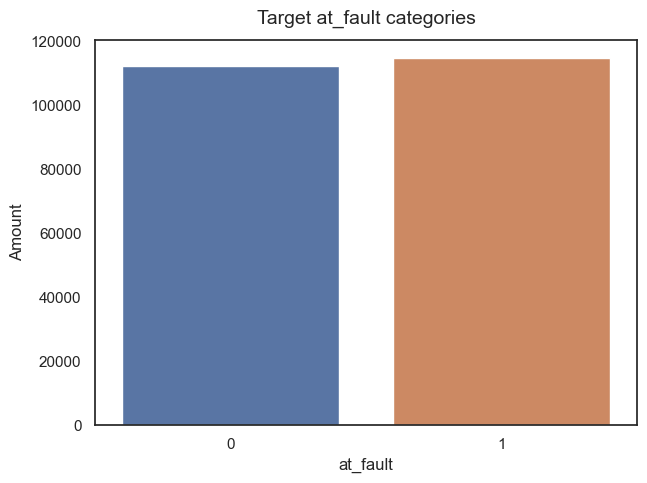


Target statistics:


,at_fault
count,226984.000000
mean,0.505652
std,0.499969
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [124]:
create_visualization(data=dds,
                     dtype="target", target="at_fault",
                     is_cat_target=True, figsize=(7, 5))

### collision_date

Visualization of categorical features and target prevalence:

Feature: collision_month


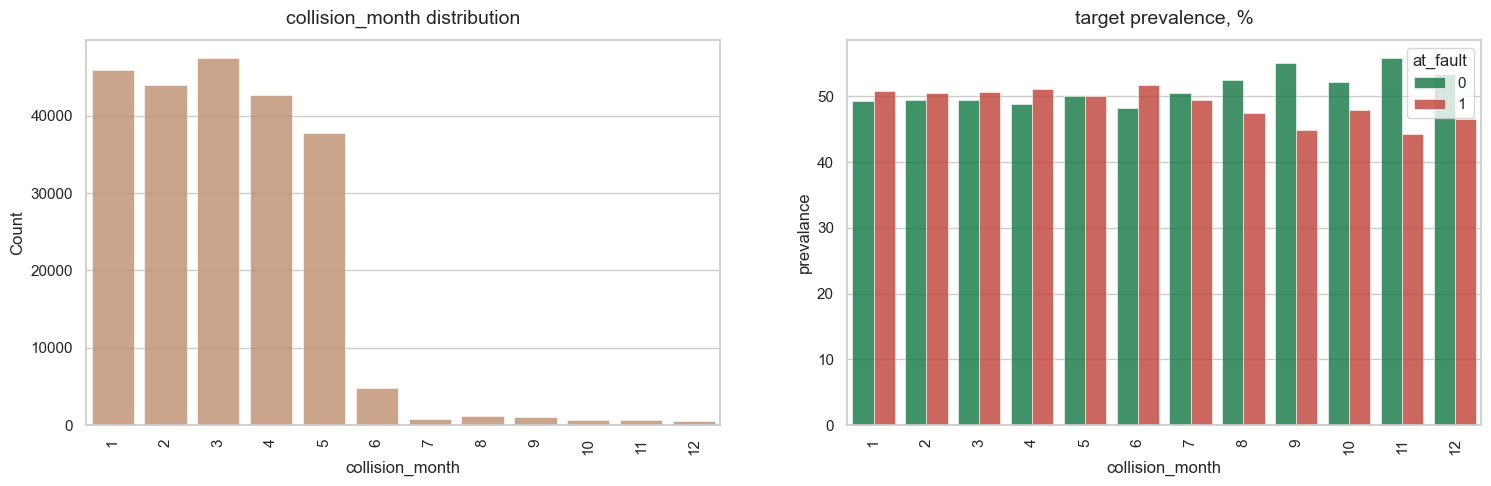

In [125]:
dds_temp = dds[["collision_date", "at_fault"]].copy()
dds_temp["collision_date"] = dds_temp["collision_date"].dt.month
dds_temp = dds_temp.rename(columns={"collision_date": "collision_month"})

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

del dds_temp

Данных за 2021 год за июль-декабрь практически нет, что обуславливает нежелательность использования данного признака в подобном виде в датасете.

Visualization of categorical features and target prevalence:

Feature: day_of_week


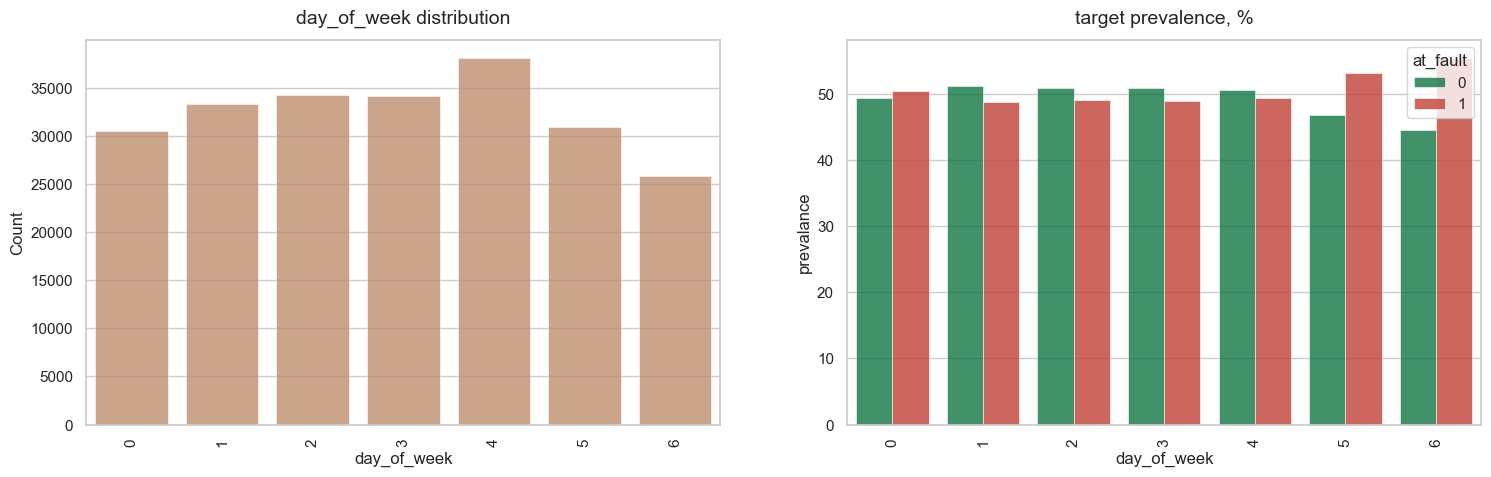

In [126]:
dds_temp = dds[["collision_date", "at_fault"]].copy()
dds_temp["collision_date"] = dds_temp["collision_date"].dt.day_of_week
dds_temp = dds_temp.rename(columns={"collision_date": "day_of_week"})

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

del dds_temp

### collision_time

Visualization of categorical features and target prevalence:

Feature: collision_time


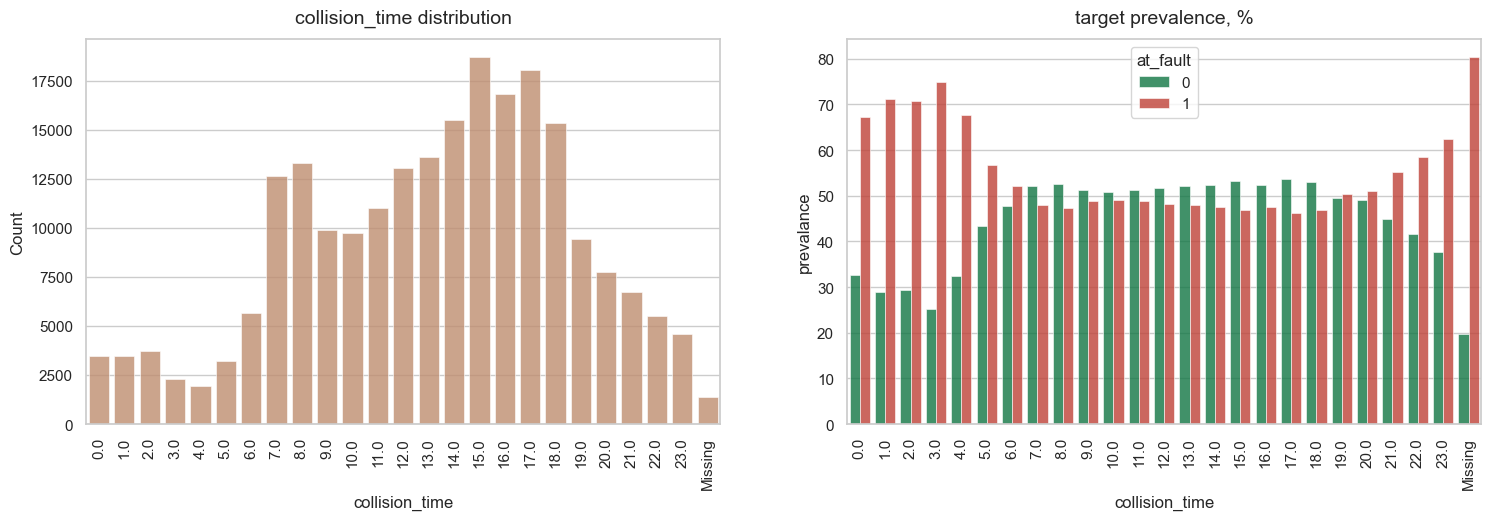

In [127]:
dds_temp = dds[["collision_time", "at_fault"]].copy()
dds_temp["collision_time"] = dds_temp["collision_time"].astype("category")

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

del dds_temp

Visualization of categorical features and target prevalence:

Feature: collision_time


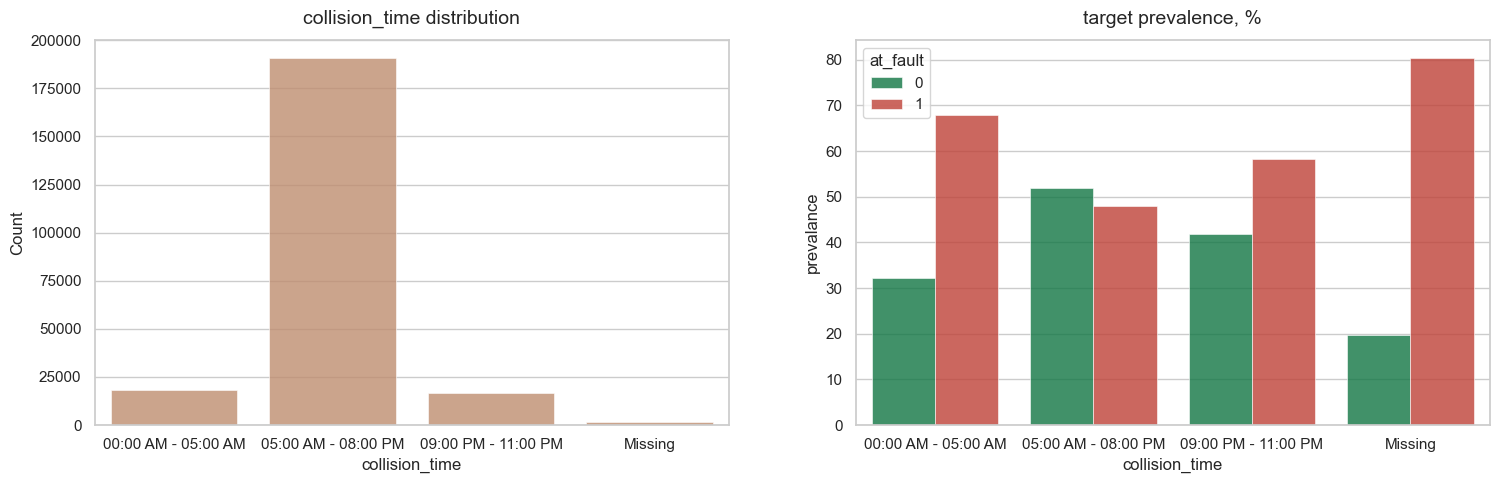

In [128]:
dds_temp = dds[["collision_time", "at_fault"]].copy()
dds_temp["collision_time"] = (dds_temp["collision_time"]
                              .apply(lambda x: 1 if x < 6 else x)
                              .apply(lambda x: 2 if x > 5 and x < 21 else x)
                              .apply(lambda x: 3 if x > 20 else x)
                              .fillna("Missing")
                              .replace(1, "00:00 AM - 05:00 AM")
                              .replace(2, "05:00 AM - 08:00 PM")
                              .replace(3, "09:00 PM - 11:00 PM"))

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

del dds_temp

### county_city_location

Visualization of categorical features and target prevalence:

Feature: county_city_location


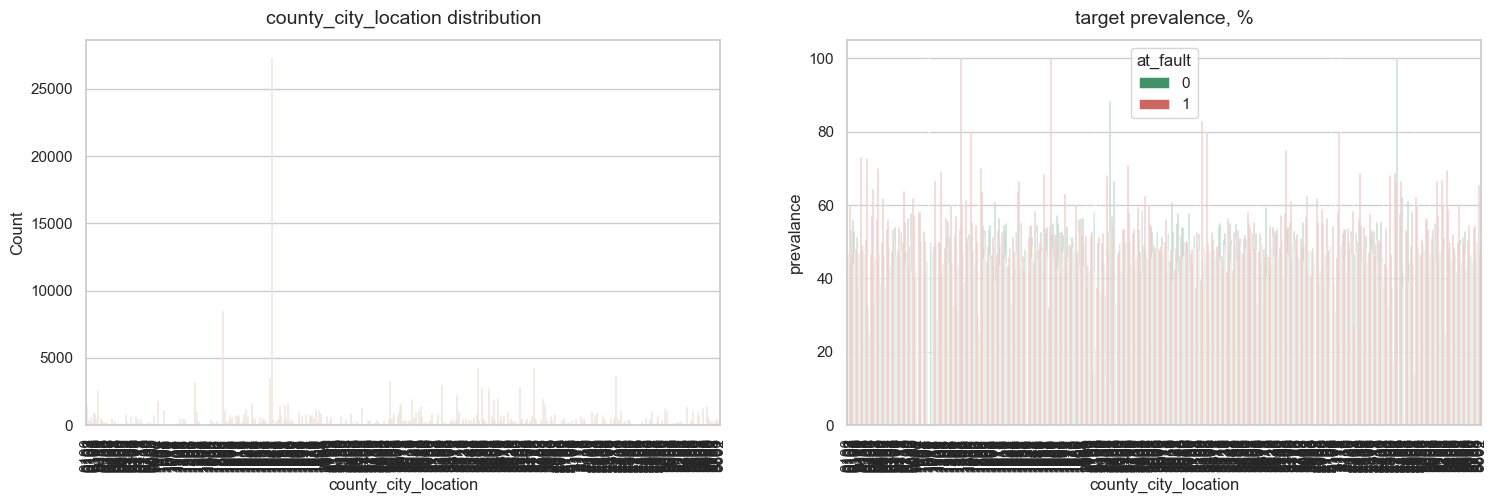

In [129]:
create_visualization(data=dds[["county_city_location", "at_fault"]],
                     dtype="categories", target="at_fault", 
                     is_cat_target=True)

В данных слишком много категорий, которые представлены совершенно по-разному: попадаются и такие, в которых 100% наблюдений представляются целевым признаком типа "Виновен".

Необходимо проанализировать признак `county_lokation` и выбрать наиболее подходящий параметр.

### county_location

Visualization of categorical features and target prevalence:

Feature: county_location


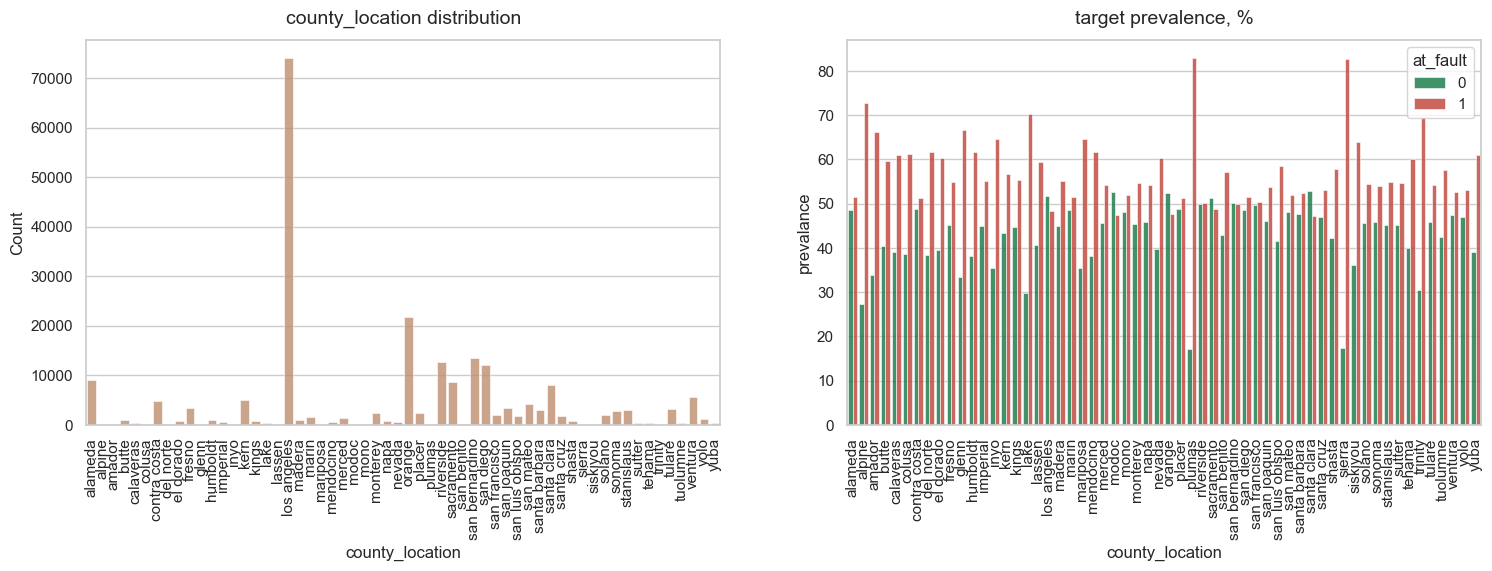

In [130]:
create_visualization(data=dds[["county_location", "at_fault"]],
                     dtype="categories", target="at_fault", 
                     is_cat_target=True)

Данный признак лучше использовать в моделе в виду его большей обощающей стороны.

### distance

Visualization of quantitative features distribution:

Feature: distance


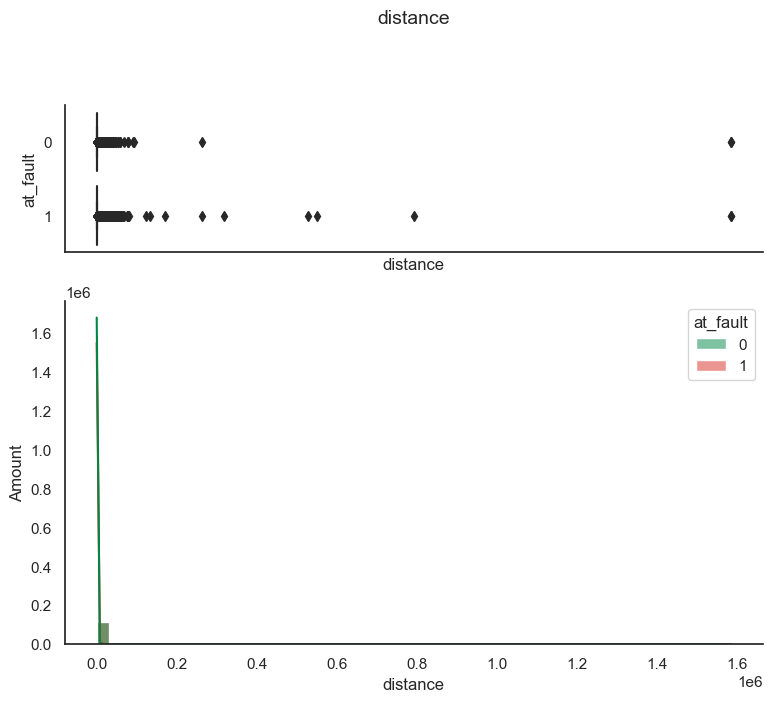


Feature statistics:


,distance
count,226984.00
mean,662.97
std,7393.58
min,0.00
25%,10.00
50%,100.00
75%,500.00
max,1584000.00


In [131]:
create_visualization(data=dds[["distance", "at_fault"]],
                     dtype="scalars", target="at_fault",
                     is_cat_target=True)

Обработаем выбросы.

Visualization of quantitative features distribution:

Feature: distance


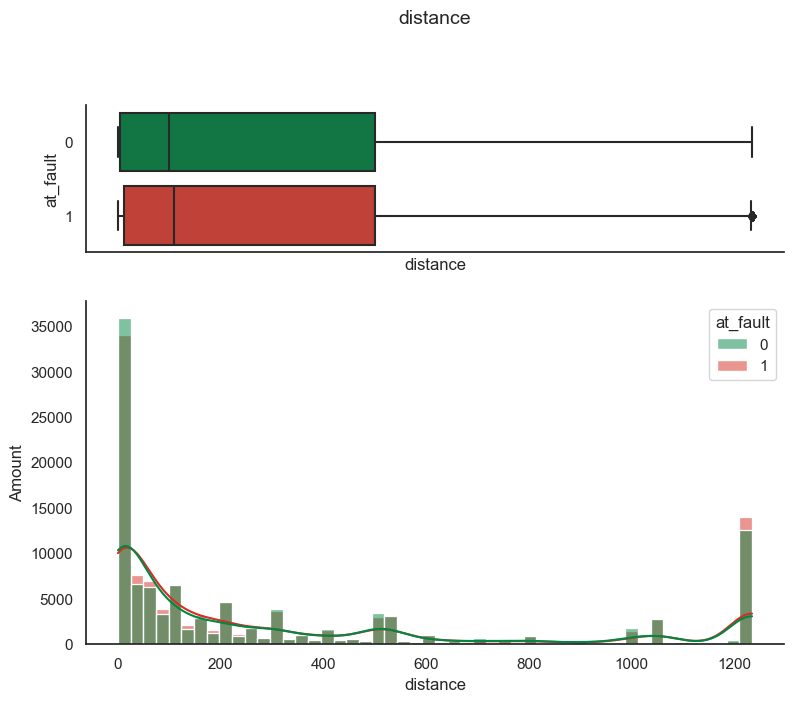


Feature statistics:


,distance
count,226984.00
mean,329.39
std,426.52
min,0.00
25%,10.00
50%,100.00
75%,500.00
max,1235.00


In [132]:
dds_temp = dds[["distance", "at_fault"]].copy()
dds_temp["distance"] = remove_outs(dds_temp, "distance", False)

create_visualization(data=dds_temp[["distance", "at_fault"]],
                     dtype="scalars", target="at_fault",
                     is_cat_target=True)

del dds_temp

### direction

Visualization of categorical features and target prevalence:

Feature: direction


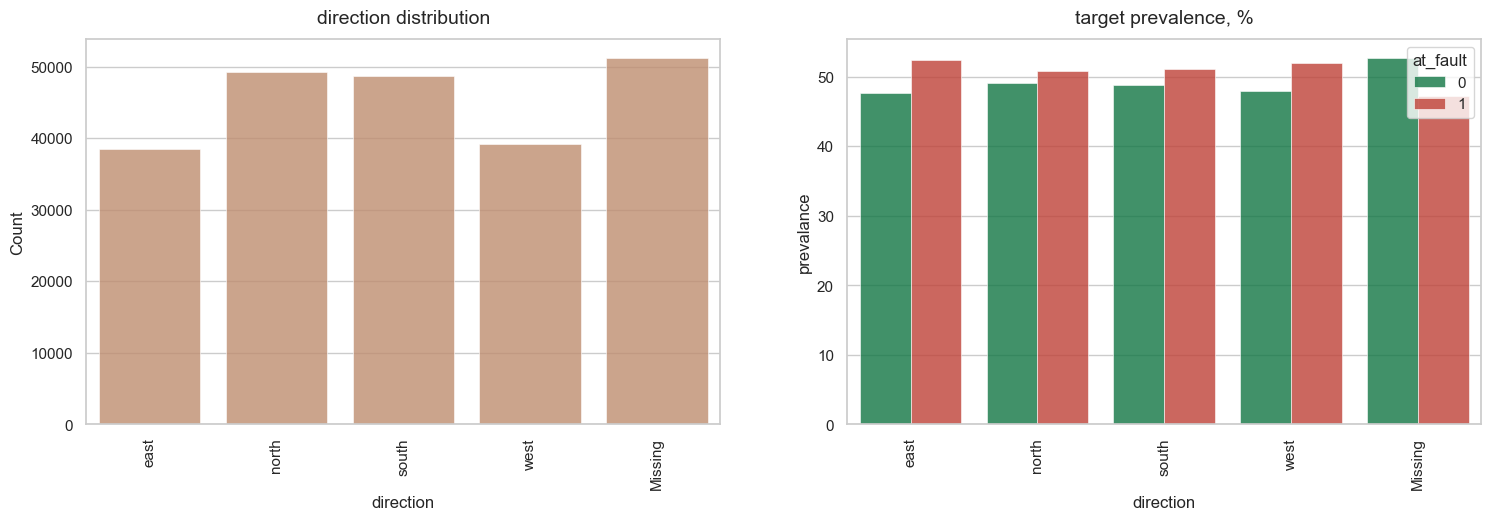

In [133]:
create_visualization(data=dds[["direction", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

### intersection

Visualization of categorical features and target prevalence:

Feature: intersection


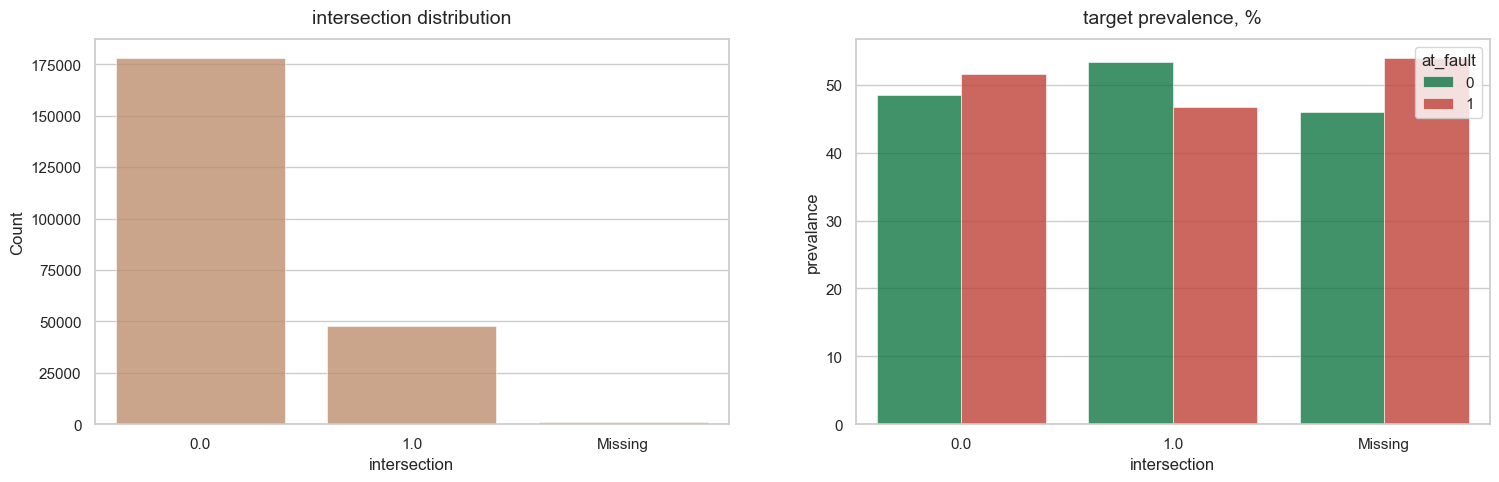

In [134]:
create_visualization(data=dds[["intersection", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

### weather_1

Visualization of categorical features and target prevalence:

Feature: weather_1


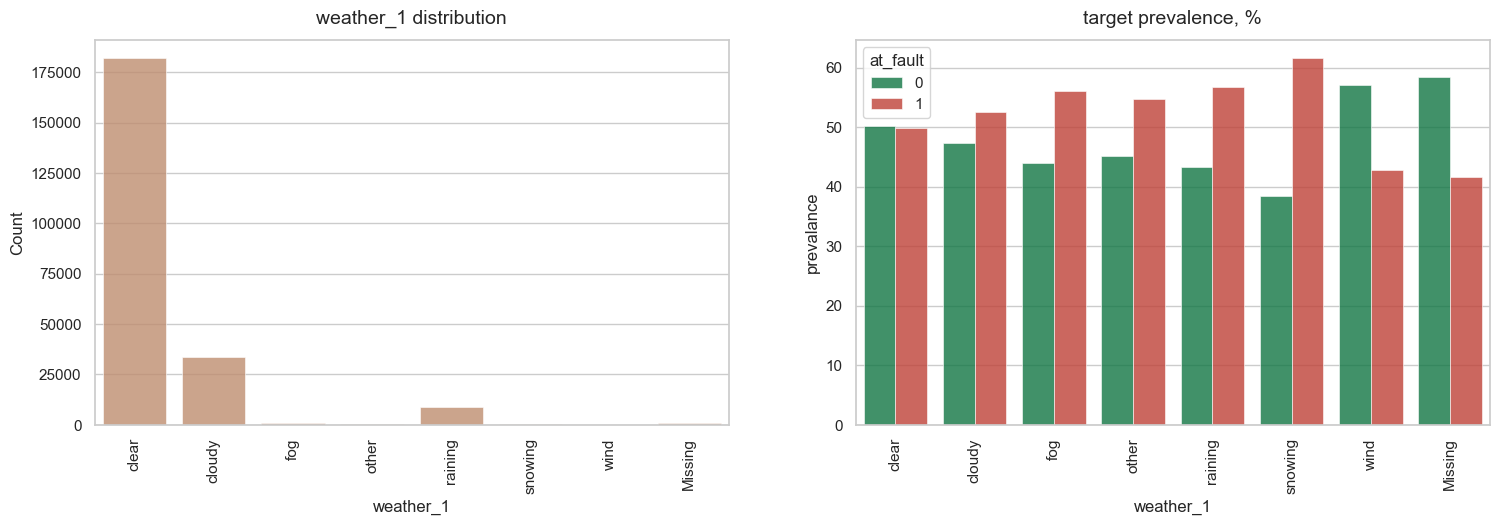

In [135]:
create_visualization(data=dds[["weather_1", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

### location_type

Visualization of categorical features and target prevalence:

Feature: location_type


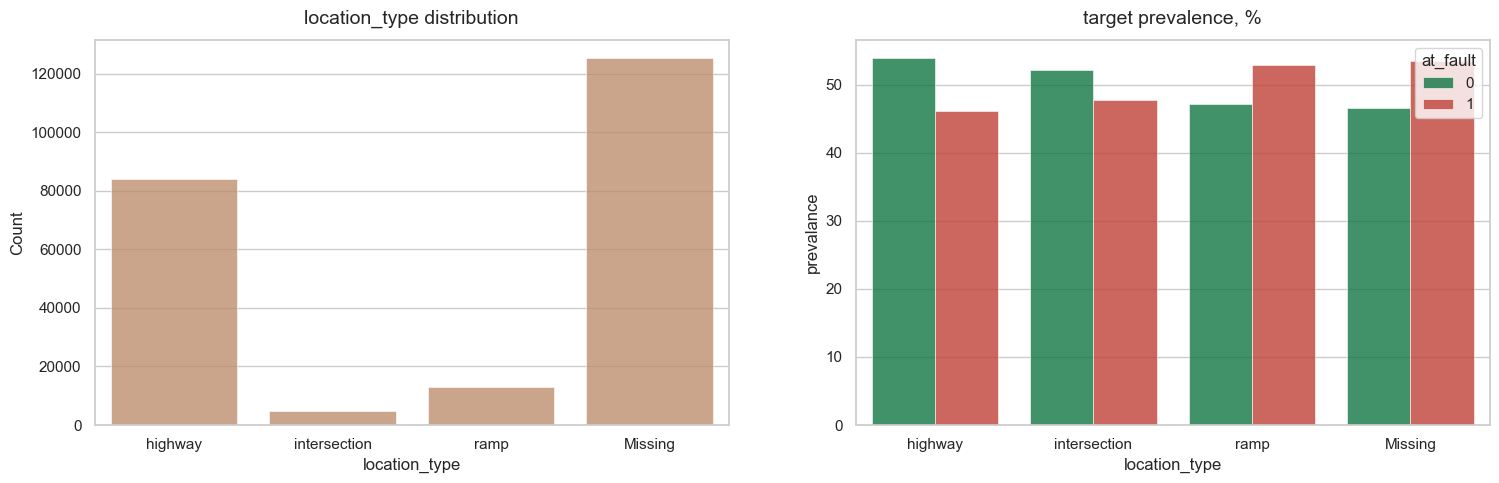

In [136]:
create_visualization(data=dds[["location_type", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

### road_surface

Visualization of categorical features and target prevalence:

Feature: road_surface


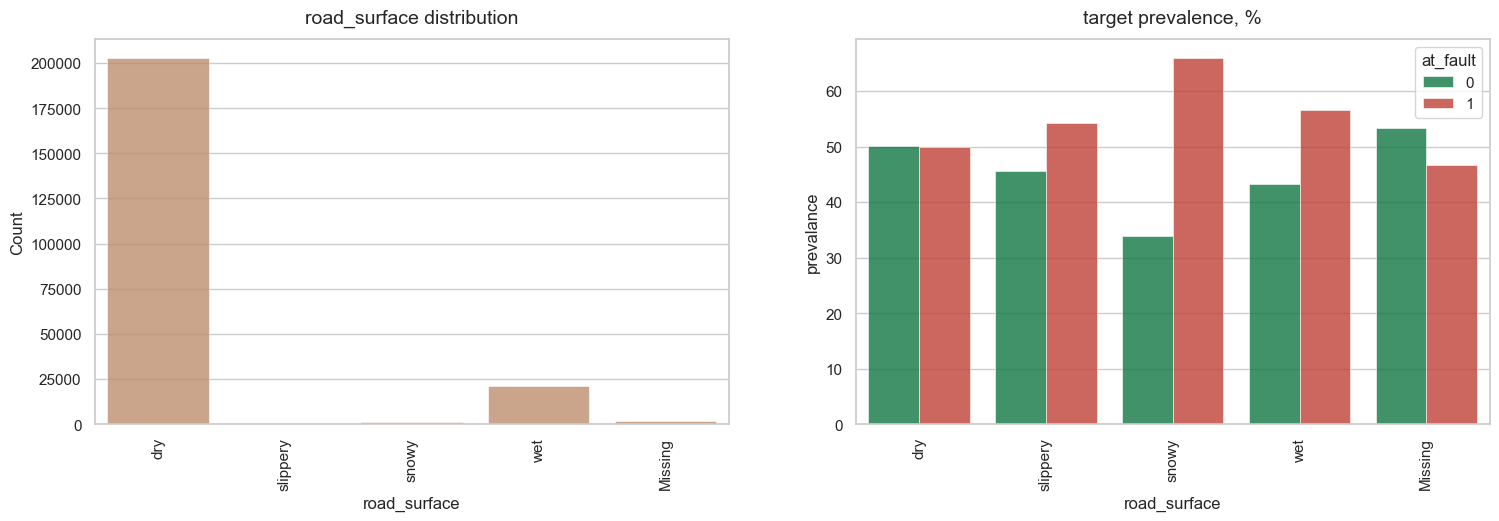

In [137]:
create_visualization(data=dds[["road_surface", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

### road_condition_1

Visualization of categorical features and target prevalence:

Feature: road_condition_1


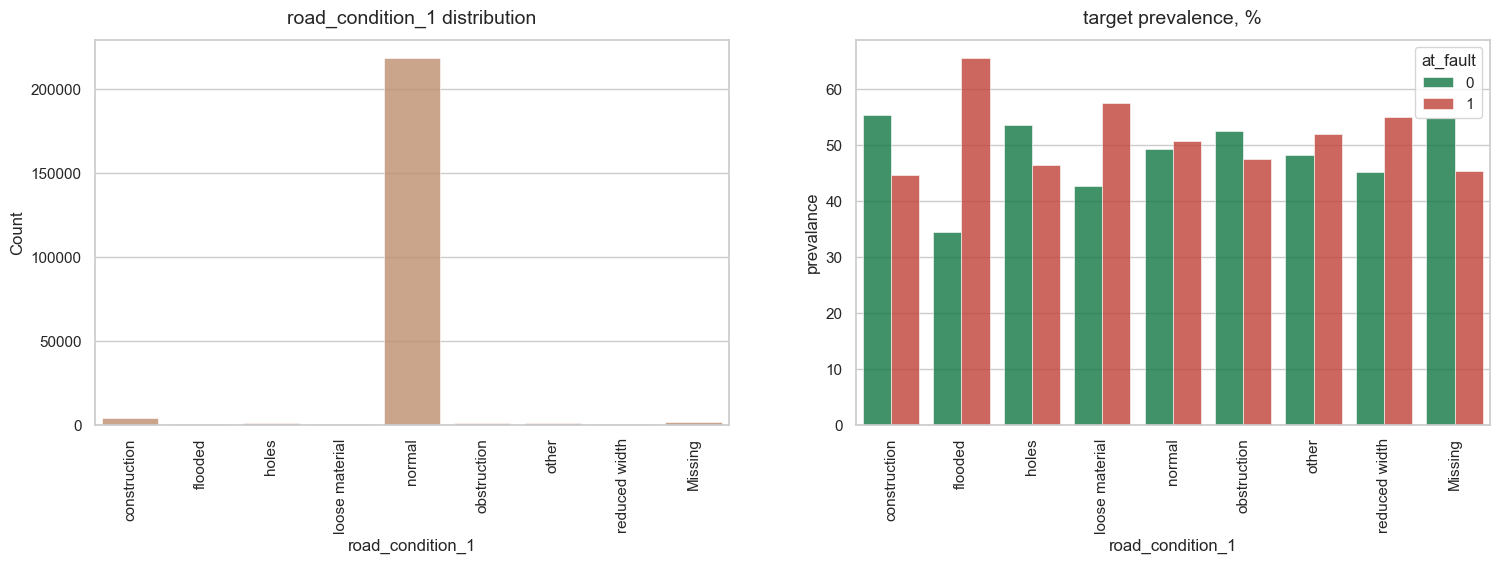

In [138]:
create_visualization(data=dds[["road_condition_1", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

### lighting

Visualization of categorical features and target prevalence:

Feature: lighting


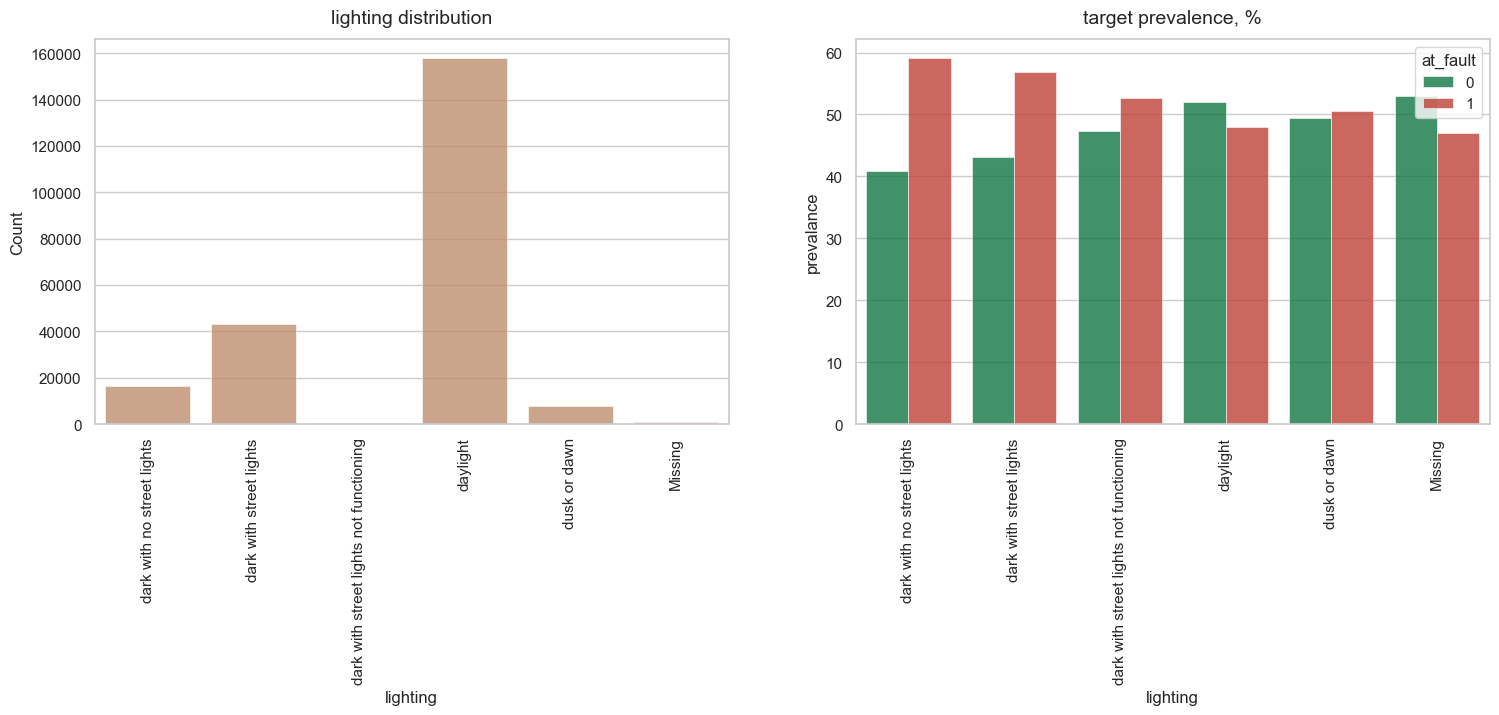

In [139]:
create_visualization(data=dds[["lighting", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

### control_device

Visualization of categorical features and target prevalence:

Feature: control_device


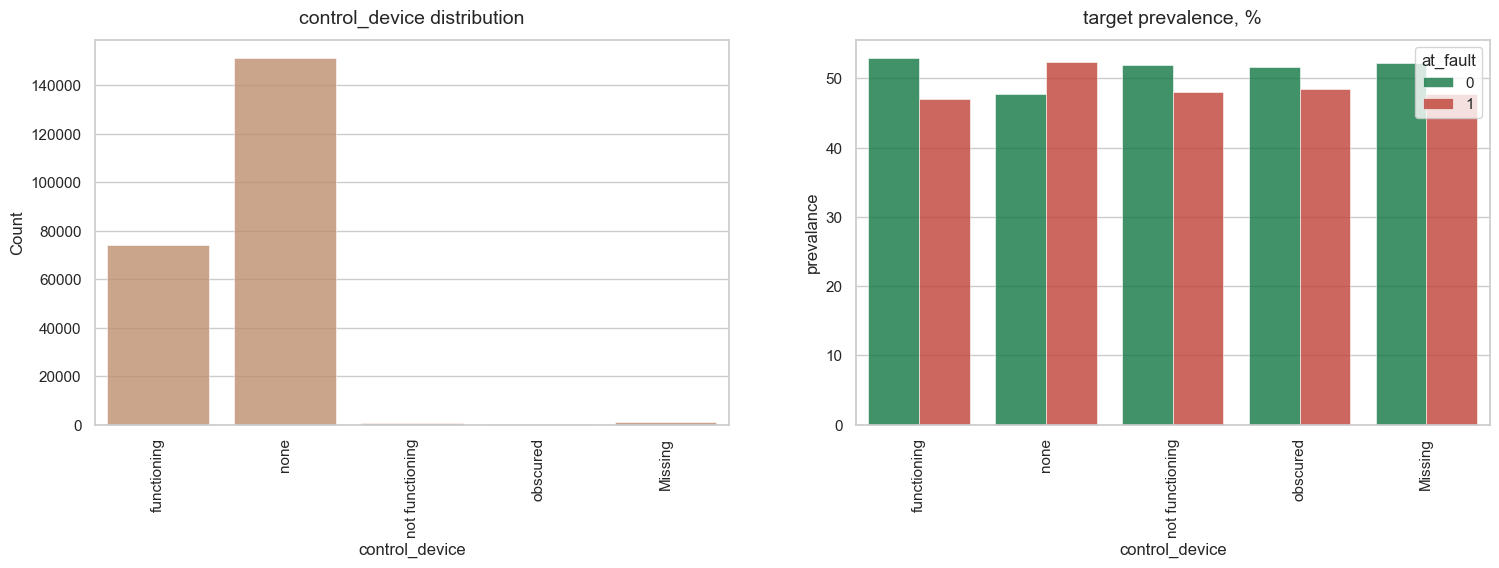

In [140]:
create_visualization(data=dds[["control_device", "at_fault"]],
                     dtype="categories", target="at_fault", 
                     is_cat_target=True)

### insurance_premium

Visualization of quantitative features distribution:

Feature: insurance_premium


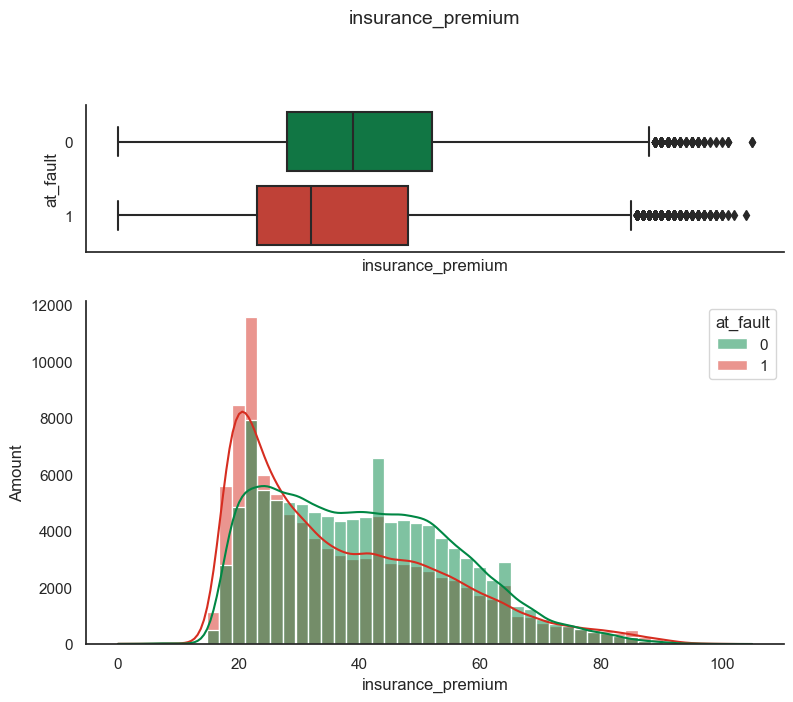


Feature statistics:


,insurance_premium
count,206289.00
mean,38.94
std,16.24
min,0.00
25%,25.00
50%,36.00
75%,50.00
max,105.00


In [141]:
create_visualization(data=dds[["insurance_premium", "at_fault"]],
                     dtype="scalars", target="at_fault", 
                     is_cat_target=True)

Visualization of categorical features and target prevalence:

Feature: insurance_premium


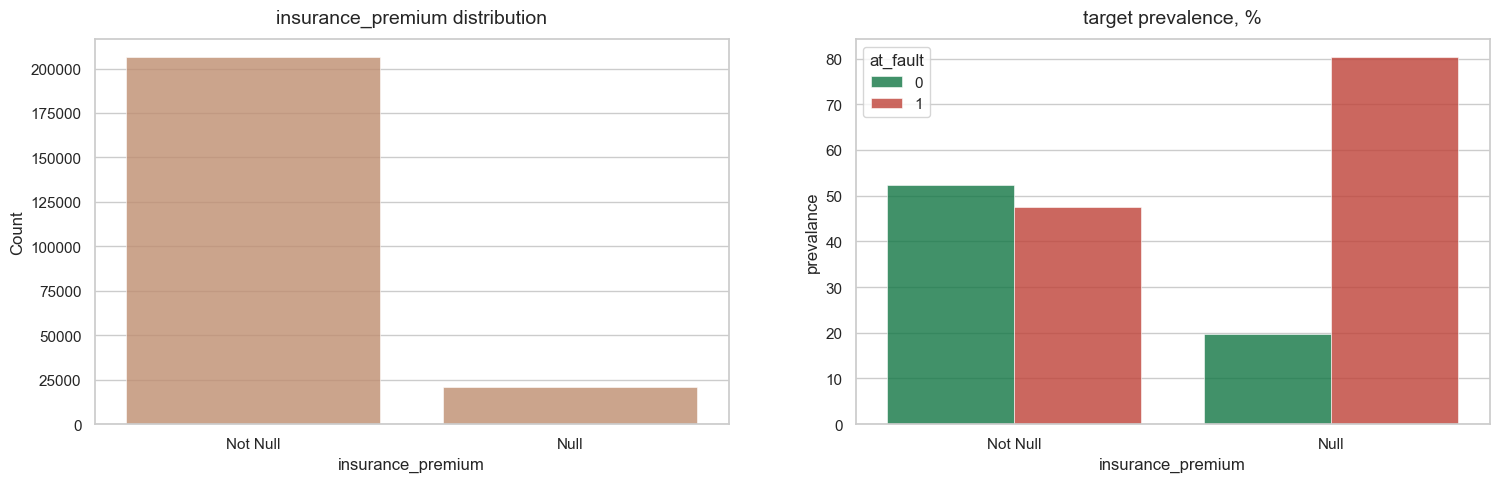

In [142]:
dds_temp = dds[["insurance_premium", "at_fault"]].copy()
dds_temp["insurance_premium"] = (dds_temp["insurance_premium"]
                                 .fillna(-1)
                                 .astype("object")
                                 .apply(lambda x: "Not Null" if x >= 0 else "Null"))

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault", 
                     is_cat_target=True)

Похоже, что те, у кого нет данных о страховки, нет и самой страховки. Заменим пропуски нулем.

In [143]:
dds["is_insrance_null"] = (dds_temp["insurance_premium"] == "Null").astype("int8")
del dds_temp

Visualization of quantitative features distribution:

Feature: insurance_premium


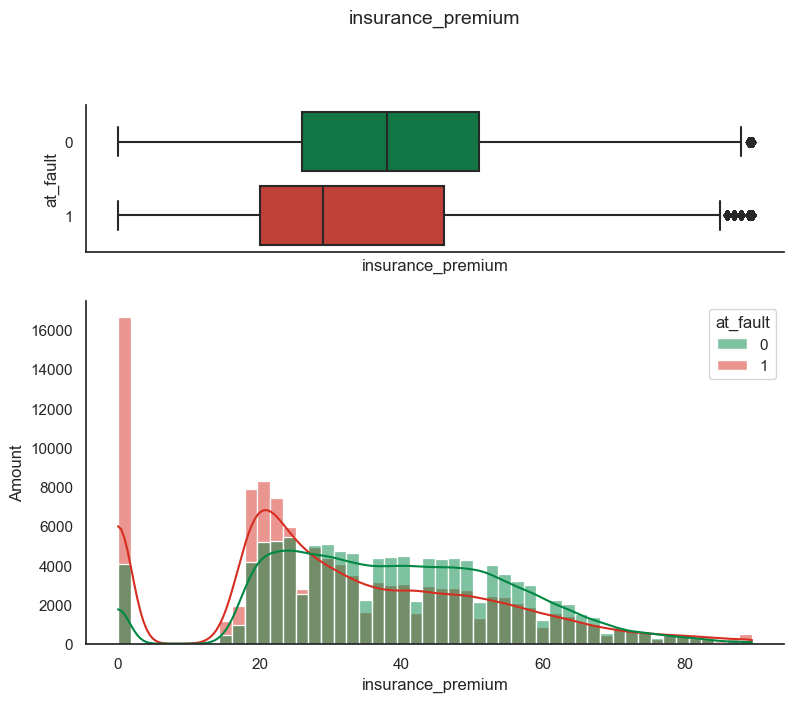


Feature statistics:


,insurance_premium
count,226984.00
mean,35.38
std,19.10
min,0.00
25%,22.00
50%,34.00
75%,49.00
max,89.50


In [144]:
dds_temp = dds[["insurance_premium", "at_fault"]].copy()
dds_temp["insurance_premium"] = dds_temp["insurance_premium"].fillna(0)
dds_temp["insurance_premium"] = remove_outs(
    dds_temp, "insurance_premium", False)

create_visualization(data=dds_temp,
                     dtype="scalars", target="at_fault", 
                     is_cat_target=True)

del dds_temp

### cellphone_in_use

Visualization of categorical features and target prevalence:

Feature: cellphone_in_use


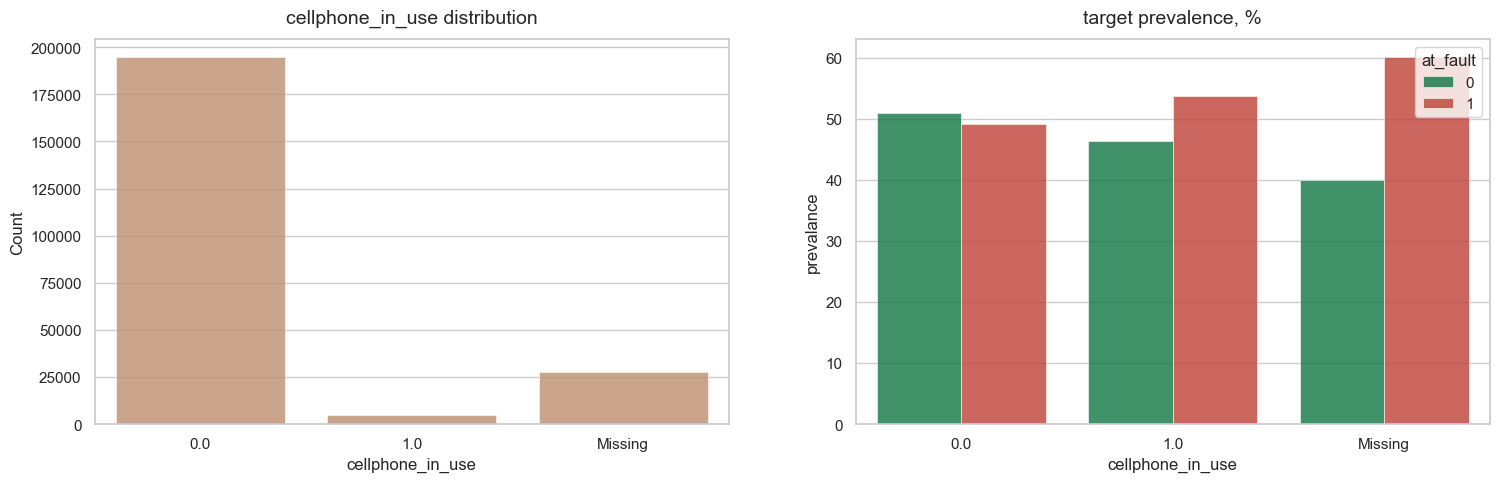

In [145]:
create_visualization(data=dds[["cellphone_in_use", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

### vehicle_type

Visualization of categorical features and target prevalence:

Feature: vehicle_type


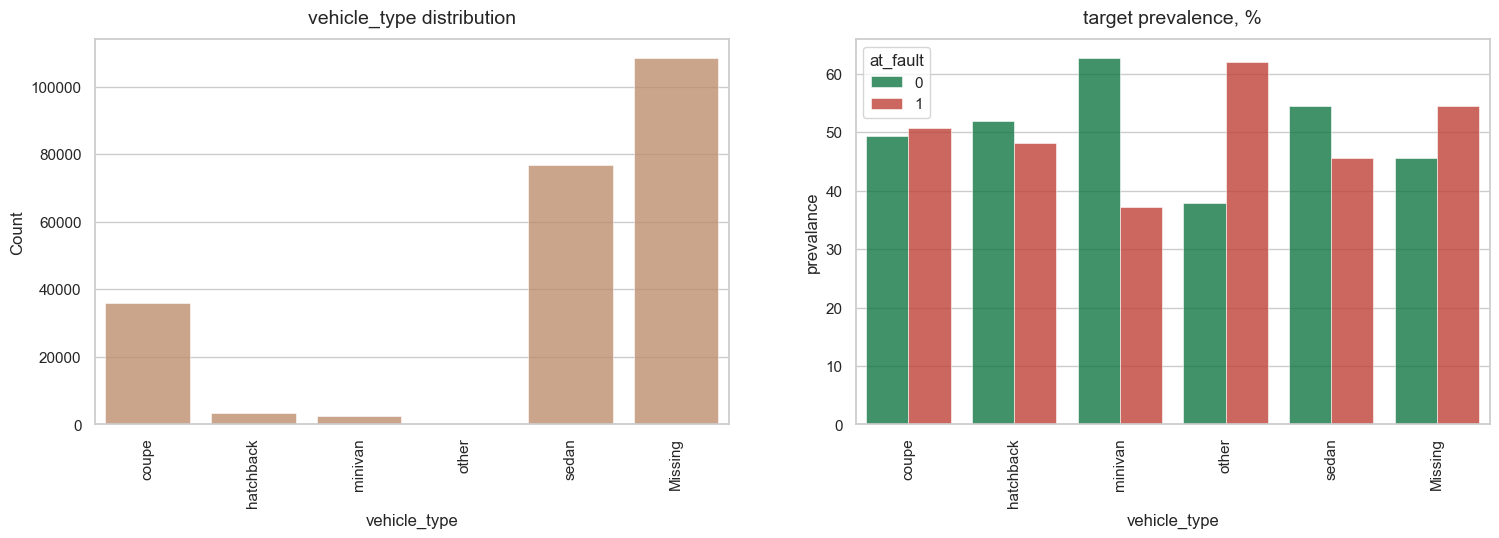

In [146]:
create_visualization(data=dds[["vehicle_type", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

### vehicle_transmission

Visualization of categorical features and target prevalence:

Feature: vehicle_transmission


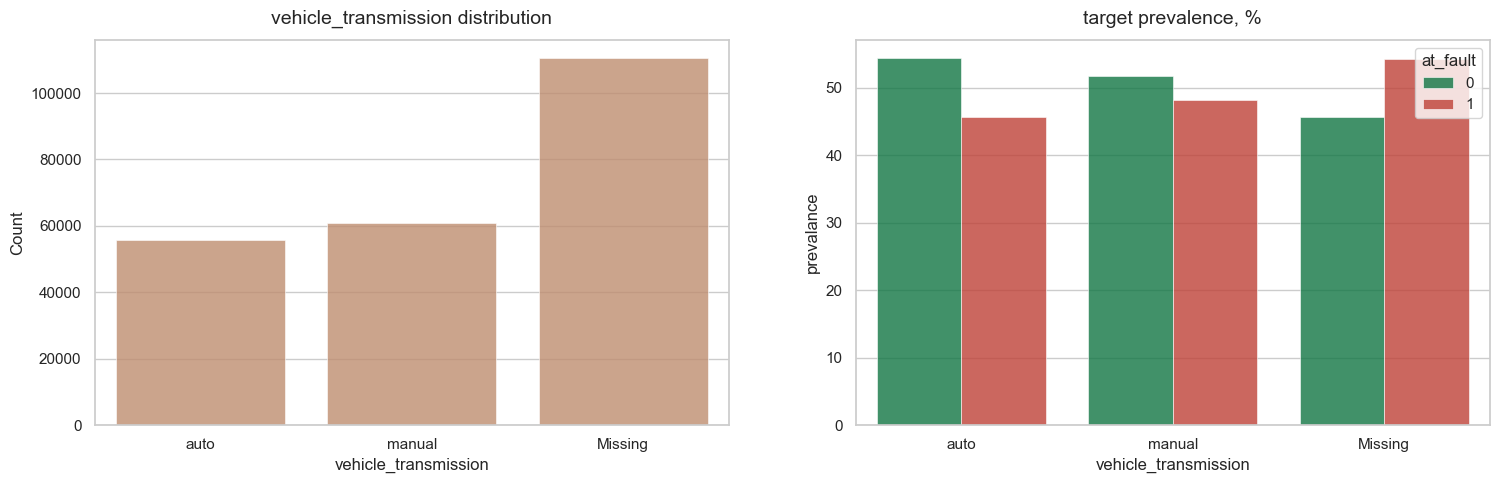

In [147]:
create_visualization(data=dds[["vehicle_transmission", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

### vehicle_age

Visualization of quantitative features distribution:

Feature: vehicle_age


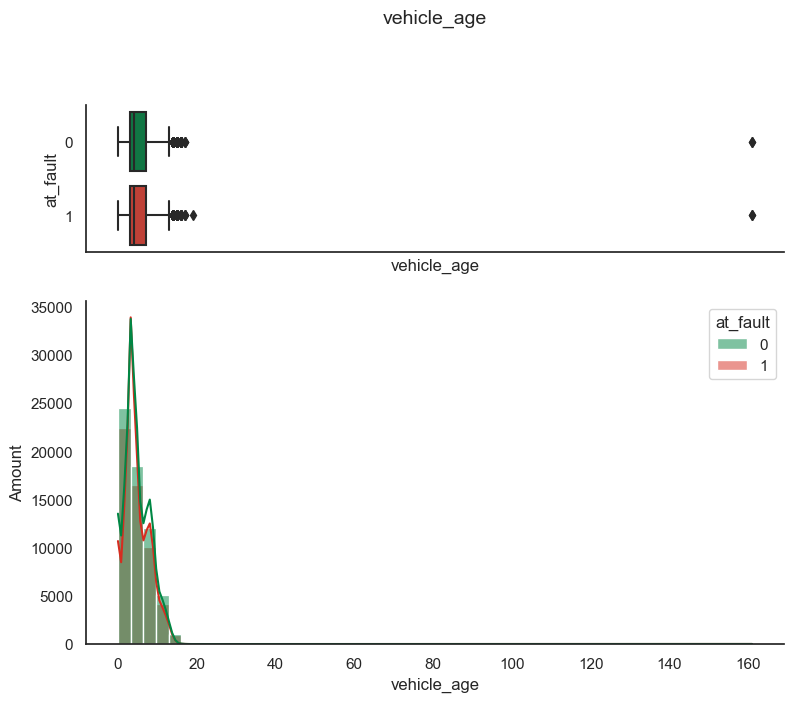


Feature statistics:


,vehicle_age
count,115046.00
mean,4.91
std,3.27
min,0.00
25%,3.00
50%,4.00
75%,7.00
max,161.00


In [148]:
create_visualization(data=dds[["vehicle_age", "at_fault"]],
                     dtype="scalars", target="at_fault",
                     is_cat_target=True)

Visualization of quantitative features distribution:

Feature: vehicle_age


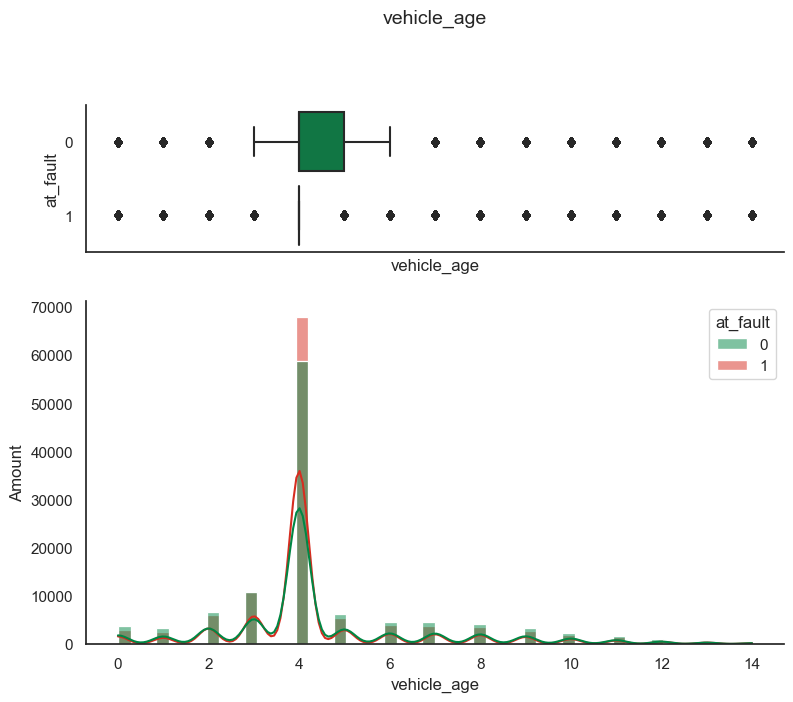


Feature statistics:


,vehicle_age
count,226984.00
mean,4.46
std,2.27
min,0.00
25%,4.00
50%,4.00
75%,4.00
max,14.00


In [149]:
dds_temp = dds[["vehicle_age", "at_fault"]].copy()
dds_temp["vehicle_age"] = dds_temp["vehicle_age"].fillna(dds_temp["vehicle_age"]
                                                         .median())
dds_temp["vehicle_age"] = dds_temp["vehicle_age"].apply(
    lambda x: 14 if x > 14 else x)


create_visualization(data=dds_temp,
                     dtype="scalars", target="at_fault",
                     is_cat_target=True)

del dds_temp

Параметр представле сверхнеравномерно. Обработаем его как категориальный признак.

Visualization of categorical features and target prevalence:

Feature: vehicle_age


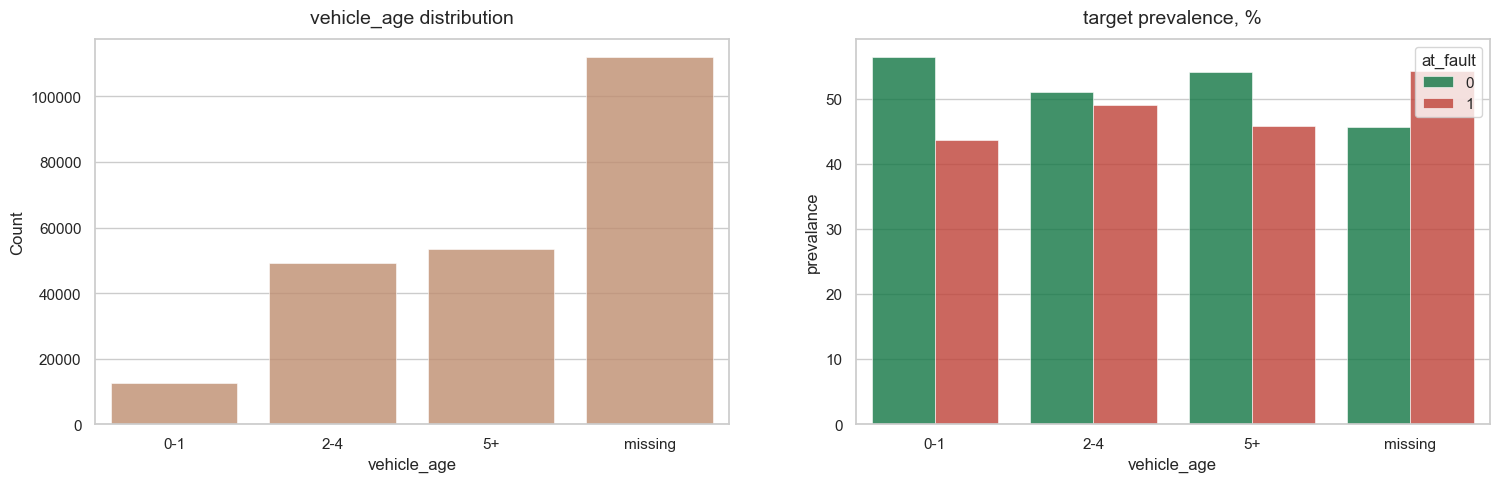

In [150]:
dds_temp = dds[["vehicle_age", "at_fault"]].copy()

dds_temp["vehicle_age"] = (dds_temp["vehicle_age"]
                           .fillna(-1)
                           .astype("object")
                           .apply(lambda x: "5+" if int(x) > 4 else x)
                           .apply(lambda x: "0-1" if x in [0, 1] else x)
                           .apply(lambda x: "2-4" if x in [2, 3, 4] else x)
                           .replace(-1, "missing")
                           .astype("category"))

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

del dds_temp

### party_sobriety

Visualization of categorical features and target prevalence:

Feature: party_sobriety


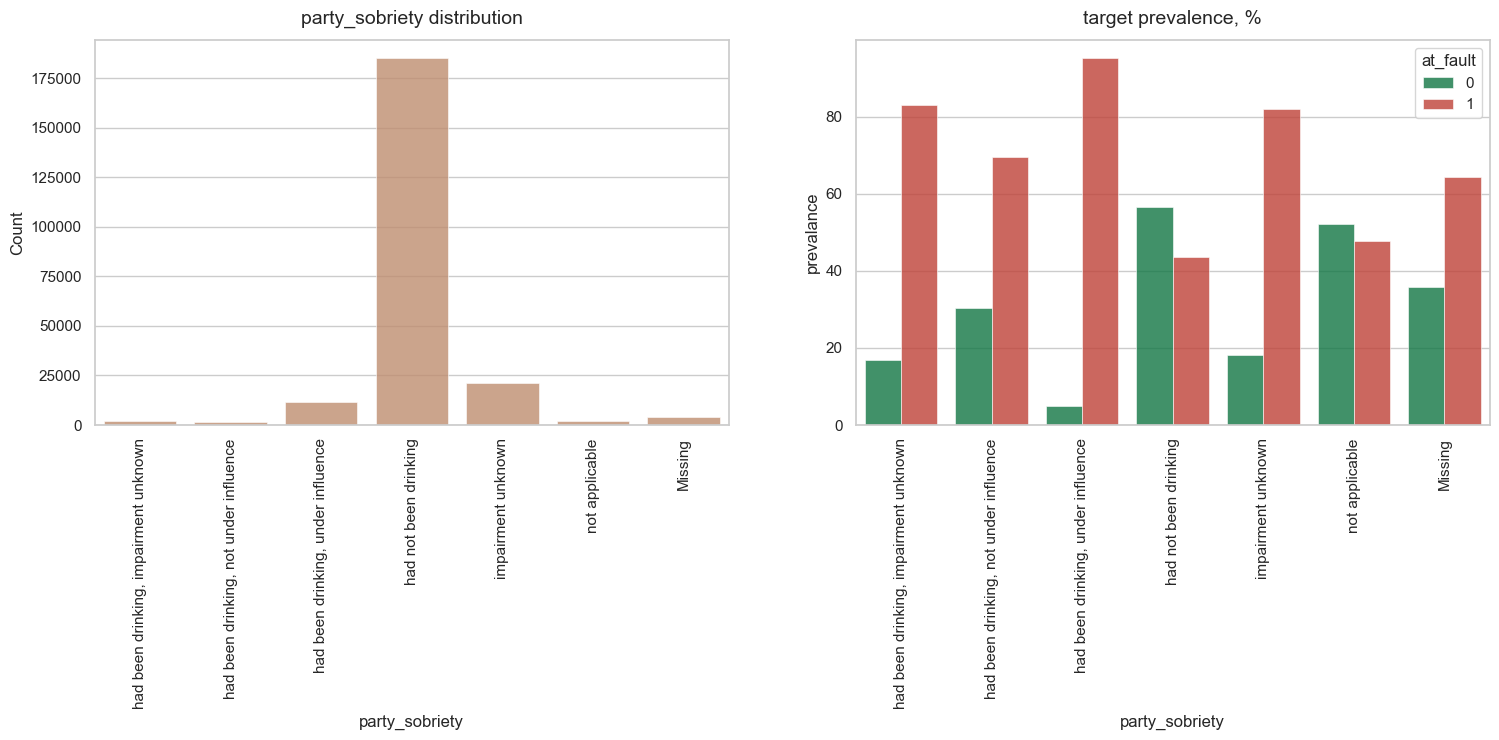

In [151]:
create_visualization(data=dds[["party_sobriety", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

Visualization of categorical features and target prevalence:

Feature: party_sobriety


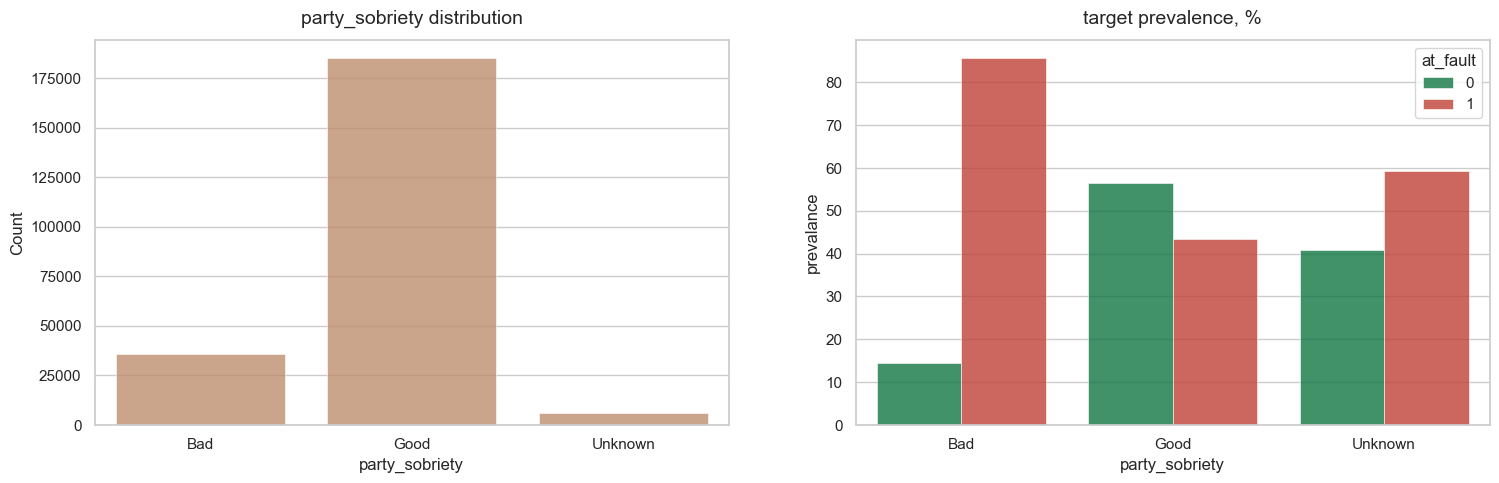

In [152]:
dds_temp = dds[["party_sobriety", "at_fault"]].copy()

dds_temp["party_sobriety"] = (
    dds_temp["party_sobriety"]
    .astype("object")
    .fillna("Unknown")
    .apply(lambda x: "Unknown" if x == "not applicable" else x)
    .apply(lambda x: "Bad" if x not in ["had not been drinking", "Unknown"] else x)
    .replace("had not been drinking", "Good"))

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

In [153]:
iv, woe = get_iv_woe(dds_temp, "at_fault", 10)
del dds_temp

iv = iv[["feature", "iv"]]
iv["class"] = iv["iv"].apply(iv_classifier)

iv

------------------IV and WOE calculated for individual groups.------------------
Total time elapsed: 0.001 minutes
------------------Aggregated IV values for features calculated.------------------
Total time elapsed: 0.001 minutes
------------------Null percent calculated in features.------------------
Total time elapsed: 0.002 minutes
------------------Binning remarks added and process is complete.------------------
Total time elapsed: 0.002 minutes


,feature,iv,class
0,party_sobriety,0.461497,Strong


Почти "божественный" уровень информационной ценности параметра и факт, что пропущенные значения имеют сильное смещение целевого признака в сторону виновности ДТП, а также описанные выше доводы считать данный параметр утечкой, сигнализирует о природе данного признака как об "информации из будущего", что обуславливает неиспользование данного параметра в моделе.

### party_drug_physical

Visualization of categorical features and target prevalence:

Feature: party_drug_physical


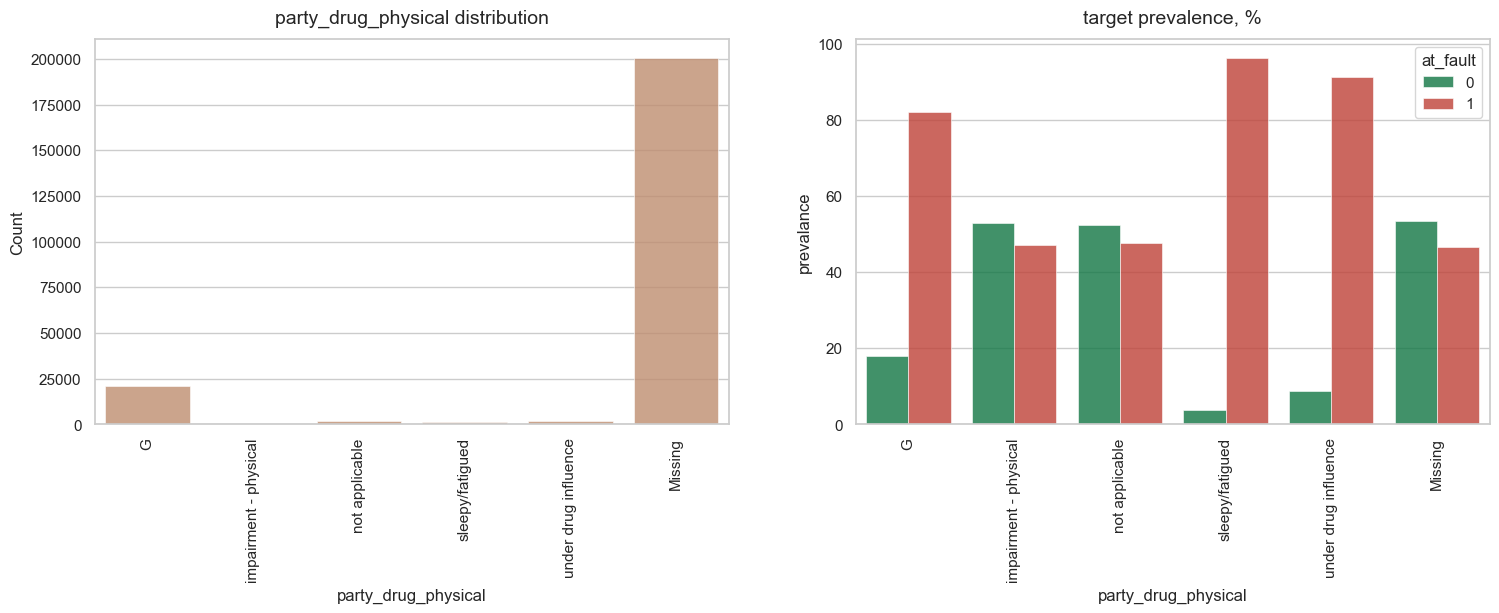

In [154]:
create_visualization(data=dds[["party_drug_physical", "at_fault"]],
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

Visualization of categorical features and target prevalence:

Feature: party_drug_physical


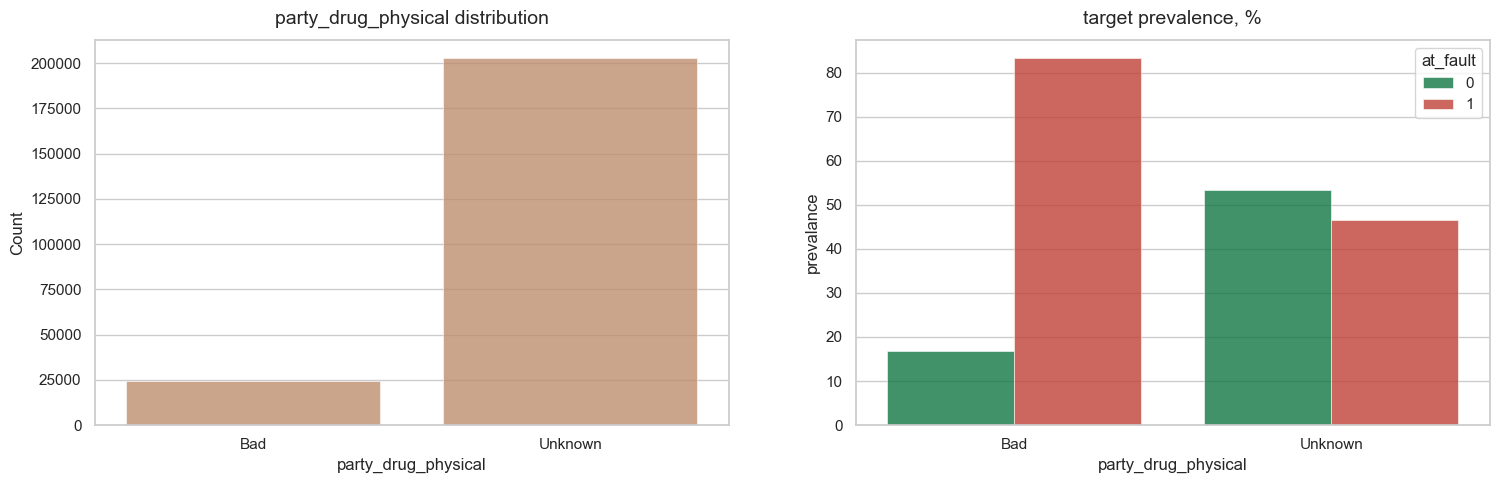

In [155]:
dds_temp = dds[["party_drug_physical", "at_fault"]].copy()

dds_temp["party_drug_physical"] = (
    dds_temp["party_drug_physical"]
    .astype("object")
    .fillna("Unknown")
    .apply(lambda x: "Unknown" if x in ["impairment - physical", "not applicable"] else x)
    .apply(lambda x: "Bad" if x != "Unknown" else x))

create_visualization(data=dds_temp,
                     dtype="categories", target="at_fault",
                     is_cat_target=True)

In [156]:
iv, woe = get_iv_woe(dds_temp, "at_fault", 10)
del dds_temp

iv = iv[["feature", "iv"]]
iv["class"] = iv["iv"].apply(iv_classifier)

iv

------------------IV and WOE calculated for individual groups.------------------
Total time elapsed: 0.001 minutes
------------------Aggregated IV values for features calculated.------------------
Total time elapsed: 0.001 minutes
------------------Null percent calculated in features.------------------
Total time elapsed: 0.002 minutes
------------------Binning remarks added and process is complete.------------------
Total time elapsed: 0.002 minutes


,feature,iv,class
0,party_drug_physical,0.243961,Medium


Полностью аналогичная ситуация `party_sobriety` и у данного параметра с тем усугублением, что параметр практически не заполнен.

Отбрасываем параметр из датасета.

## Корреляционный анализ данных

### Корреляция Пирсона

Initial value of memory usage:                  9559244
Value of memory usage after changing data types: 10920900

Memory usage reduced by -14.24% 



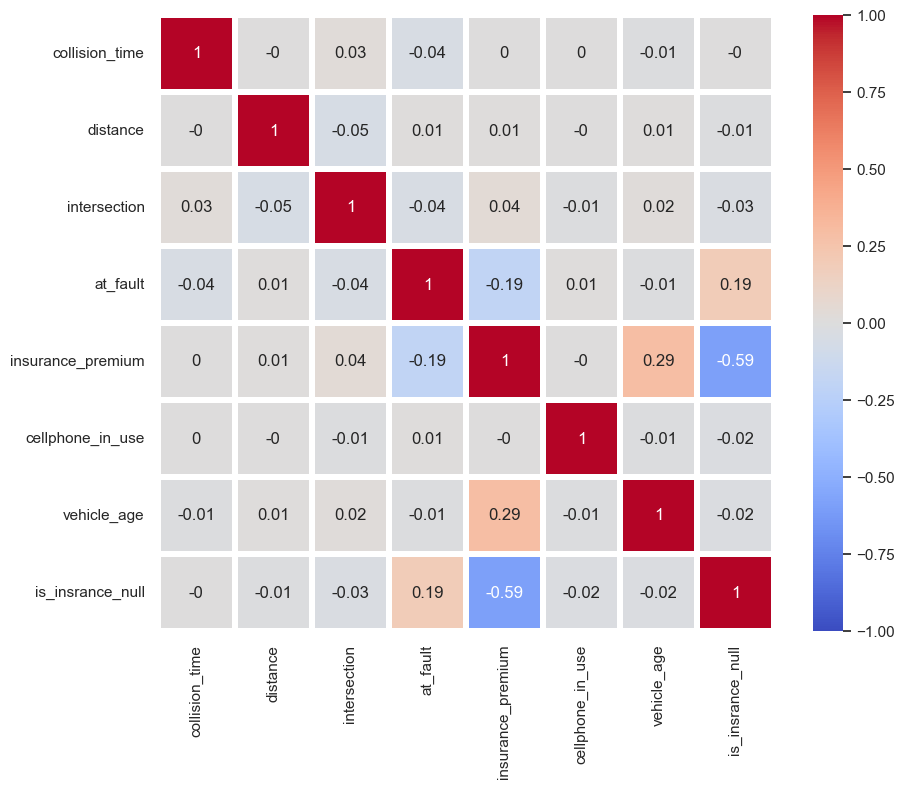

In [157]:
dds_temp = dds.copy()
dds_temp = change_dtypes(dds, **{"intersection": "float32",
                                 "cellphone_in_use": "float32"})
dds_temp["insurance_premium"] = (dds_temp["insurance_premium"]
                                 .fillna(0))

get_corr_map(dds_temp, figisze=(10, 8))

### Ранговая корреляция Спирмана

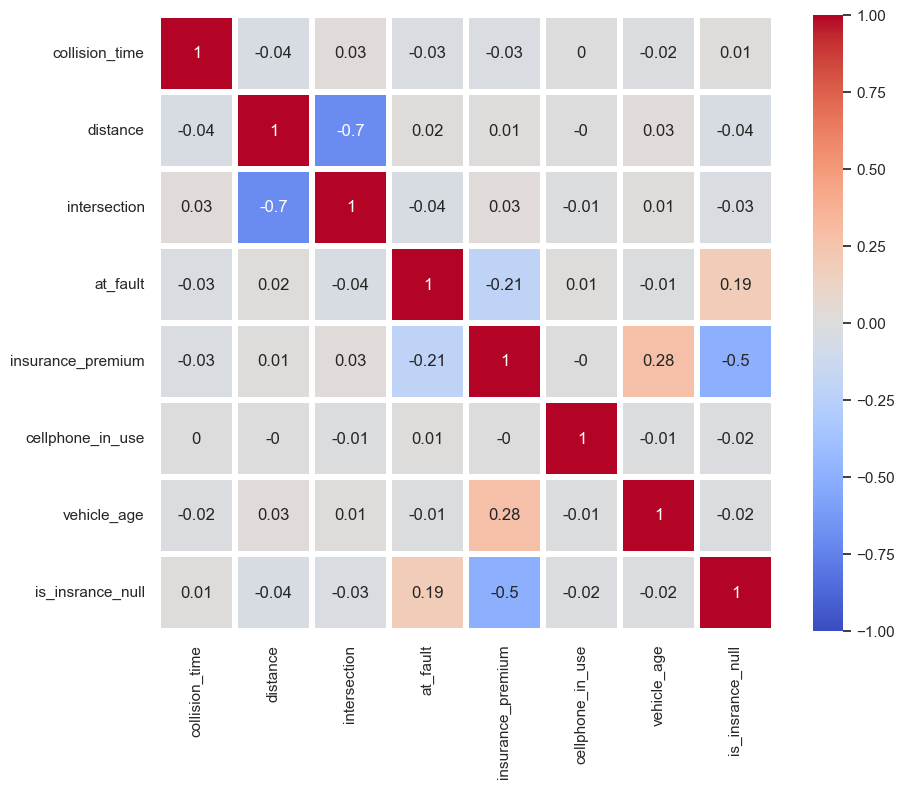

In [158]:
get_corr_map(dds_temp, "spearman", figisze=(10, 8))
del dds_temp

## Анализ IV WOE

In [159]:
iv, woe = get_iv_woe(dds.copy(), "at_fault", 50)
iv = (iv[["feature", "iv"]]
      .sort_values(by="iv", ascending=False)
      .reset_index(drop=True))
iv["class"] = iv["iv"].apply(iv_classifier)

iv

------------------IV and WOE calculated for individual groups.------------------
Total time elapsed: 0.094 minutes
------------------Aggregated IV values for features calculated.------------------
Total time elapsed: 0.094 minutes
------------------Null percent calculated in features.------------------
Total time elapsed: 0.102 minutes
------------------Binning remarks added and process is complete.------------------
Total time elapsed: 0.102 minutes


,feature,iv,class
0,party_sobriety,0.531891,Only the God
1,party_drug_physical,0.257560,Medium
2,insurance_premium,0.246785,Medium
3,is_insrance_null,0.162579,Medium
4,county_city_location,0.042314,Weak
5,vehicle_type,0.029027,Weak
6,lighting,0.028758,Weak
7,vehicle_transmission,0.023042,Weak
8,vehicle_age,0.022053,Weak
9,cellphone_in_use,0.020859,Weak


## Сборка и анализ датасета

In [168]:
old_shape = dds.shape[0]
ds = pd.DataFrame(
    {
        # Scalar features
        "q_distance":           (remove_outs(dds, "distance", False)
                                 .apply(np.round)
                                 .astype("int16")),
        "q_insurance":          (remove_outs(dds, "insurance_premium", False)
                                 .fillna(0)
                                 .apply(np.round)
                                 .astype("int16")),
        
        # Categorical features
        "c_location":           dds["county_location"],
        "c_diraction":          (dds["direction"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_intersection":       (dds["intersection"].cat.
                                 add_categories("missing").fillna("missing")),
        "c_weather_1":          (dds["weather_1"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_location_type":      (dds["location_type"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_road_surface":       (dds["road_surface"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_road_condition_1":   (dds["road_condition_1"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_lighting":           (dds["lighting"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_cellphone_in_use":   (dds["cellphone_in_use"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_vehicle_type":       (dds["vehicle_type"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_transmission":       (dds["vehicle_transmission"].cat
                                 .add_categories("missing").fillna("missing")),
        "c_vehicle_age":        (dds["vehicle_age"]
                                 .fillna(-1)
                                 .astype("object")
                                 .apply(lambda x: "5+" if int(x) > 4 else x)
                                 .apply(lambda x: "0-1" if x in [0, 1] else x)
                                 .apply(lambda x: "2-4" if x in [2, 3, 4] else x)
                                 .replace(-1, "missing")
                                 .astype("category")),

        # Feature engineering
        ## Categorical features
        "c_dow":                (pd.to_datetime(dds["collision_date"])
                                .dt.dayofweek.astype("category")),
        "c_time":               (dds["collision_time"]
                                 .apply(lambda x: 1 if x < 6 else x)
                                 .apply(lambda x: 2 if x > 5 and x < 21 else x)
                                 .apply(lambda x: 3 if x > 20 else x)
                                 .fillna("missing")
                                 .replace(1, "00:00 AM - 05:00 AM")
                                 .replace(2, "05:00 AM - 08:00 PM")
                                 .replace(3, "09:00 PM - 11:00 PM")
                                 .astype("category")),
        ## Binary features
        "b_is_insrance_null":     dds["is_insrance_null"],

        # Target
        "target":               dds["at_fault"]
    }
).reset_index(drop=True)
# del dds

print("Dataset assembled.")
print()

print("Nulls values in data was dropped:           ", ds.isna().sum().sum())
ds = ds.dropna().reset_index(drop=True)

print()
print("Duplicates in data:                         ", ds.duplicated().sum())
ds = ds.drop_duplicates().reset_index(drop=True)
print("Duplicates in data after processing:        ", ds.duplicated().sum())
print()

cat_features = []
for i in ds.columns:
    if not pd.isna(re.search("^c.*", i)) or not pd.isna(re.search("^b.*", i)):
        cat_features.append(i)

q_features = list(ds.drop(cat_features, axis=1).columns)[0:-1]


print("DS shape:                                   ", ds.shape)
print("The amount of observations has decreased by:",
      f"{100 - np.round(ds.shape[0] / old_shape * 100, 2)}%")
print()
print("Cat features:")
print(cat_features)
print()
print("Quantitative features:")
print(q_features)
print()
print("Dataset sample:")
ds.head()

Dataset assembled.

Nulls values in data was dropped:            0

Duplicates in data:                          13582
Duplicates in data after processing:         0

DS shape:                                    (213402, 18)
The amount of observations has decreased by: 5.980000000000004%

Cat features:
['c_location', 'c_diraction', 'c_intersection', 'c_weather_1', 'c_location_type', 'c_road_surface', 'c_road_condition_1', 'c_lighting', 'c_cellphone_in_use', 'c_vehicle_type', 'c_transmission', 'c_vehicle_age', 'c_dow', 'c_time', 'b_is_insrance_null']

Quantitative features:
['q_distance', 'q_insurance']

Dataset sample:


,q_distance,q_insurance,c_location,c_diraction,c_intersection,c_weather_1,c_location_type,c_road_surface,c_road_condition_1,c_lighting,c_cellphone_in_use,c_vehicle_type,c_transmission,c_vehicle_age,c_dow,c_time,b_is_insrance_null,target
0,0,19,santa clara,missing,missing,clear,missing,dry,normal,daylight,missing,sedan,auto,0-1,2,05:00 AM - 08:00 PM,0,0
1,900,65,orange,north,0.0,clear,missing,dry,normal,daylight,0.0,missing,missing,missing,3,05:00 AM - 08:00 PM,0,0
2,50,19,kings,north,0.0,clear,highway,dry,normal,daylight,0.0,sedan,manual,2-4,3,05:00 AM - 08:00 PM,0,1
3,0,21,los angeles,missing,1.0,clear,missing,dry,normal,daylight,missing,missing,missing,missing,4,05:00 AM - 08:00 PM,0,1
4,1235,27,placer,south,0.0,clear,highway,dry,normal,dark with no street lights,0.0,coupe,manual,2-4,0,00:00 AM - 05:00 AM,0,1


In [169]:
df_quik_view(ds)

General data analysis:

Shape of the table:      (213402, 18)
Duplicates in the table: 0, (0.0%)
Memory usage:            42.7+ MB



Completed for 00:00:00


,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
q_distance,213402,0,100.0,1162,"[1235, 1234, 1233, 1232, 1231, 1230, 1229, 122...",int16
q_insurance,213402,0,100.0,89,"[88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 7...",int16
c_location,213402,0,100.0,58,"['yuba', 'yolo', 'ventura', 'tuolumne', 'tular...",category
c_diraction,213402,0,100.0,5,"['missing', 'west', 'south', 'north', 'east'] ...",category
c_intersection,213402,0,100.0,3,"['missing', 1.0, 0.0] Categories (3, object): ...",category
c_weather_1,213402,0,100.0,8,"['missing', 'wind', 'snowing', 'raining', 'oth...",category
c_location_type,213402,0,100.0,4,"['missing', 'ramp', 'intersection', 'highway']...",category
c_road_surface,213402,0,100.0,5,"['missing', 'wet', 'snowy', 'slippery', 'dry']...",category
c_road_condition_1,213402,0,100.0,9,"['missing', 'reduced width', 'other', 'obstruc...",category
c_lighting,213402,0,100.0,6,"['missing', 'dusk or dawn', 'daylight', 'dark ...",category


### Отброс малозначащих параметров из датасета

In [170]:
iv, woe = get_iv_woe(ds.copy(), "target", 100)
iv = (iv[["feature", "iv"]]
      .sort_values(by="iv", ascending=False)
      .reset_index(drop=True))
iv["class"] = iv["iv"].apply(iv_classifier)

iv

------------------IV and WOE calculated for individual groups.------------------
Total time elapsed: 0.107 minutes
------------------Aggregated IV values for features calculated.------------------
Total time elapsed: 0.107 minutes
------------------Null percent calculated in features.------------------
Total time elapsed: 0.114 minutes
------------------Binning remarks added and process is complete.------------------
Total time elapsed: 0.115 minutes


,feature,iv,class
0,q_insurance,0.180458,Medium
1,b_is_insrance_null,0.146811,Medium
2,c_time,0.067601,Weak
3,c_lighting,0.029409,Weak
4,c_vehicle_type,0.028564,Weak
5,c_vehicle_age,0.021505,Weak
6,c_transmission,0.020201,Weak
7,c_location_type,0.019286,Bullshit
8,c_location,0.018957,Bullshit
9,c_cellphone_in_use,0.016333,Bullshit


In [171]:
week_features = iv[iv["class"] == "Bullshit"]["feature"]
ds = ds.drop(week_features, axis=1)

cat_features = []
for i in ds.columns:
    if not pd.isna(re.search("^c.*", i)) or not pd.isna(re.search("^b.*", i)):
        cat_features.append(i)

q_features = list(ds.drop(cat_features, axis=1).columns)[0:-1]

### Проверка мультиколлинеарности

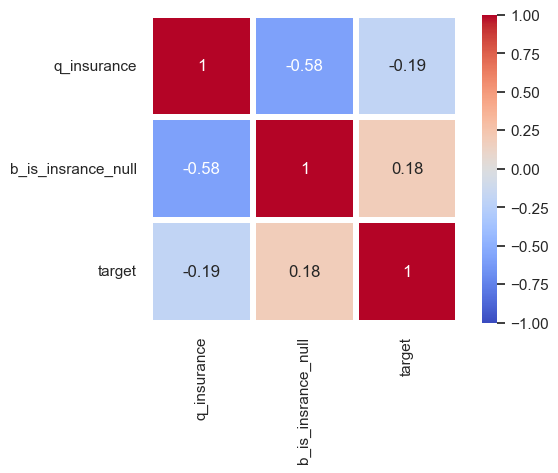

In [172]:
get_corr_map(ds, figisze=(6, 4))

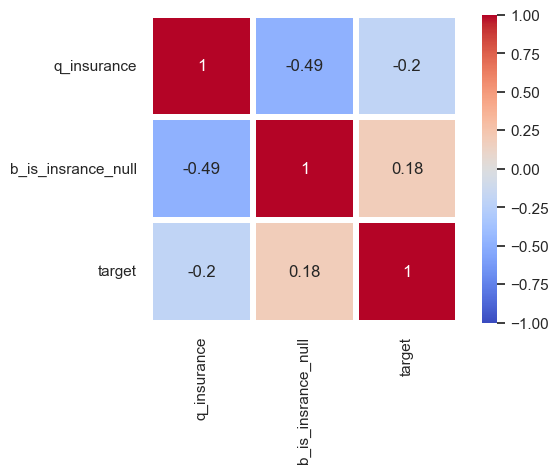

In [173]:
get_corr_map(ds, "spearman", figisze=(6, 4))

## Формирование и обработка выборок

### Определение обучающей, валидационной и тестовой выборки

In [174]:
X = ds.drop("target", axis=1)
y = ds["target"]

X[cat_features] = X[cat_features].astype(str)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=np.round((X.shape[0] * TEST_SIZE) / X_train.shape[0], 2),
    stratify=y_train, random_state=RANDOM_STATE)

print('Sampling was successful!')
print('\n')
print('The shape of the training set for independent features:  ',
      X_train.shape)
print('The shape of the training set for target:                ',
      y_train.shape)
print()
print('The shape of the validation set for independent features:',
      X_val.shape)
print('The shape of the validation set for target:              ',
      y_val.shape)
print()
print('The shape of the test set for independent features:      ',
      X_test.shape)
print('The shape of the test set for target:                    ',
      y_test.shape)

Sampling was successful!


The shape of the training set for independent features:   (128040, 7)
The shape of the training set for target:                 (128040,)

The shape of the validation set for independent features: (42681, 7)
The shape of the validation set for target:               (42681,)

The shape of the test set for independent features:       (42681, 7)
The shape of the test set for target:                     (42681,)


### Нормализация и порядковое кодирование

In [175]:
oe = OE.fit(X_train[cat_features])

X_train[cat_features] = oe.transform(X_train[cat_features])
X_val[cat_features] = oe.transform(X_val[cat_features])
X_test[cat_features] = oe.transform(X_test[cat_features])


scaler = SCALER.fit(X_train[q_features])

X_train[q_features] = scaler.transform(X_train[q_features])
X_val[q_features] = scaler.transform(X_val[q_features])
X_test[q_features] = scaler.transform(X_test[q_features])

print('Train sample:')
display(X_train.sample())
print()
print('Validation sample:')
display(X_val.sample())
print()
print('Test sample:')
display(X_val.sample())

Train sample:


,q_insurance,c_lighting,c_vehicle_type,c_transmission,c_vehicle_age,c_time,b_is_insrance_null
15488,0.0,1.0,3.0,2.0,3.0,0.0,1.0



Validation sample:


,q_insurance,c_lighting,c_vehicle_type,c_transmission,c_vehicle_age,c_time,b_is_insrance_null
186939,0.386364,3.0,0.0,0.0,2.0,1.0,0.0



Test sample:


,q_insurance,c_lighting,c_vehicle_type,c_transmission,c_vehicle_age,c_time,b_is_insrance_null
163270,0.238636,1.0,0.0,0.0,2.0,1.0,0.0


## Разработка и оценка ML-моделей

### Модели на основе градиентного бустинга

#### CatBoost

##### Подготовка выборок

In [176]:
X_train[cat_features] = X_train[cat_features].astype(str)
X_val[cat_features] = X_val[cat_features].astype(str)
X_test[cat_features] = X_test[cat_features].astype(str)

train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
val_pool = Pool(data=X_val, label=y_val, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

##### Описание задачи подбора гиперпараметров

In [182]:
def objective_cb(trial):
    params = {
        "learning_rate": trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        "depth": trial.suggest_int("depth", 4, 8),
        "loss_function": trial.suggest_categorical("loss_function",
                                                   ["Logloss", "CrossEntropy"]),
        "iterations": 1000,
        "random_state": RANDOM_STATE,
        "task_type": TASK_TYPE,
        "devices": "0:1" if TASK_TYPE == "GPU" else None
    }

    model = CatBoostClassifier(**params)

    model.fit(X=train_pool,
              verbose=False,
              early_stopping_rounds=50,
              use_best_model=True)

    y_prob = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_prob, average=None)

    return score

##### Подбор гиперпараметров

In [183]:
study_cb = optuna.create_study(direction="maximize")
study_cb.optimize(objective_cb, n_trials=10000, timeout=TIMEOUT)

cb_opt_res = study_cb.best_trial.values
cb_opt_res

[I 2023-04-18 01:36:13,225] A new study created in memory with name: no-name-d001d32d-1444-4596-aa6d-e442754132ab
You should provide test set for use best model. use_best_model parameter has been switched to false value.
[I 2023-04-18 01:37:08,431] Trial 0 finished with value: 0.6573141121910097 and parameters: {'learning_rate': 0.03278659914998686, 'depth': 6, 'loss_function': 'Logloss'}. Best is trial 0 with value: 0.6573141121910097.
You should provide test set for use best model. use_best_model parameter has been switched to false value.
[I 2023-04-18 01:37:53,754] Trial 1 finished with value: 0.6574386219736953 and parameters: {'learning_rate': 0.011561673433914949, 'depth': 5, 'loss_function': 'Logloss'}. Best is trial 1 with value: 0.6574386219736953.
You should provide test set for use best model. use_best_model parameter has been switched to false value.
[I 2023-04-18 01:38:56,115] Trial 2 finished with value: 0.6557073709694689 and parameters: {'learning_rate': 0.096684466212

[0.6577884222532112]

In [184]:
best_params_cb = study_cb.best_trial.params
best_params_cb

# best_params_cb = {'learning_rate': 0.3, #0.03148589989903789,
#  'depth': 7,
#  'loss_function': 'CrossEntropy'}

{'learning_rate': 0.01178265100447557,
 'depth': 7,
 'loss_function': 'CrossEntropy'}

In [185]:
optuna.visualization.plot_param_importances(study_cb)

#### LGM

##### Подготовка выборок

In [186]:
X_train[cat_features] = X_train[cat_features].astype(float).astype("int8")
X_val[cat_features] = X_val[cat_features].astype(float).astype("int8")
X_test[cat_features] = X_test[cat_features].astype(float).astype("int8")

##### Описание задачи подбора гиперпараметров

In [187]:
def objective_lgbm(trial):    
    params = {
        "learning_rate": trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        "max_depth ": trial.suggest_int("max_depth ", 4, 8),

        "n_estimators": 2000,
        "random_state": RANDOM_STATE,
    }

    model = LGBMClassifier(**params)

    model.fit(X_train, y_train, eval_set=(X_val, y_val),
              categorical_feature=cat_features,
              early_stopping_rounds=50,
              verbose=False)

    y_prob = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_prob, average=None)

    return score

##### Подбор гиперпараметров

In [188]:
study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=10000, timeout=TIMEOUT)

[I 2023-04-18 02:37:02,690] A new study created in memory with name: no-name-087702c4-1c11-470e-a43c-75f182b0e94f


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:37:12,023] Trial 0 finished with value: 0.6576863190468882 and parameters: {'learning_rate': 0.005991807193675901, 'max_depth ': 6}. Best is trial 0 with value: 0.6576863190468882.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:37:21,396] Trial 1 finished with value: 0.6578867029738368 and parameters: {'learning_rate': 0.00557483285135615, 'max_depth ': 4}. Best is trial 1 with value: 0.6578867029738368.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:37:32,385] Trial 2 finished with value: 0.6577632399810562 and parameters: {'learning_rate': 0.004884910885106907, 'max_depth ': 5}. Best is trial 1 with value: 0.6578867029738368.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:37:39,698] Trial 3 finished with value: 0.6576802689746982 and parameters: {'learning_rate': 0.009032757043113454, 'max_depth ': 7}. Best is trial 1 with value: 0.6578867029738368.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:37:45,799] Trial 4 finished with value: 0.6578354388272896 and parameters: {'learning_rate': 0.011817955652650043, 'max_depth ': 5}. Best is trial 1 with value: 0.6578867029738368.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:38:08,020] Trial 5 finished with value: 0.6561893051331721 and parameters: {'learning_rate': 0.0011147473415726234, 'max_depth ': 7}. Best is trial 1 with value: 0.6578867029738368.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 02:38:08,884] Trial 6 finished with value: 0.65771522055369 and parameters: {'learning_rate': 0.08514802061500705, 'max_depth ': 8}. Best is trial 1 with value: 0.6578867029738368.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:38:09,916] Trial 7 finished with value: 0.6578000632599416 and parameters: {'learning_rate': 0.07753978638343013, 'max_depth ': 4}. Best is trial 1 with value: 0.6578867029738368.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:38:28,456] Trial 8 finished with value: 0.6571181658623995 and parameters: {'learning_rate': 0.0017100553277632014, 'max_depth ': 5}. Best is trial 1 with value: 0.6578867029738368.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:38:29,527] Trial 9 finished with value: 0.6580568057842029 and parameters: {'learning_rate': 0.06453585172047828, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:38:31,534] Trial 10 finished with value: 0.6578563219014502 and parameters: {'learning_rate': 0.033888703680904804, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:38:34,309] Trial 11 finished with value: 0.6577869921163211 and parameters: {'learning_rate': 0.021564905376225355, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:38:36,113] Trial 12 finished with value: 0.6577989626476803 and parameters: {'learning_rate': 0.03614098806730695, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:38:53,173] Trial 13 finished with value: 0.6577824886130568 and parameters: {'learning_rate': 0.0028243103396807306, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:38:56,932] Trial 14 finished with value: 0.657840907837717 and parameters: {'learning_rate': 0.015610766547518775, 'max_depth ': 6}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:39:08,933] Trial 15 finished with value: 0.6576765178860036 and parameters: {'learning_rate': 0.0044017014936760775, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:39:17,367] Trial 16 finished with value: 0.6576970879117668 and parameters: {'learning_rate': 0.008400761782916563, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:39:20,551] Trial 17 finished with value: 0.6576607292626087 and parameters: {'learning_rate': 0.021886977106900567, 'max_depth ': 6}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:39:21,982] Trial 18 finished with value: 0.6576890409203247 and parameters: {'learning_rate': 0.05223534178037399, 'max_depth ': 7}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:39:26,263] Trial 19 finished with value: 0.6578233309940014 and parameters: {'learning_rate': 0.014653046162811876, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 02:39:45,008] Trial 20 finished with value: 0.6577146405903429 and parameters: {'learning_rate': 0.0030322612219693167, 'max_depth ': 8}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:39:46,806] Trial 21 finished with value: 0.6576108271511949 and parameters: {'learning_rate': 0.04251063588580598, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:39:49,765] Trial 22 finished with value: 0.6578494524113492 and parameters: {'learning_rate': 0.030814835761649166, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:39:51,117] Trial 23 finished with value: 0.6577672382132227 and parameters: {'learning_rate': 0.065561368846833, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:39:52,217] Trial 24 finished with value: 0.6577716373670208 and parameters: {'learning_rate': 0.09406871954545933, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:39:53,325] Trial 25 finished with value: 0.6574644973459867 and parameters: {'learning_rate': 0.05548739097704039, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:39:55,339] Trial 26 finished with value: 0.6575863291918531 and parameters: {'learning_rate': 0.02996416039379241, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:39:56,155] Trial 27 finished with value: 0.6577109125683724 and parameters: {'learning_rate': 0.09930279944600875, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:39:57,594] Trial 28 finished with value: 0.6577214979978743 and parameters: {'learning_rate': 0.04763370860005666, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:39:58,788] Trial 29 finished with value: 0.6580081778346883 and parameters: {'learning_rate': 0.061194770748927256, 'max_depth ': 6}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:39:59,952] Trial 30 finished with value: 0.6575822628579302 and parameters: {'learning_rate': 0.06745469676731262, 'max_depth ': 6}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:40:01,155] Trial 31 finished with value: 0.6576748120468405 and parameters: {'learning_rate': 0.05849186288748384, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:40:02,941] Trial 32 finished with value: 0.6576958214387757 and parameters: {'learning_rate': 0.03887656775171397, 'max_depth ': 6}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:40:03,965] Trial 33 finished with value: 0.6575260800070861 and parameters: {'learning_rate': 0.07115344134332904, 'max_depth ': 7}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:40:10,859] Trial 34 finished with value: 0.6577895162749798 and parameters: {'learning_rate': 0.007952538319488903, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:40:12,352] Trial 35 finished with value: 0.6577796107646294 and parameters: {'learning_rate': 0.046268567701371374, 'max_depth ': 6}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 02:40:21,136] Trial 36 finished with value: 0.6576369474701274 and parameters: {'learning_rate': 0.005840582654223841, 'max_depth ': 8}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:40:22,222] Trial 37 finished with value: 0.6577784530347659 and parameters: {'learning_rate': 0.06737708100978324, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:40:27,214] Trial 38 finished with value: 0.657762897275442 and parameters: {'learning_rate': 0.010868574320020953, 'max_depth ': 7}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:40:28,145] Trial 39 finished with value: 0.6577990922607011 and parameters: {'learning_rate': 0.078485881563535, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:40:30,564] Trial 40 finished with value: 0.6577429346734118 and parameters: {'learning_rate': 0.026199507158952445, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:40:32,540] Trial 41 finished with value: 0.6577127754809423 and parameters: {'learning_rate': 0.03360995705395221, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:40:34,287] Trial 42 finished with value: 0.6577970887509563 and parameters: {'learning_rate': 0.039424840391290975, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:40:36,768] Trial 43 finished with value: 0.6577577819547832 and parameters: {'learning_rate': 0.02551412564359177, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:40:37,974] Trial 44 finished with value: 0.6576966529392565 and parameters: {'learning_rate': 0.0506779930352451, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:40:40,034] Trial 45 finished with value: 0.6576692035376535 and parameters: {'learning_rate': 0.032501254570697136, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:40:43,275] Trial 46 finished with value: 0.6577315188418449 and parameters: {'learning_rate': 0.01930210174266966, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:40:44,201] Trial 47 finished with value: 0.6573687627523286 and parameters: {'learning_rate': 0.08304599732002856, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:40:45,834] Trial 48 finished with value: 0.6578142284253304 and parameters: {'learning_rate': 0.041418064684565714, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:40:48,019] Trial 49 finished with value: 0.6578132277688735 and parameters: {'learning_rate': 0.029786824541067833, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:40:49,160] Trial 50 finished with value: 0.6578052422886953 and parameters: {'learning_rate': 0.05907189907649083, 'max_depth ': 7}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:40:52,363] Trial 51 finished with value: 0.6576719506746446 and parameters: {'learning_rate': 0.019396693138609172, 'max_depth ': 6}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:40:56,637] Trial 52 finished with value: 0.6577103501796722 and parameters: {'learning_rate': 0.01377403818418185, 'max_depth ': 7}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:41:00,265] Trial 53 finished with value: 0.6577180852211323 and parameters: {'learning_rate': 0.016860615114262935, 'max_depth ': 6}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:41:02,740] Trial 54 finished with value: 0.6576816903242649 and parameters: {'learning_rate': 0.024839567352481284, 'max_depth ': 6}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:04,724] Trial 55 finished with value: 0.657854105299112 and parameters: {'learning_rate': 0.03364613847015717, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:06,511] Trial 56 finished with value: 0.6577303918676134 and parameters: {'learning_rate': 0.03674484716144142, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:08,037] Trial 57 finished with value: 0.6579563304295476 and parameters: {'learning_rate': 0.04468388549052069, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:09,489] Trial 58 finished with value: 0.6579936567826999 and parameters: {'learning_rate': 0.04595217031496772, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:11,128] Trial 59 finished with value: 0.657961903789441 and parameters: {'learning_rate': 0.04748103822583057, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:41:11,999] Trial 60 finished with value: 0.6578760088012074 and parameters: {'learning_rate': 0.08337029729556904, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:41:12,866] Trial 61 finished with value: 0.6576339861421272 and parameters: {'learning_rate': 0.08583832987561676, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:14,133] Trial 62 finished with value: 0.6579012965212437 and parameters: {'learning_rate': 0.0574149659686037, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:15,336] Trial 63 finished with value: 0.6574646093843606 and parameters: {'learning_rate': 0.05549061102569408, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:16,845] Trial 64 finished with value: 0.6575579329561492 and parameters: {'learning_rate': 0.0478148756113153, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:17,949] Trial 65 finished with value: 0.6576584291806976 and parameters: {'learning_rate': 0.060570138002662886, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:18,976] Trial 66 finished with value: 0.6578911361785135 and parameters: {'learning_rate': 0.07131654861647575, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:19,930] Trial 67 finished with value: 0.6577639133097151 and parameters: {'learning_rate': 0.0748278759717395, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:21,423] Trial 68 finished with value: 0.657774548167911 and parameters: {'learning_rate': 0.04507977651108076, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:22,302] Trial 69 finished with value: 0.6576581073449767 and parameters: {'learning_rate': 0.09874996949410292, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:23,451] Trial 70 finished with value: 0.6575015084539104 and parameters: {'learning_rate': 0.06645661481960599, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:24,548] Trial 71 finished with value: 0.6575904855958413 and parameters: {'learning_rate': 0.05846409107811202, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 02:41:25,934] Trial 72 finished with value: 0.6578649170021923 and parameters: {'learning_rate': 0.05083496929703062, 'max_depth ': 8}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:26,958] Trial 73 finished with value: 0.6579938006751213 and parameters: {'learning_rate': 0.07325524676477169, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:27,980] Trial 74 finished with value: 0.6575578516734073 and parameters: {'learning_rate': 0.06832905897448227, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:29,575] Trial 75 finished with value: 0.657804720541366 and parameters: {'learning_rate': 0.04319966364320724, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:30,478] Trial 76 finished with value: 0.6576680567919442 and parameters: {'learning_rate': 0.07528808217520923, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:31,680] Trial 77 finished with value: 0.6578052521744342 and parameters: {'learning_rate': 0.05442405520043878, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:41:32,533] Trial 78 finished with value: 0.6579192962548999 and parameters: {'learning_rate': 0.08856705046550581, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:41:33,412] Trial 79 finished with value: 0.6577674787662018 and parameters: {'learning_rate': 0.08761952059815775, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:41:34,235] Trial 80 finished with value: 0.6575634755604104 and parameters: {'learning_rate': 0.09072258025001385, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:35,277] Trial 81 finished with value: 0.6579582394755655 and parameters: {'learning_rate': 0.06319916465685974, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:36,407] Trial 82 finished with value: 0.6576632116814811 and parameters: {'learning_rate': 0.05987669329313785, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:37,921] Trial 83 finished with value: 0.657743744205584 and parameters: {'learning_rate': 0.0477260786949423, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:38,860] Trial 84 finished with value: 0.6577076370935595 and parameters: {'learning_rate': 0.07742915000105874, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:41:39,967] Trial 85 finished with value: 0.6577367055595067 and parameters: {'learning_rate': 0.06412007705056169, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:41,642] Trial 86 finished with value: 0.6578169217399655 and parameters: {'learning_rate': 0.04042653253293246, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:43,003] Trial 87 finished with value: 0.6578426993532838 and parameters: {'learning_rate': 0.05255379072654206, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:43,938] Trial 88 finished with value: 0.6578158002578113 and parameters: {'learning_rate': 0.09971136402797263, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:41:44,907] Trial 89 finished with value: 0.6576419639333977 and parameters: {'learning_rate': 0.06437897040581655, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:41:45,813] Trial 90 finished with value: 0.6578361363210878 and parameters: {'learning_rate': 0.07639021304292214, 'max_depth ': 5}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:46,786] Trial 91 finished with value: 0.6578916304654571 and parameters: {'learning_rate': 0.07131355263784547, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:48,156] Trial 92 finished with value: 0.65771798965899 and parameters: {'learning_rate': 0.051273590299081864, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:49,017] Trial 93 finished with value: 0.6576467189737952 and parameters: {'learning_rate': 0.08406954586183951, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:50,637] Trial 94 finished with value: 0.6578881957204065 and parameters: {'learning_rate': 0.04450560730776008, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:51,584] Trial 95 finished with value: 0.6575941059730996 and parameters: {'learning_rate': 0.07058871772386184, 'max_depth ': 4}. Best is trial 9 with value: 0.6580568057842029.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:52,742] Trial 96 finished with value: 0.6581140299328749 and parameters: {'learning_rate': 0.06251012124455868, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:54,519] Trial 97 finished with value: 0.6577638430111277 and parameters: {'learning_rate': 0.037958214568795154, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:55,560] Trial 98 finished with value: 0.657825780460411 and parameters: {'learning_rate': 0.06029485019916211, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:56,713] Trial 99 finished with value: 0.6578001247712055 and parameters: {'learning_rate': 0.05621919952100322, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:41:57,517] Trial 100 finished with value: 0.6573298393031406 and parameters: {'learning_rate': 0.08936351133454708, 'max_depth ': 7}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:58,598] Trial 101 finished with value: 0.6579456263711794 and parameters: {'learning_rate': 0.06432498704052536, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:41:59,680] Trial 102 finished with value: 0.6580462434214253 and parameters: {'learning_rate': 0.06339921729137371, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:00,682] Trial 103 finished with value: 0.6576108216591178 and parameters: {'learning_rate': 0.06415219196702844, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:02,065] Trial 104 finished with value: 0.6577283345355124 and parameters: {'learning_rate': 0.046940397310701876, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:03,562] Trial 105 finished with value: 0.6578451773784946 and parameters: {'learning_rate': 0.050260718202515105, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:04,544] Trial 106 finished with value: 0.6580735093876515 and parameters: {'learning_rate': 0.07941246293644148, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:06,065] Trial 107 finished with value: 0.6575887182454141 and parameters: {'learning_rate': 0.04128646978930436, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:07,020] Trial 108 finished with value: 0.6580737730073547 and parameters: {'learning_rate': 0.07940920448925341, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 02:42:07,869] Trial 109 finished with value: 0.6575842927296454 and parameters: {'learning_rate': 0.07794670271578044, 'max_depth ': 8}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:08,767] Trial 110 finished with value: 0.657660738049932 and parameters: {'learning_rate': 0.07974827388877949, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:09,836] Trial 111 finished with value: 0.6575837061758056 and parameters: {'learning_rate': 0.0637343736623893, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:11,068] Trial 112 finished with value: 0.6576130294741327 and parameters: {'learning_rate': 0.05558050423230071, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:12,062] Trial 113 finished with value: 0.6576404700884123 and parameters: {'learning_rate': 0.07258769834474305, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:13,030] Trial 114 finished with value: 0.6575800352714375 and parameters: {'learning_rate': 0.06750476616525053, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:14,290] Trial 115 finished with value: 0.6578645896743941 and parameters: {'learning_rate': 0.05284211555464136, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:15,282] Trial 116 finished with value: 0.6574971510398986 and parameters: {'learning_rate': 0.09411833134397518, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:16,435] Trial 117 finished with value: 0.6578088505833839 and parameters: {'learning_rate': 0.06172619116672862, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:17,380] Trial 118 finished with value: 0.6578176236274257 and parameters: {'learning_rate': 0.08017100639610972, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:18,408] Trial 119 finished with value: 0.657725548953981 and parameters: {'learning_rate': 0.06903319612697871, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:20,259] Trial 120 finished with value: 0.6577290869500821 and parameters: {'learning_rate': 0.03617861586390622, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:42:21,173] Trial 121 finished with value: 0.6574200763275702 and parameters: {'learning_rate': 0.08891444911315721, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:22,083] Trial 122 finished with value: 0.6574392985976003 and parameters: {'learning_rate': 0.08662059820984576, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:42:23,089] Trial 123 finished with value: 0.6575678351712533 and parameters: {'learning_rate': 0.07533168360941937, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:24,301] Trial 124 finished with value: 0.6578559506370348 and parameters: {'learning_rate': 0.05854053366626097, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:25,140] Trial 125 finished with value: 0.6577305478426045 and parameters: {'learning_rate': 0.09988286884481286, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:26,687] Trial 126 finished with value: 0.6579073421997721 and parameters: {'learning_rate': 0.048567930584758355, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:28,112] Trial 127 finished with value: 0.6577573766394894 and parameters: {'learning_rate': 0.04290517932658889, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:29,130] Trial 128 finished with value: 0.6578084441696748 and parameters: {'learning_rate': 0.08142484253922044, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:42:30,250] Trial 129 finished with value: 0.6578850915984005 and parameters: {'learning_rate': 0.06554462943289949, 'max_depth ': 5}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:31,240] Trial 130 finished with value: 0.657722850147269 and parameters: {'learning_rate': 0.07092835611088825, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:32,672] Trial 131 finished with value: 0.6578121710932294 and parameters: {'learning_rate': 0.049282738105035674, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:33,874] Trial 132 finished with value: 0.6578569370140913 and parameters: {'learning_rate': 0.054901469218820276, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:35,495] Trial 133 finished with value: 0.6577341089054296 and parameters: {'learning_rate': 0.046073030262195544, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:36,657] Trial 134 finished with value: 0.6577868053856978 and parameters: {'learning_rate': 0.06126939657653613, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:37,957] Trial 135 finished with value: 0.6576844715121345 and parameters: {'learning_rate': 0.05278619527436236, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:40,579] Trial 136 finished with value: 0.6578472105454559 and parameters: {'learning_rate': 0.03970401423955913, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:42,107] Trial 137 finished with value: 0.6577763539628785 and parameters: {'learning_rate': 0.09196285107943977, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:42:43,294] Trial 138 finished with value: 0.6577207895199217 and parameters: {'learning_rate': 0.07283570327703978, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:42:44,468] Trial 139 finished with value: 0.6577718251960595 and parameters: {'learning_rate': 0.0579083845488589, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:42:46,201] Trial 140 finished with value: 0.6579448915312566 and parameters: {'learning_rate': 0.046409556619125374, 'max_depth ': 5}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:42:48,296] Trial 141 finished with value: 0.6578077730378468 and parameters: {'learning_rate': 0.04776515618437356, 'max_depth ': 5}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:42:50,221] Trial 142 finished with value: 0.6579344401084373 and parameters: {'learning_rate': 0.04468869304608707, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:42:52,153] Trial 143 finished with value: 0.6579222861417011 and parameters: {'learning_rate': 0.04305856611095201, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:42:54,283] Trial 144 finished with value: 0.6575787819794315 and parameters: {'learning_rate': 0.035509192014624255, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:42:56,519] Trial 145 finished with value: 0.6578840733672967 and parameters: {'learning_rate': 0.0406747780910191, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:42:58,702] Trial 146 finished with value: 0.6579437118330844 and parameters: {'learning_rate': 0.04433466516644645, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:01,027] Trial 147 finished with value: 0.6577018341648411 and parameters: {'learning_rate': 0.03240448137298005, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:02,807] Trial 148 finished with value: 0.6577928433753182 and parameters: {'learning_rate': 0.05262820654187367, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:04,196] Trial 149 finished with value: 0.6576637136573329 and parameters: {'learning_rate': 0.06256735645572685, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:06,387] Trial 150 finished with value: 0.6575025772121241 and parameters: {'learning_rate': 0.02967458643085498, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:08,281] Trial 151 finished with value: 0.6577832564054426 and parameters: {'learning_rate': 0.04605548765126926, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:10,023] Trial 152 finished with value: 0.65774553352432 and parameters: {'learning_rate': 0.043436118348718245, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:11,901] Trial 153 finished with value: 0.6577916296262676 and parameters: {'learning_rate': 0.03839578682847387, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:13,070] Trial 154 finished with value: 0.6575353012046234 and parameters: {'learning_rate': 0.05749360013545276, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:14,566] Trial 155 finished with value: 0.6577498415096376 and parameters: {'learning_rate': 0.043670828930529676, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:15,844] Trial 156 finished with value: 0.6577879719028847 and parameters: {'learning_rate': 0.05126960443606532, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:16,897] Trial 157 finished with value: 0.6574699828326456 and parameters: {'learning_rate': 0.06668574320504628, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:43:18,698] Trial 158 finished with value: 0.657791143028232 and parameters: {'learning_rate': 0.036580024027624745, 'max_depth ': 7}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:19,844] Trial 159 finished with value: 0.657623291969498 and parameters: {'learning_rate': 0.059761558738543004, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:20,974] Trial 160 finished with value: 0.657811204487651 and parameters: {'learning_rate': 0.053555078172042324, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:21,784] Trial 161 finished with value: 0.6573510244415447 and parameters: {'learning_rate': 0.08220004321046971, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:43:22,839] Trial 162 finished with value: 0.6574870752751563 and parameters: {'learning_rate': 0.07486880542950224, 'max_depth ': 5}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:23,770] Trial 163 finished with value: 0.6574318227821817 and parameters: {'learning_rate': 0.06696445188298614, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:24,681] Trial 164 finished with value: 0.6579287942531257 and parameters: {'learning_rate': 0.08171870226605026, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:26,230] Trial 165 finished with value: 0.6578357255137168 and parameters: {'learning_rate': 0.04291437523815513, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:27,355] Trial 166 finished with value: 0.6576953612027103 and parameters: {'learning_rate': 0.062866685832226, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:28,587] Trial 167 finished with value: 0.6578236945695087 and parameters: {'learning_rate': 0.04842494895144104, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:29,586] Trial 168 finished with value: 0.6576781819853805 and parameters: {'learning_rate': 0.07255249939510851, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:30,473] Trial 169 finished with value: 0.6574738646327762 and parameters: {'learning_rate': 0.08184057425461842, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:31,639] Trial 170 finished with value: 0.6575075958722251 and parameters: {'learning_rate': 0.05562257038928476, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:32,505] Trial 171 finished with value: 0.6575498826694606 and parameters: {'learning_rate': 0.09081906037888637, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:33,513] Trial 172 finished with value: 0.6576884598585618 and parameters: {'learning_rate': 0.06947892135981178, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:34,452] Trial 173 finished with value: 0.6576644386115169 and parameters: {'learning_rate': 0.07800199631853627, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:35,282] Trial 174 finished with value: 0.6578988745152199 and parameters: {'learning_rate': 0.08924405550962526, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:36,327] Trial 175 finished with value: 0.6579682570242897 and parameters: {'learning_rate': 0.06396089046666062, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:37,392] Trial 176 finished with value: 0.6578489482386667 and parameters: {'learning_rate': 0.06260961484456957, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:38,566] Trial 177 finished with value: 0.6578759297152964 and parameters: {'learning_rate': 0.056778439231131975, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:39,965] Trial 178 finished with value: 0.6575397948221487 and parameters: {'learning_rate': 0.04995789955606767, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:41,769] Trial 179 finished with value: 0.6577866241471517 and parameters: {'learning_rate': 0.040301289226665614, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:42,780] Trial 180 finished with value: 0.6577197295490316 and parameters: {'learning_rate': 0.0675344797263342, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:43,733] Trial 181 finished with value: 0.6577976621238109 and parameters: {'learning_rate': 0.07653256337066797, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:48,466] Trial 182 finished with value: 0.6577122559304437 and parameters: {'learning_rate': 0.012536332517130676, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:43:54,025] Trial 183 finished with value: 0.6576944550099804 and parameters: {'learning_rate': 0.009490760109162067, 'max_depth ': 5}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:54,935] Trial 184 finished with value: 0.6574725355501057 and parameters: {'learning_rate': 0.08306954807307235, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:56,450] Trial 185 finished with value: 0.657823092637853 and parameters: {'learning_rate': 0.044370138633848435, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:43:57,447] Trial 186 finished with value: 0.6576770637984726 and parameters: {'learning_rate': 0.06942581274458756, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:43:58,704] Trial 187 finished with value: 0.6579375057859033 and parameters: {'learning_rate': 0.061019894141046374, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:00,201] Trial 188 finished with value: 0.6575574793105764 and parameters: {'learning_rate': 0.057532862669492854, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:01,290] Trial 189 finished with value: 0.6578237242267254 and parameters: {'learning_rate': 0.06298665562779084, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:02,420] Trial 190 finished with value: 0.6574759043902303 and parameters: {'learning_rate': 0.0515986913750503, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:03,486] Trial 191 finished with value: 0.6578071798935144 and parameters: {'learning_rate': 0.07329734083755271, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:04,353] Trial 192 finished with value: 0.6579237481326389 and parameters: {'learning_rate': 0.09853488236529835, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:05,153] Trial 193 finished with value: 0.6577723568291278 and parameters: {'learning_rate': 0.0987728389988195, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:06,604] Trial 194 finished with value: 0.6577609179308366 and parameters: {'learning_rate': 0.04688447855427294, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:07,716] Trial 195 finished with value: 0.657699773537494 and parameters: {'learning_rate': 0.06226905089516238, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:09,526] Trial 196 finished with value: 0.6577989802223272 and parameters: {'learning_rate': 0.036140954839008047, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:10,939] Trial 197 finished with value: 0.6577936298407663 and parameters: {'learning_rate': 0.05356834290249185, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:13,805] Trial 198 finished with value: 0.6577609102419286 and parameters: {'learning_rate': 0.022335006118344308, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:14,710] Trial 199 finished with value: 0.6577058247080994 and parameters: {'learning_rate': 0.07960885373327262, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:15,738] Trial 200 finished with value: 0.6577711804262019 and parameters: {'learning_rate': 0.06729096926750669, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:44:16,587] Trial 201 finished with value: 0.6577886177711578 and parameters: {'learning_rate': 0.08822982258177582, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:17,389] Trial 202 finished with value: 0.6579557790250017 and parameters: {'learning_rate': 0.0944398434188558, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:18,169] Trial 203 finished with value: 0.6577278633152928 and parameters: {'learning_rate': 0.09345792284441405, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:25,968] Trial 204 finished with value: 0.6577675699346825 and parameters: {'learning_rate': 0.0065074019099717875, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:26,814] Trial 205 finished with value: 0.6575615357587605 and parameters: {'learning_rate': 0.07911393447861732, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:27,619] Trial 206 finished with value: 0.6575862303344644 and parameters: {'learning_rate': 0.09804699116580384, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:30,900] Trial 207 finished with value: 0.6577522283663677 and parameters: {'learning_rate': 0.01749735584314933, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:32,047] Trial 208 finished with value: 0.6578086506717755 and parameters: {'learning_rate': 0.05833497922627719, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:32,886] Trial 209 finished with value: 0.6575040457935545 and parameters: {'learning_rate': 0.08469882135958937, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:34,599] Trial 210 finished with value: 0.6579188074600334 and parameters: {'learning_rate': 0.03969859014531987, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:44:35,403] Trial 211 finished with value: 0.6578348555686959 and parameters: {'learning_rate': 0.08701074126955509, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:44:36,451] Trial 212 finished with value: 0.6573768679597887 and parameters: {'learning_rate': 0.07293206051565686, 'max_depth ': 7}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:37,235] Trial 213 finished with value: 0.6577115068111203 and parameters: {'learning_rate': 0.09283863528875533, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:44:38,589] Trial 214 finished with value: 0.6577741900844809 and parameters: {'learning_rate': 0.0458737136430692, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:39,649] Trial 215 finished with value: 0.657790504848867 and parameters: {'learning_rate': 0.07584455698463365, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:40,736] Trial 216 finished with value: 0.6577182763454172 and parameters: {'learning_rate': 0.06607957480467608, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:41,564] Trial 217 finished with value: 0.6578348336003874 and parameters: {'learning_rate': 0.08420838290519031, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:43,938] Trial 218 finished with value: 0.6579244357406983 and parameters: {'learning_rate': 0.032217585531506346, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:46,459] Trial 219 finished with value: 0.6579314139739268 and parameters: {'learning_rate': 0.028392452235095202, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:48,256] Trial 220 finished with value: 0.657827700490583 and parameters: {'learning_rate': 0.03821495274908614, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:49,997] Trial 221 finished with value: 0.6578093031305411 and parameters: {'learning_rate': 0.04363337874272826, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:52,248] Trial 222 finished with value: 0.6578403784014797 and parameters: {'learning_rate': 0.030013909916531363, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:54,295] Trial 223 finished with value: 0.6577709530542079 and parameters: {'learning_rate': 0.03339961967418146, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:44:57,185] Trial 224 finished with value: 0.6579954548887592 and parameters: {'learning_rate': 0.024944543329459355, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:00,641] Trial 225 finished with value: 0.6578720149627029 and parameters: {'learning_rate': 0.025098450125306253, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:03,414] Trial 226 finished with value: 0.657697022006841 and parameters: {'learning_rate': 0.02434415479439437, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:05,544] Trial 227 finished with value: 0.6577054446563605 and parameters: {'learning_rate': 0.03327635347804716, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:06,940] Trial 228 finished with value: 0.6578217492757819 and parameters: {'learning_rate': 0.05109871038248145, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:09,521] Trial 229 finished with value: 0.6577111135783963 and parameters: {'learning_rate': 0.025910240576590526, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:11,857] Trial 230 finished with value: 0.6578325488962924 and parameters: {'learning_rate': 0.0319187592312443, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:14,348] Trial 231 finished with value: 0.6577715659700178 and parameters: {'learning_rate': 0.028803410671235517, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:16,080] Trial 232 finished with value: 0.6579549211625506 and parameters: {'learning_rate': 0.03962398420204787, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:18,071] Trial 233 finished with value: 0.6578641415208984 and parameters: {'learning_rate': 0.03793241733278179, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:20,192] Trial 234 finished with value: 0.6578238120999599 and parameters: {'learning_rate': 0.03384527255949356, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:21,592] Trial 235 finished with value: 0.6579128002260453 and parameters: {'learning_rate': 0.056264084432231784, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:24,127] Trial 236 finished with value: 0.6578858198478308 and parameters: {'learning_rate': 0.02841899296672993, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:25,541] Trial 237 finished with value: 0.6577402984763792 and parameters: {'learning_rate': 0.04760789118101046, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:26,772] Trial 238 finished with value: 0.6576655831603951 and parameters: {'learning_rate': 0.06192099334158917, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:28,486] Trial 239 finished with value: 0.6578429256268623 and parameters: {'learning_rate': 0.041129544649535756, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:29,414] Trial 240 finished with value: 0.6578463219273729 and parameters: {'learning_rate': 0.07073591579131654, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:31,067] Trial 241 finished with value: 0.657753363029507 and parameters: {'learning_rate': 0.044028045207615434, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:35,096] Trial 242 finished with value: 0.6578259001876929 and parameters: {'learning_rate': 0.014521402376569483, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:36,868] Trial 243 finished with value: 0.6576738168824605 and parameters: {'learning_rate': 0.040227751177823345, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 02:45:38,811] Trial 244 finished with value: 0.6576628755663595 and parameters: {'learning_rate': 0.035246906175310344, 'max_depth ': 6}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:40,082] Trial 245 finished with value: 0.6579353441043364 and parameters: {'learning_rate': 0.0491667675259076, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:41,611] Trial 246 finished with value: 0.6578210221247669 and parameters: {'learning_rate': 0.05109175064164297, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:42,840] Trial 247 finished with value: 0.6575381889387897 and parameters: {'learning_rate': 0.048199217118482005, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:48,018] Trial 248 finished with value: 0.6576767650294755 and parameters: {'learning_rate': 0.010765633509524298, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:49,134] Trial 249 finished with value: 0.6577636299185341 and parameters: {'learning_rate': 0.05928928930058484, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:50,354] Trial 250 finished with value: 0.6578221754609688 and parameters: {'learning_rate': 0.05430252734577763, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:51,443] Trial 251 finished with value: 0.6579495114665563 and parameters: {'learning_rate': 0.06259347555517125, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:52,566] Trial 252 finished with value: 0.6579099487395881 and parameters: {'learning_rate': 0.06435546215487163, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:54,806] Trial 253 finished with value: 0.6578432375768446 and parameters: {'learning_rate': 0.02751289927337776, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:56,066] Trial 254 finished with value: 0.6580570913722148 and parameters: {'learning_rate': 0.05970411497918495, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:57,333] Trial 255 finished with value: 0.6577596481625994 and parameters: {'learning_rate': 0.059177006660872264, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:58,662] Trial 256 finished with value: 0.6576562674991309 and parameters: {'learning_rate': 0.05396460291614532, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:45:59,784] Trial 257 finished with value: 0.6580563532370457 and parameters: {'learning_rate': 0.06543550446492623, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:00,866] Trial 258 finished with value: 0.6578667557496227 and parameters: {'learning_rate': 0.06547896707709071, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:02,112] Trial 259 finished with value: 0.6574936624724917 and parameters: {'learning_rate': 0.05909405201448358, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:03,700] Trial 260 finished with value: 0.6578293239485891 and parameters: {'learning_rate': 0.050064402392349126, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:06,815] Trial 261 finished with value: 0.6576309479250471 and parameters: {'learning_rate': 0.019128152154387453, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:07,860] Trial 262 finished with value: 0.6576630513128283 and parameters: {'learning_rate': 0.0660331075368901, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:09,076] Trial 263 finished with value: 0.6577471844427117 and parameters: {'learning_rate': 0.0551727982840854, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:10,081] Trial 264 finished with value: 0.657558006549983 and parameters: {'learning_rate': 0.06990920580284028, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:11,480] Trial 265 finished with value: 0.6577987989837812 and parameters: {'learning_rate': 0.04652498100296728, 'max_depth ': 4}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 02:46:12,720] Trial 266 finished with value: 0.6578189516116808 and parameters: {'learning_rate': 0.06114679268849581, 'max_depth ': 8}. Best is trial 96 with value: 0.6581140299328749.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:13,967] Trial 267 finished with value: 0.6581167056728632 and parameters: {'learning_rate': 0.05153542335611666, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:15,246] Trial 268 finished with value: 0.6578464658197942 and parameters: {'learning_rate': 0.056157620058010366, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:16,674] Trial 269 finished with value: 0.6579132780367573 and parameters: {'learning_rate': 0.05029760495283569, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:17,724] Trial 270 finished with value: 0.6576999712522713 and parameters: {'learning_rate': 0.07007047417993251, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:18,899] Trial 271 finished with value: 0.6580351955590275 and parameters: {'learning_rate': 0.0625491347436946, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:19,878] Trial 272 finished with value: 0.657676347631612 and parameters: {'learning_rate': 0.0634916530917703, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:20,924] Trial 273 finished with value: 0.6579100267270837 and parameters: {'learning_rate': 0.0607086594817849, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:22,163] Trial 274 finished with value: 0.658055629381277 and parameters: {'learning_rate': 0.05494110788094835, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:23,223] Trial 275 finished with value: 0.6576386588013677 and parameters: {'learning_rate': 0.07483808344237207, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:24,514] Trial 276 finished with value: 0.6578854936184481 and parameters: {'learning_rate': 0.05540507848393634, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:25,700] Trial 277 finished with value: 0.6578407595516339 and parameters: {'learning_rate': 0.06808303715879717, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:26,849] Trial 278 finished with value: 0.657982892311483 and parameters: {'learning_rate': 0.061477033714190894, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:27,761] Trial 279 finished with value: 0.6574842820047171 and parameters: {'learning_rate': 0.07219103396644987, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:28,953] Trial 280 finished with value: 0.6579405319204137 and parameters: {'learning_rate': 0.056237041538876396, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:47,560] Trial 281 finished with value: 0.6567043817856535 and parameters: {'learning_rate': 0.0014778677465274901, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:48,633] Trial 282 finished with value: 0.6580763235279838 and parameters: {'learning_rate': 0.06521614977923812, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:49,640] Trial 283 finished with value: 0.6575966608873905 and parameters: {'learning_rate': 0.06537552258324861, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:50,599] Trial 284 finished with value: 0.6578425840196634 and parameters: {'learning_rate': 0.077179273683269, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:51,733] Trial 285 finished with value: 0.65785633398402 and parameters: {'learning_rate': 0.06218631149066178, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:46:52,758] Trial 286 finished with value: 0.657421260419404 and parameters: {'learning_rate': 0.0684251704135168, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:06,037] Trial 287 finished with value: 0.6578644534708807 and parameters: {'learning_rate': 0.0037618950692867325, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:07,235] Trial 288 finished with value: 0.6579214842984371 and parameters: {'learning_rate': 0.057629134587457345, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:12,311] Trial 289 finished with value: 0.6576232436392191 and parameters: {'learning_rate': 0.01662834707522846, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:13,895] Trial 290 finished with value: 0.6578428509346131 and parameters: {'learning_rate': 0.052554972440866814, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:47:14,993] Trial 291 finished with value: 0.657354660196619 and parameters: {'learning_rate': 0.07473675648159912, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:16,224] Trial 292 finished with value: 0.6579722343865628 and parameters: {'learning_rate': 0.062030787865133115, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:17,342] Trial 293 finished with value: 0.6580014851894715 and parameters: {'learning_rate': 0.0639477472338451, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:18,511] Trial 294 finished with value: 0.6576040400422514 and parameters: {'learning_rate': 0.06375308843648138, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:19,925] Trial 295 finished with value: 0.6577221109136844 and parameters: {'learning_rate': 0.07143331073415475, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:23,254] Trial 296 finished with value: 0.6576447769753145 and parameters: {'learning_rate': 0.023113838682728222, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:26,369] Trial 297 finished with value: 0.6577586837538515 and parameters: {'learning_rate': 0.020650352803546858, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:27,603] Trial 298 finished with value: 0.657760250094255 and parameters: {'learning_rate': 0.059171818334782814, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:34,055] Trial 299 finished with value: 0.6577398118783435 and parameters: {'learning_rate': 0.008296352985753638, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:35,290] Trial 300 finished with value: 0.6575589973207012 and parameters: {'learning_rate': 0.06652342780042078, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:37,323] Trial 301 finished with value: 0.6576154207245245 and parameters: {'learning_rate': 0.05371719683968552, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:38,437] Trial 302 finished with value: 0.6576023221205183 and parameters: {'learning_rate': 0.07877386415605991, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:39,511] Trial 303 finished with value: 0.6578233628480488 and parameters: {'learning_rate': 0.0629951237455044, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:40,794] Trial 304 finished with value: 0.6577322383039517 and parameters: {'learning_rate': 0.05857019348969554, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:42,193] Trial 305 finished with value: 0.6578300291312953 and parameters: {'learning_rate': 0.07163355643029008, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:46,910] Trial 306 finished with value: 0.6577967493405883 and parameters: {'learning_rate': 0.013443067706859282, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:52,171] Trial 307 finished with value: 0.6577292802711979 and parameters: {'learning_rate': 0.011238412877186923, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:53,415] Trial 308 finished with value: 0.6576648186632557 and parameters: {'learning_rate': 0.05212581357748117, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:54,470] Trial 309 finished with value: 0.6576162511265897 and parameters: {'learning_rate': 0.08196966164966925, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:55,476] Trial 310 finished with value: 0.6578014066220127 and parameters: {'learning_rate': 0.06845450656931155, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:56,595] Trial 311 finished with value: 0.6579037185272675 and parameters: {'learning_rate': 0.060596311223816174, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:47:57,833] Trial 312 finished with value: 0.6577908299798344 and parameters: {'learning_rate': 0.05574196493796034, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:01,460] Trial 313 finished with value: 0.6577902511149026 and parameters: {'learning_rate': 0.01491550992484999, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:02,422] Trial 314 finished with value: 0.6576737663553509 and parameters: {'learning_rate': 0.07608417340209654, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 02:48:03,412] Trial 315 finished with value: 0.6578203960279716 and parameters: {'learning_rate': 0.06483029662635979, 'max_depth ': 8}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:04,638] Trial 316 finished with value: 0.6576900910054759 and parameters: {'learning_rate': 0.049468020603761306, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:14,245] Trial 317 finished with value: 0.6577506005146999 and parameters: {'learning_rate': 0.005290236295383406, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:20,233] Trial 318 finished with value: 0.6578709044647029 and parameters: {'learning_rate': 0.009089403826817544, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:21,291] Trial 319 finished with value: 0.6577565627136556 and parameters: {'learning_rate': 0.058914824268649135, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:26,521] Trial 320 finished with value: 0.6577315430069843 and parameters: {'learning_rate': 0.010140805666549362, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:27,558] Trial 321 finished with value: 0.6575879427641202 and parameters: {'learning_rate': 0.07059246384396804, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:28,675] Trial 322 finished with value: 0.6574998245830558 and parameters: {'learning_rate': 0.053613501224496714, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:45,547] Trial 323 finished with value: 0.6578245634161142 and parameters: {'learning_rate': 0.0029205913663785583, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:46,408] Trial 324 finished with value: 0.6579953208820769 and parameters: {'learning_rate': 0.0825387428983117, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:53,658] Trial 325 finished with value: 0.6578123512333601 and parameters: {'learning_rate': 0.00729044562494101, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:54,552] Trial 326 finished with value: 0.6577735541019468 and parameters: {'learning_rate': 0.08539156030102076, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:55,501] Trial 327 finished with value: 0.657663134792401 and parameters: {'learning_rate': 0.07674530155632381, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:56,337] Trial 328 finished with value: 0.6574653727830847 and parameters: {'learning_rate': 0.0899753681725245, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:48:57,232] Trial 329 finished with value: 0.6576275889706613 and parameters: {'learning_rate': 0.08205006506827843, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:00,376] Trial 330 finished with value: 0.6577641132213234 and parameters: {'learning_rate': 0.02051639180302369, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:01,474] Trial 331 finished with value: 0.657739782221127 and parameters: {'learning_rate': 0.06787937534730855, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:02,979] Trial 332 finished with value: 0.6577465627395782 and parameters: {'learning_rate': 0.046865732337478594, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:06,534] Trial 333 finished with value: 0.6577261014569427 and parameters: {'learning_rate': 0.017143911181603327, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:07,498] Trial 334 finished with value: 0.6575647530175559 and parameters: {'learning_rate': 0.07531802416070006, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:09,179] Trial 335 finished with value: 0.6576982148859982 and parameters: {'learning_rate': 0.04008607101940918, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:10,607] Trial 336 finished with value: 0.6578498467424887 and parameters: {'learning_rate': 0.05195780765263566, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:11,773] Trial 337 finished with value: 0.6576136808344829 and parameters: {'learning_rate': 0.0584809287390562, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:49:12,943] Trial 338 finished with value: 0.657941104194853 and parameters: {'learning_rate': 0.06616615197744302, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:15,771] Trial 339 finished with value: 0.6576930380540754 and parameters: {'learning_rate': 0.022152330879244498, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:16,561] Trial 340 finished with value: 0.6576275922659076 and parameters: {'learning_rate': 0.09071320818322906, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:37,407] Trial 341 finished with value: 0.6575832975652656 and parameters: {'learning_rate': 0.002131417152393727, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:38,606] Trial 342 finished with value: 0.6579889094312101 and parameters: {'learning_rate': 0.07278411613608814, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:44,082] Trial 343 finished with value: 0.6578161056173009 and parameters: {'learning_rate': 0.012743747384664588, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:45,153] Trial 344 finished with value: 0.6578875234901631 and parameters: {'learning_rate': 0.08049389232393864, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:46,183] Trial 345 finished with value: 0.6576074802793789 and parameters: {'learning_rate': 0.07124113572312128, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:47,182] Trial 346 finished with value: 0.6577616956089614 and parameters: {'learning_rate': 0.07582603594694852, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:48,076] Trial 347 finished with value: 0.6578278421861736 and parameters: {'learning_rate': 0.08546245852893905, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:49,188] Trial 348 finished with value: 0.657616815712121 and parameters: {'learning_rate': 0.06367037676895633, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:50,322] Trial 349 finished with value: 0.6578550246728272 and parameters: {'learning_rate': 0.07071033125102652, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:53,411] Trial 350 finished with value: 0.6578162495097222 and parameters: {'learning_rate': 0.026604557677911377, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:54,289] Trial 351 finished with value: 0.6575008406173288 and parameters: {'learning_rate': 0.09815951852836728, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:55,500] Trial 352 finished with value: 0.6580576779260546 and parameters: {'learning_rate': 0.060060874754534296, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:56,740] Trial 353 finished with value: 0.6575811216042982 and parameters: {'learning_rate': 0.05787636070606924, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:49:57,751] Trial 354 finished with value: 0.6576593661290596 and parameters: {'learning_rate': 0.06148442159992624, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:16,481] Trial 355 finished with value: 0.6559757490083835 and parameters: {'learning_rate': 0.0010244551771013308, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:18,354] Trial 356 finished with value: 0.6577972710879176 and parameters: {'learning_rate': 0.05506546178351191, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:20,337] Trial 357 finished with value: 0.6576374999730888 and parameters: {'learning_rate': 0.06611399301219807, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:33,634] Trial 358 finished with value: 0.6577377842034593 and parameters: {'learning_rate': 0.004742338831631186, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:34,908] Trial 359 finished with value: 0.657824920401129 and parameters: {'learning_rate': 0.051172827639932035, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:36,245] Trial 360 finished with value: 0.6580106778282077 and parameters: {'learning_rate': 0.06169918494799455, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:37,494] Trial 361 finished with value: 0.6575079715303023 and parameters: {'learning_rate': 0.06307596334528358, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:38,444] Trial 362 finished with value: 0.6576383479498011 and parameters: {'learning_rate': 0.0716880891338893, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:39,649] Trial 363 finished with value: 0.6578721544614625 and parameters: {'learning_rate': 0.05828074816003239, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:40,759] Trial 364 finished with value: 0.6579903846031331 and parameters: {'learning_rate': 0.06546500662166081, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:41,756] Trial 365 finished with value: 0.6576790760955409 and parameters: {'learning_rate': 0.06938832272814775, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 02:50:42,701] Trial 366 finished with value: 0.657425878157873 and parameters: {'learning_rate': 0.07651765755283084, 'max_depth ': 8}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:43,789] Trial 367 finished with value: 0.6575571948209801 and parameters: {'learning_rate': 0.06275766477382327, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:45,005] Trial 368 finished with value: 0.6578218788888025 and parameters: {'learning_rate': 0.05464427038059346, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:46,050] Trial 369 finished with value: 0.6575769014922149 and parameters: {'learning_rate': 0.06756427207777348, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:47,036] Trial 370 finished with value: 0.6576022935617171 and parameters: {'learning_rate': 0.07877411004758353, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:55,245] Trial 371 finished with value: 0.6576886806400634 and parameters: {'learning_rate': 0.006430212421160507, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:50:59,858] Trial 372 finished with value: 0.6577281708716134 and parameters: {'learning_rate': 0.01202236225655375, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:51:01,025] Trial 373 finished with value: 0.6574814513881533 and parameters: {'learning_rate': 0.05946222715184173, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:02,011] Trial 374 finished with value: 0.6579418983492091 and parameters: {'learning_rate': 0.06689574170988465, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:02,925] Trial 375 finished with value: 0.6576905325684788 and parameters: {'learning_rate': 0.07224800075492185, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:05,083] Trial 376 finished with value: 0.6578267163103575 and parameters: {'learning_rate': 0.030663380789179906, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:06,264] Trial 377 finished with value: 0.6577995096585647 and parameters: {'learning_rate': 0.056293720337652516, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:07,640] Trial 378 finished with value: 0.6577577468054894 and parameters: {'learning_rate': 0.049410067320927946, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:08,775] Trial 379 finished with value: 0.6576940112501466 and parameters: {'learning_rate': 0.06068818612452321, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:09,641] Trial 380 finished with value: 0.6579951627102549 and parameters: {'learning_rate': 0.08253619230371158, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:10,498] Trial 381 finished with value: 0.6575199794077862 and parameters: {'learning_rate': 0.08683589240250515, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:11,353] Trial 382 finished with value: 0.6575844684761143 and parameters: {'learning_rate': 0.07793845908835603, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:15,604] Trial 383 finished with value: 0.6577321965641653 and parameters: {'learning_rate': 0.013595177762344202, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:22,757] Trial 384 finished with value: 0.6577123899371262 and parameters: {'learning_rate': 0.007759211881121631, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:23,571] Trial 385 finished with value: 0.6575707272990812 and parameters: {'learning_rate': 0.08124347204689912, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:51:24,530] Trial 386 finished with value: 0.6575357702280121 and parameters: {'learning_rate': 0.07271962652578334, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:25,558] Trial 387 finished with value: 0.6575397992158105 and parameters: {'learning_rate': 0.06588333454826213, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:28,151] Trial 388 finished with value: 0.6577976148919473 and parameters: {'learning_rate': 0.023830061548834623, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:28,999] Trial 389 finished with value: 0.6578349632134082 and parameters: {'learning_rate': 0.08420069946239823, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:31,806] Trial 390 finished with value: 0.6576670440529174 and parameters: {'learning_rate': 0.020766554307917184, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:32,856] Trial 391 finished with value: 0.6575262996901722 and parameters: {'learning_rate': 0.07115831763815009, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:33,925] Trial 392 finished with value: 0.6578488296098002 and parameters: {'learning_rate': 0.06261298370966618, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:51:36,310] Trial 393 finished with value: 0.6576229745274386 and parameters: {'learning_rate': 0.025393815295057617, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:52,210] Trial 394 finished with value: 0.6575924517594616 and parameters: {'learning_rate': 0.003278130830498083, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:55,845] Trial 395 finished with value: 0.6578455003126309 and parameters: {'learning_rate': 0.015917911097438238, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:51:59,733] Trial 396 finished with value: 0.6576169650966195 and parameters: {'learning_rate': 0.015185309291616465, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:00,698] Trial 397 finished with value: 0.6575791818026483 and parameters: {'learning_rate': 0.07512387610260501, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:10,049] Trial 398 finished with value: 0.6577227589787882 and parameters: {'learning_rate': 0.005692405241149088, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:11,321] Trial 399 finished with value: 0.6578352784586368 and parameters: {'learning_rate': 0.055641932671842274, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:12,419] Trial 400 finished with value: 0.6576089433687321 and parameters: {'learning_rate': 0.06505879365345167, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:13,600] Trial 401 finished with value: 0.6576347187852193 and parameters: {'learning_rate': 0.08077239269868096, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:15,502] Trial 402 finished with value: 0.6579369302162178 and parameters: {'learning_rate': 0.05869393245562739, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:16,797] Trial 403 finished with value: 0.6575481537635733 and parameters: {'learning_rate': 0.0891133329019503, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:18,296] Trial 404 finished with value: 0.657677263710081 and parameters: {'learning_rate': 0.0694174967080437, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:20,004] Trial 405 finished with value: 0.657808651770191 and parameters: {'learning_rate': 0.05261377438143792, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:21,322] Trial 406 finished with value: 0.6580344178809027 and parameters: {'learning_rate': 0.0625390071302302, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:22,636] Trial 407 finished with value: 0.6579652967947052 and parameters: {'learning_rate': 0.06164353608952897, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:28,582] Trial 408 finished with value: 0.6578188406717222 and parameters: {'learning_rate': 0.010727308981175491, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:29,893] Trial 409 finished with value: 0.6578848005183116 and parameters: {'learning_rate': 0.07697250442165876, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:31,368] Trial 410 finished with value: 0.6575443016206592 and parameters: {'learning_rate': 0.06648587136729245, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:32,584] Trial 411 finished with value: 0.6576588114292674 and parameters: {'learning_rate': 0.057248107494436144, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:35,125] Trial 412 finished with value: 0.657712166958794 and parameters: {'learning_rate': 0.02327063212477886, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:52,779] Trial 413 finished with value: 0.6577586090616022 and parameters: {'learning_rate': 0.0024849325647087798, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:53,780] Trial 414 finished with value: 0.6578400027434024 and parameters: {'learning_rate': 0.0707620784622165, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:55,708] Trial 415 finished with value: 0.6578120887120723 and parameters: {'learning_rate': 0.03526065031957484, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:56,974] Trial 416 finished with value: 0.6578219645652061 and parameters: {'learning_rate': 0.051107169849137955, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:52:57,913] Trial 417 finished with value: 0.657677419685072 and parameters: {'learning_rate': 0.08426065139975905, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:04,142] Trial 418 finished with value: 0.6576509445779556 and parameters: {'learning_rate': 0.00864543321459962, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:53:05,270] Trial 419 finished with value: 0.65794983989277 and parameters: {'learning_rate': 0.062000903116586334, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:06,289] Trial 420 finished with value: 0.6575262865091871 and parameters: {'learning_rate': 0.07427639016998201, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:07,446] Trial 421 finished with value: 0.6577396383287055 and parameters: {'learning_rate': 0.05568183023818041, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:09,016] Trial 422 finished with value: 0.6577939121335318 and parameters: {'learning_rate': 0.04490731509153917, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:11,432] Trial 423 finished with value: 0.6577798601049321 and parameters: {'learning_rate': 0.026880249753865403, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:29,770] Trial 424 finished with value: 0.6563157569143384 and parameters: {'learning_rate': 0.0011913780877812997, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:32,925] Trial 425 finished with value: 0.6576942430158024 and parameters: {'learning_rate': 0.01789345673359465, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:33,863] Trial 426 finished with value: 0.6575429945062972 and parameters: {'learning_rate': 0.06765725212757241, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:36,085] Trial 427 finished with value: 0.6578185188360013 and parameters: {'learning_rate': 0.0306603789816983, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:37,022] Trial 428 finished with value: 0.65761142688602 and parameters: {'learning_rate': 0.0900656753459949, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:38,067] Trial 429 finished with value: 0.6578256969808383 and parameters: {'learning_rate': 0.06028965011983075, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:53:56,080] Trial 430 finished with value: 0.6576851360534698 and parameters: {'learning_rate': 0.0037529131215121997, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:01,869] Trial 431 finished with value: 0.6576331689210473 and parameters: {'learning_rate': 0.009688980299648986, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:04,748] Trial 432 finished with value: 0.6577939758416268 and parameters: {'learning_rate': 0.019771489574638677, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:06,300] Trial 433 finished with value: 0.6577226886802007 and parameters: {'learning_rate': 0.048144373453655374, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:54:07,218] Trial 434 finished with value: 0.6574696170603073 and parameters: {'learning_rate': 0.07596993496653784, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:08,400] Trial 435 finished with value: 0.6576863146532266 and parameters: {'learning_rate': 0.05294309768701384, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:12,684] Trial 436 finished with value: 0.6577486321542487 and parameters: {'learning_rate': 0.014026768937845026, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:15,975] Trial 437 finished with value: 0.6576967430093218 and parameters: {'learning_rate': 0.018109068186058785, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 02:54:16,970] Trial 438 finished with value: 0.657515154068801 and parameters: {'learning_rate': 0.06650216366682699, 'max_depth ': 8}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:17,992] Trial 439 finished with value: 0.6575312293786233 and parameters: {'learning_rate': 0.05899871047875738, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:18,891] Trial 440 finished with value: 0.6578751707102342 and parameters: {'learning_rate': 0.08288478642518066, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:23,916] Trial 441 finished with value: 0.6578197809153307 and parameters: {'learning_rate': 0.011246521656926809, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:24,722] Trial 442 finished with value: 0.6575715686853009 and parameters: {'learning_rate': 0.09782378141576537, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:25,634] Trial 443 finished with value: 0.6576453701196469 and parameters: {'learning_rate': 0.07185060628038964, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:26,604] Trial 444 finished with value: 0.6577022581531973 and parameters: {'learning_rate': 0.0631735077752973, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:30,992] Trial 445 finished with value: 0.6577689759064334 and parameters: {'learning_rate': 0.012456898249659457, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:32,219] Trial 446 finished with value: 0.6577754664432109 and parameters: {'learning_rate': 0.05565623365885354, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:33,158] Trial 447 finished with value: 0.6580445507632471 and parameters: {'learning_rate': 0.07806358438097864, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:33,979] Trial 448 finished with value: 0.6573523271622451 and parameters: {'learning_rate': 0.08222669827370756, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:34,825] Trial 449 finished with value: 0.6573850621388986 and parameters: {'learning_rate': 0.09045443314224239, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:35,774] Trial 450 finished with value: 0.657754647077145 and parameters: {'learning_rate': 0.07719575288984802, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:36,750] Trial 451 finished with value: 0.6574965414193347 and parameters: {'learning_rate': 0.0708806492372737, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:37,666] Trial 452 finished with value: 0.6577079347641409 and parameters: {'learning_rate': 0.07964145808054031, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:54:49,929] Trial 453 finished with value: 0.6578074808593423 and parameters: {'learning_rate': 0.00434263281050815, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:54:56,192] Trial 454 finished with value: 0.6577735562987777 and parameters: {'learning_rate': 0.009053205645274252, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:04,834] Trial 455 finished with value: 0.6578495897132779 and parameters: {'learning_rate': 0.006363380106441739, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:55:06,739] Trial 456 finished with value: 0.6577325041204858 and parameters: {'learning_rate': 0.037101694896839184, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:07,754] Trial 457 finished with value: 0.6574098314068517 and parameters: {'learning_rate': 0.0664775065767514, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:09,944] Trial 458 finished with value: 0.6577583871816852 and parameters: {'learning_rate': 0.028598096813530916, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:11,478] Trial 459 finished with value: 0.6578244513777403 and parameters: {'learning_rate': 0.048924662071630445, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:14,629] Trial 460 finished with value: 0.6578395370152599 and parameters: {'learning_rate': 0.019099247450609435, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:15,700] Trial 461 finished with value: 0.6578063407041257 and parameters: {'learning_rate': 0.07329498614875002, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:18,431] Trial 462 finished with value: 0.6577924973744577 and parameters: {'learning_rate': 0.022434950535726594, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:25,701] Trial 463 finished with value: 0.6578320095743162 and parameters: {'learning_rate': 0.007183166381611428, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:26,479] Trial 464 finished with value: 0.6576245156042874 and parameters: {'learning_rate': 0.09450087600029647, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:27,482] Trial 465 finished with value: 0.6577637353664153 and parameters: {'learning_rate': 0.08534211916223096, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:28,677] Trial 466 finished with value: 0.6576819462550603 and parameters: {'learning_rate': 0.05386416570615293, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:32,468] Trial 467 finished with value: 0.6575686117509626 and parameters: {'learning_rate': 0.015385538510387346, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:33,460] Trial 468 finished with value: 0.6579493587868116 and parameters: {'learning_rate': 0.06686909728250251, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:35,449] Trial 469 finished with value: 0.6577228907886399 and parameters: {'learning_rate': 0.032131847028372754, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:36,646] Trial 470 finished with value: 0.6576421286957121 and parameters: {'learning_rate': 0.059207951780117084, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:54,819] Trial 471 finished with value: 0.6571846957865971 and parameters: {'learning_rate': 0.0018135755029130127, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:55,766] Trial 472 finished with value: 0.6576484599622524 and parameters: {'learning_rate': 0.0765651103841763, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:56,832] Trial 473 finished with value: 0.6580391125084517 and parameters: {'learning_rate': 0.06459843455172076, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:57,883] Trial 474 finished with value: 0.6576891463682057 and parameters: {'learning_rate': 0.06682722683115873, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:55:59,434] Trial 475 finished with value: 0.6575757591401675 and parameters: {'learning_rate': 0.04241305433166243, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:00,461] Trial 476 finished with value: 0.6576728634578672 and parameters: {'learning_rate': 0.0731060929429916, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:03,042] Trial 477 finished with value: 0.6579166963055764 and parameters: {'learning_rate': 0.02577933973027257, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:03,917] Trial 478 finished with value: 0.6576093311093788 and parameters: {'learning_rate': 0.08543095758152149, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:05,136] Trial 479 finished with value: 0.6576048078346369 and parameters: {'learning_rate': 0.053626884182683555, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:06,260] Trial 480 finished with value: 0.657848328732364 and parameters: {'learning_rate': 0.06411136275579381, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:07,305] Trial 481 finished with value: 0.6578884769147567 and parameters: {'learning_rate': 0.07921502424727282, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:08,889] Trial 482 finished with value: 0.6579366545139447 and parameters: {'learning_rate': 0.045852986678560324, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:10,623] Trial 483 finished with value: 0.6575824287186601 and parameters: {'learning_rate': 0.07002853698550594, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:56:12,324] Trial 484 finished with value: 0.6576330393080264 and parameters: {'learning_rate': 0.09926458508387413, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:14,216] Trial 485 finished with value: 0.6578338977504408 and parameters: {'learning_rate': 0.0567350341891718, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:26,663] Trial 486 finished with value: 0.6577613957415489 and parameters: {'learning_rate': 0.005279621288648914, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:27,698] Trial 487 finished with value: 0.6575540039241551 and parameters: {'learning_rate': 0.06069280971169886, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:29,183] Trial 488 finished with value: 0.657747785275952 and parameters: {'learning_rate': 0.04994648012501099, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:32,800] Trial 489 finished with value: 0.6577177743695656 and parameters: {'learning_rate': 0.017411105817198447, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:33,787] Trial 490 finished with value: 0.6579038393529649 and parameters: {'learning_rate': 0.07293986726335429, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 02:56:39,277] Trial 491 finished with value: 0.6577729587607835 and parameters: {'learning_rate': 0.0099512821898368, 'max_depth ': 8}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:43,900] Trial 492 finished with value: 0.6576774757042589 and parameters: {'learning_rate': 0.01325727751692272, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:46,870] Trial 493 finished with value: 0.657859320575575 and parameters: {'learning_rate': 0.021940981399286946, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:47,778] Trial 494 finished with value: 0.6579255418450365 and parameters: {'learning_rate': 0.08864492743699749, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:48,856] Trial 495 finished with value: 0.6579319686737191 and parameters: {'learning_rate': 0.06705547071764549, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:49,898] Trial 496 finished with value: 0.6577318417759814 and parameters: {'learning_rate': 0.078960331812213, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:56:51,982] Trial 497 finished with value: 0.6577248229013817 and parameters: {'learning_rate': 0.03418451348444882, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:53,129] Trial 498 finished with value: 0.6577122460447048 and parameters: {'learning_rate': 0.05730535359345653, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:54,200] Trial 499 finished with value: 0.6579937765099819 and parameters: {'learning_rate': 0.06428235161618778, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:55,355] Trial 500 finished with value: 0.6577949446440363 and parameters: {'learning_rate': 0.062336545928136984, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:56,857] Trial 501 finished with value: 0.6578764986944892 and parameters: {'learning_rate': 0.052634746347460404, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:58,703] Trial 502 finished with value: 0.6577161465178979 and parameters: {'learning_rate': 0.0415413095067159, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:56:59,852] Trial 503 finished with value: 0.6576602097121101 and parameters: {'learning_rate': 0.05934919774895702, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:01,314] Trial 504 finished with value: 0.657851330701735 and parameters: {'learning_rate': 0.04854732305244335, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:05,054] Trial 505 finished with value: 0.6576952996914462 and parameters: {'learning_rate': 0.015949891300222584, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:06,210] Trial 506 finished with value: 0.6576296045629759 and parameters: {'learning_rate': 0.0658029090349487, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:07,456] Trial 507 finished with value: 0.6580557348291582 and parameters: {'learning_rate': 0.05494494907222316, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:09,239] Trial 508 finished with value: 0.6578459825170049 and parameters: {'learning_rate': 0.04522220893992508, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:10,433] Trial 509 finished with value: 0.6577833058341369 and parameters: {'learning_rate': 0.05256366168788273, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:17,327] Trial 510 finished with value: 0.6577087860360995 and parameters: {'learning_rate': 0.008119767805974171, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:19,297] Trial 511 finished with value: 0.6577060894262181 and parameters: {'learning_rate': 0.03699517485935141, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:20,500] Trial 512 finished with value: 0.6577014156685621 and parameters: {'learning_rate': 0.05645815018181083, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:21,732] Trial 513 finished with value: 0.6578411033556635 and parameters: {'learning_rate': 0.050744817418481844, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:22,851] Trial 514 finished with value: 0.6577427105966641 and parameters: {'learning_rate': 0.06232254487299113, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:24,124] Trial 515 finished with value: 0.6577885815234485 and parameters: {'learning_rate': 0.05655989535212452, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:27,376] Trial 516 finished with value: 0.6577912309014664 and parameters: {'learning_rate': 0.020317751109462368, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:28,846] Trial 517 finished with value: 0.6577698546387776 and parameters: {'learning_rate': 0.04649257082491762, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:29,929] Trial 518 finished with value: 0.6576309226614923 and parameters: {'learning_rate': 0.0713797918112809, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:34,233] Trial 519 finished with value: 0.6576524603912495 and parameters: {'learning_rate': 0.01424750372211724, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:35,197] Trial 520 finished with value: 0.6578087319545173 and parameters: {'learning_rate': 0.0818907675233444, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:57:36,101] Trial 521 finished with value: 0.6577881915859709 and parameters: {'learning_rate': 0.09056786061689985, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:37,253] Trial 522 finished with value: 0.6576974536841051 and parameters: {'learning_rate': 0.06016809063911277, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:39,616] Trial 523 finished with value: 0.6578705485781035 and parameters: {'learning_rate': 0.028081417179042105, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:40,883] Trial 524 finished with value: 0.6575982898374736 and parameters: {'learning_rate': 0.053702869440414205, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:57:43,700] Trial 525 finished with value: 0.6577294252620347 and parameters: {'learning_rate': 0.023402893711212916, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:01,197] Trial 526 finished with value: 0.6578199237093365 and parameters: {'learning_rate': 0.002786184803031048, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:02,330] Trial 527 finished with value: 0.6578550521332129 and parameters: {'learning_rate': 0.068152859713463, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:03,885] Trial 528 finished with value: 0.6578717107016288 and parameters: {'learning_rate': 0.041877790873150834, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:04,900] Trial 529 finished with value: 0.6576559753206264 and parameters: {'learning_rate': 0.07672651128750335, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:06,013] Trial 530 finished with value: 0.6575577374382026 and parameters: {'learning_rate': 0.06276260014433828, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:12,448] Trial 531 finished with value: 0.6577209290186814 and parameters: {'learning_rate': 0.008908676050089992, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:13,465] Trial 532 finished with value: 0.6576772856783896 and parameters: {'learning_rate': 0.06941571743243455, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:14,624] Trial 533 finished with value: 0.6575184097721364 and parameters: {'learning_rate': 0.05717307997500409, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:33,375] Trial 534 finished with value: 0.6568950864758303 and parameters: {'learning_rate': 0.0015540753368157936, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:38,453] Trial 535 finished with value: 0.6577702533635786 and parameters: {'learning_rate': 0.010983206565950664, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:42,121] Trial 536 finished with value: 0.6578290647225475 and parameters: {'learning_rate': 0.01684378897367715, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:43,436] Trial 537 finished with value: 0.6578477377848625 and parameters: {'learning_rate': 0.05030485152872473, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:44,523] Trial 538 finished with value: 0.6573467197514734 and parameters: {'learning_rate': 0.08295662626003472, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:45,485] Trial 539 finished with value: 0.6576530897832911 and parameters: {'learning_rate': 0.07497903703798296, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:46,667] Trial 540 finished with value: 0.6577209015582957 and parameters: {'learning_rate': 0.061854044943614794, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:48,142] Trial 541 finished with value: 0.65748011571499 and parameters: {'learning_rate': 0.04624355765069708, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:49,337] Trial 542 finished with value: 0.657848392440459 and parameters: {'learning_rate': 0.05458253821189381, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:51,414] Trial 543 finished with value: 0.657867481802222 and parameters: {'learning_rate': 0.031162015132301504, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 02:58:56,196] Trial 544 finished with value: 0.6577798864669023 and parameters: {'learning_rate': 0.011919965438892453, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:57,059] Trial 545 finished with value: 0.6578638746059491 and parameters: {'learning_rate': 0.08854809862237813, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:58,006] Trial 546 finished with value: 0.6574629760406158 and parameters: {'learning_rate': 0.06823739955266077, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:58:59,398] Trial 547 finished with value: 0.6577349063550317 and parameters: {'learning_rate': 0.09902598320555438, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:00,531] Trial 548 finished with value: 0.6576303646664536 and parameters: {'learning_rate': 0.06278747267575321, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:03,657] Trial 549 finished with value: 0.6578223742741616 and parameters: {'learning_rate': 0.019160273775013063, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:05,379] Trial 550 finished with value: 0.657909501684508 and parameters: {'learning_rate': 0.03947595768420816, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:06,279] Trial 551 finished with value: 0.6576479920372791 and parameters: {'learning_rate': 0.07657401463482685, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:07,454] Trial 552 finished with value: 0.657545383559858 and parameters: {'learning_rate': 0.05679547721828004, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:08,733] Trial 553 finished with value: 0.657884934524994 and parameters: {'learning_rate': 0.050916912119780756, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:10,053] Trial 554 finished with value: 0.6578260056355741 and parameters: {'learning_rate': 0.0688373991444585, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:11,054] Trial 555 finished with value: 0.6578750652623527 and parameters: {'learning_rate': 0.0828823915614801, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 02:59:12,201] Trial 556 finished with value: 0.6577439463140231 and parameters: {'learning_rate': 0.05983719540927454, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:14,349] Trial 557 finished with value: 0.657640657917451 and parameters: {'learning_rate': 0.027724714625713253, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:15,389] Trial 558 finished with value: 0.6577930542710807 and parameters: {'learning_rate': 0.07389841877521791, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:17,123] Trial 559 finished with value: 0.6577412508025573 and parameters: {'learning_rate': 0.03582790506635951, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:28,445] Trial 560 finished with value: 0.6576913827420219 and parameters: {'learning_rate': 0.00479462503030228, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:29,473] Trial 561 finished with value: 0.6576089433687321 and parameters: {'learning_rate': 0.0650587284358954, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:31,113] Trial 562 finished with value: 0.6577380467247469 and parameters: {'learning_rate': 0.04651322070399524, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:41,969] Trial 563 finished with value: 0.6577756279102791 and parameters: {'learning_rate': 0.0058180688668301615, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:43,704] Trial 564 finished with value: 0.6576867276574283 and parameters: {'learning_rate': 0.05378091822579425, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:46,620] Trial 565 finished with value: 0.6578047611827369 and parameters: {'learning_rate': 0.02510039393612893, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:57,051] Trial 566 finished with value: 0.6578516723089338 and parameters: {'learning_rate': 0.0062853609143930685, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:58,280] Trial 567 finished with value: 0.6577573799347357 and parameters: {'learning_rate': 0.058906136882953784, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 02:59:59,422] Trial 568 finished with value: 0.6577428270286998 and parameters: {'learning_rate': 0.06995568476366798, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 03:00:00,460] Trial 569 finished with value: 0.6579308471915648 and parameters: {'learning_rate': 0.0785791602186129, 'max_depth ': 8}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:00:15,501] Trial 570 finished with value: 0.6577676237570386 and parameters: {'learning_rate': 0.00392443321966313, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:00:16,518] Trial 571 finished with value: 0.657813913180102 and parameters: {'learning_rate': 0.06514134794794259, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:00:17,884] Trial 572 finished with value: 0.6576739278224191 and parameters: {'learning_rate': 0.04913146402042673, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:00:36,683] Trial 573 finished with value: 0.6562941510828245 and parameters: {'learning_rate': 0.001175607539702402, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:00:38,319] Trial 574 finished with value: 0.6576752063779799 and parameters: {'learning_rate': 0.042154276639055424, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:00:39,188] Trial 575 finished with value: 0.6576130338677946 and parameters: {'learning_rate': 0.0910005131790602, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:00:43,864] Trial 576 finished with value: 0.6576166004226967 and parameters: {'learning_rate': 0.012950321151977228, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:00:47,589] Trial 577 finished with value: 0.657784855698309 and parameters: {'learning_rate': 0.015326523494384084, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:00:57,521] Trial 578 finished with value: 0.6578265076114258 and parameters: {'learning_rate': 0.005363258161773889, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:00,200] Trial 579 finished with value: 0.6577746261554067 and parameters: {'learning_rate': 0.02124081955319332, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:01,417] Trial 580 finished with value: 0.6575234064639287 and parameters: {'learning_rate': 0.05801389199765426, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:02,317] Trial 581 finished with value: 0.6574865161817023 and parameters: {'learning_rate': 0.07227210299308615, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:10,014] Trial 582 finished with value: 0.6576150571490171 and parameters: {'learning_rate': 0.007200922121118787, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:11,227] Trial 583 finished with value: 0.6579647387996665 and parameters: {'learning_rate': 0.06342355477526987, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:12,119] Trial 584 finished with value: 0.6577836243746118 and parameters: {'learning_rate': 0.08245763847452392, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:14,644] Trial 585 finished with value: 0.6577453929271448 and parameters: {'learning_rate': 0.024478803645079664, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:15,855] Trial 586 finished with value: 0.657673513719802 and parameters: {'learning_rate': 0.05512290412666989, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:19,123] Trial 587 finished with value: 0.6577260663076488 and parameters: {'learning_rate': 0.01864174404825198, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:21,069] Trial 588 finished with value: 0.6576530557324126 and parameters: {'learning_rate': 0.03342996227795754, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:22,064] Trial 589 finished with value: 0.6575380659162615 and parameters: {'learning_rate': 0.0676951157575845, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:23,703] Trial 590 finished with value: 0.6577080303262834 and parameters: {'learning_rate': 0.05118750570585769, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:24,627] Trial 591 finished with value: 0.6576786795675706 and parameters: {'learning_rate': 0.0756567470304748, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:25,772] Trial 592 finished with value: 0.6578023490624518 and parameters: {'learning_rate': 0.061284821980765, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:27,514] Trial 593 finished with value: 0.6577464748663437 and parameters: {'learning_rate': 0.0389923750082886, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:28,371] Trial 594 finished with value: 0.6576591332649885 and parameters: {'learning_rate': 0.0921043282921562, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:33,369] Trial 595 finished with value: 0.6578383957616278 and parameters: {'learning_rate': 0.011218186176397523, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:35,122] Trial 596 finished with value: 0.6577590407388663 and parameters: {'learning_rate': 0.04525941864192065, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 03:01:53,159] Trial 597 finished with value: 0.6576395320416348 and parameters: {'learning_rate': 0.0034940221745549758, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:01:54,315] Trial 598 finished with value: 0.6576024440446311 and parameters: {'learning_rate': 0.07013433875246249, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:00,537] Trial 599 finished with value: 0.6577879257694368 and parameters: {'learning_rate': 0.010468381291429447, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:01,733] Trial 600 finished with value: 0.6578060100810811 and parameters: {'learning_rate': 0.05821822729754842, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:02,641] Trial 601 finished with value: 0.657674419912532 and parameters: {'learning_rate': 0.08235171216415049, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:21,543] Trial 602 finished with value: 0.6578017680006892 and parameters: {'learning_rate': 0.0025978524061786535, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:02:23,701] Trial 603 finished with value: 0.6576918715368884 and parameters: {'learning_rate': 0.029720505785309378, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:24,849] Trial 604 finished with value: 0.6579457296222299 and parameters: {'learning_rate': 0.0643308282889363, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:26,247] Trial 605 finished with value: 0.6579034384313327 and parameters: {'learning_rate': 0.05230339302712324, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:30,655] Trial 606 finished with value: 0.6576472143591543 and parameters: {'learning_rate': 0.011945143220195159, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:37,754] Trial 607 finished with value: 0.657822847691212 and parameters: {'learning_rate': 0.007992060008018055, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:48,470] Trial 608 finished with value: 0.6576388246620979 and parameters: {'learning_rate': 0.004863448412484439, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:49,411] Trial 609 finished with value: 0.6577733135489676 and parameters: {'learning_rate': 0.07622801426706938, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:50,587] Trial 610 finished with value: 0.6577070230793338 and parameters: {'learning_rate': 0.060223444818469564, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:51,633] Trial 611 finished with value: 0.6579222257288524 and parameters: {'learning_rate': 0.06792228362607926, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:02:55,832] Trial 612 finished with value: 0.6576753996990957 and parameters: {'learning_rate': 0.014540551283805709, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:02,012] Trial 613 finished with value: 0.6577773293557807 and parameters: {'learning_rate': 0.009165086821452385, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:05,608] Trial 614 finished with value: 0.6577385069608124 and parameters: {'learning_rate': 0.01687892882569513, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:06,783] Trial 615 finished with value: 0.657674032171885 and parameters: {'learning_rate': 0.05466173025813014, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:08,097] Trial 616 finished with value: 0.6578259880609273 and parameters: {'learning_rate': 0.04892934014794663, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:09,080] Trial 617 finished with value: 0.6574038801920505 and parameters: {'learning_rate': 0.08525099162456624, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:10,096] Trial 618 finished with value: 0.6575884326574022 and parameters: {'learning_rate': 0.07509037471163335, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 03:03:12,115] Trial 619 finished with value: 0.6579324355002771 and parameters: {'learning_rate': 0.03555702859636631, 'max_depth ': 8}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:14,610] Trial 620 finished with value: 0.657813795649651 and parameters: {'learning_rate': 0.02595943276549145, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:33,014] Trial 621 finished with value: 0.6563497210178586 and parameters: {'learning_rate': 0.0012398646712718112, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:33,912] Trial 622 finished with value: 0.6577716549416677 and parameters: {'learning_rate': 0.0987078085667137, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:35,020] Trial 623 finished with value: 0.6578054916289979 and parameters: {'learning_rate': 0.06510890523928044, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:52,062] Trial 624 finished with value: 0.6577114892364735 and parameters: {'learning_rate': 0.002992023007216316, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:03:53,287] Trial 625 finished with value: 0.6577447415667947 and parameters: {'learning_rate': 0.05784435708211613, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:04:12,484] Trial 626 finished with value: 0.6573000898196266 and parameters: {'learning_rate': 0.002005162235592213, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:04:30,027] Trial 627 finished with value: 0.6576426076048396 and parameters: {'learning_rate': 0.0024866961819872565, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:04:32,080] Trial 628 finished with value: 0.6578703596506494 and parameters: {'learning_rate': 0.03221532307695551, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:04:37,810] Trial 629 finished with value: 0.6578438054576221 and parameters: {'learning_rate': 0.009764689790312343, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:04:38,745] Trial 630 finished with value: 0.6574075313249408 and parameters: {'learning_rate': 0.0704648993670612, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:04:39,847] Trial 631 finished with value: 0.6579587645181412 and parameters: {'learning_rate': 0.06171538119910373, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:04:41,376] Trial 632 finished with value: 0.6579112723301814 and parameters: {'learning_rate': 0.045728639801812396, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:04:53,889] Trial 633 finished with value: 0.65781771150066 and parameters: {'learning_rate': 0.00427755559663798, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:04:54,803] Trial 634 finished with value: 0.6576437554489644 and parameters: {'learning_rate': 0.08037321219453204, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:04:56,699] Trial 635 finished with value: 0.6574800915498504 and parameters: {'learning_rate': 0.04159224257496138, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 03:04:57,837] Trial 636 finished with value: 0.6578183123339005 and parameters: {'learning_rate': 0.05446631198449886, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:05:00,654] Trial 637 finished with value: 0.6578136792176154 and parameters: {'learning_rate': 0.020981737782492876, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:05:08,501] Trial 638 finished with value: 0.6576586840130774 and parameters: {'learning_rate': 0.006847799812225278, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:05:09,480] Trial 639 finished with value: 0.6575306043802434 and parameters: {'learning_rate': 0.07221644154828337, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:05:10,335] Trial 640 finished with value: 0.6574684230827346 and parameters: {'learning_rate': 0.08660496309060516, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:05:11,457] Trial 641 finished with value: 0.657826156118488 and parameters: {'learning_rate': 0.06221820114768088, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:05:25,987] Trial 642 finished with value: 0.6577497020108778 and parameters: {'learning_rate': 0.004017907918899121, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:05:29,242] Trial 643 finished with value: 0.6577356411949546 and parameters: {'learning_rate': 0.029456989127157347, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:05:31,250] Trial 644 finished with value: 0.6575675188276093 and parameters: {'learning_rate': 0.051151895420023415, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:05:53,075] Trial 645 finished with value: 0.6564157742297592 and parameters: {'learning_rate': 0.0013017975570220445, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:05:54,096] Trial 646 finished with value: 0.6574329387722588 and parameters: {'learning_rate': 0.06696968580526055, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:06:04,823] Trial 647 finished with value: 0.6576896780012741 and parameters: {'learning_rate': 0.005061509024052697, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:06:22,788] Trial 648 finished with value: 0.6575372047585641 and parameters: {'learning_rate': 0.002286282724440899, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:06:30,499] Trial 649 finished with value: 0.6577625963096141 and parameters: {'learning_rate': 0.007423263368211768, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:06:31,603] Trial 650 finished with value: 0.657738480598842 and parameters: {'learning_rate': 0.058818391969254286, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:06:34,844] Trial 651 finished with value: 0.6576327943613853 and parameters: {'learning_rate': 0.018498958156980577, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:06:44,195] Trial 652 finished with value: 0.6577000887827225 and parameters: {'learning_rate': 0.005809556673206136, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:06:45,125] Trial 653 finished with value: 0.6577683410223146 and parameters: {'learning_rate': 0.07639994600982569, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:06:46,175] Trial 654 finished with value: 0.6575410074727837 and parameters: {'learning_rate': 0.06585939285918824, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:06:47,348] Trial 655 finished with value: 0.6579081374525435 and parameters: {'learning_rate': 0.05432418412789233, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:03,024] Trial 656 finished with value: 0.6577330291630615 and parameters: {'learning_rate': 0.0033597338183297895, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:03,972] Trial 657 finished with value: 0.6574182914024959 and parameters: {'learning_rate': 0.09048920842222419, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:22,280] Trial 658 finished with value: 0.657326115674832 and parameters: {'learning_rate': 0.0019634263762228145, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:23,360] Trial 659 finished with value: 0.657594431104067 and parameters: {'learning_rate': 0.07092025597882046, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:24,898] Trial 660 finished with value: 0.6578170370735859 and parameters: {'learning_rate': 0.04889706468205052, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:25,849] Trial 661 finished with value: 0.6578960878352732 and parameters: {'learning_rate': 0.07968453433335256, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:27,011] Trial 662 finished with value: 0.6576539168901099 and parameters: {'learning_rate': 0.05913947602472434, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:43,083] Trial 663 finished with value: 0.6577542802063914 and parameters: {'learning_rate': 0.003092780944476435, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:49,351] Trial 664 finished with value: 0.6577329599628894 and parameters: {'learning_rate': 0.007817756971941647, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:50,949] Trial 665 finished with value: 0.6580078109639347 and parameters: {'learning_rate': 0.04407891550602223, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:53,707] Trial 666 finished with value: 0.6578477070292305 and parameters: {'learning_rate': 0.02390999555597698, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:07:55,321] Trial 667 finished with value: 0.6577865241913476 and parameters: {'learning_rate': 0.04453670715780465, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:08:12,819] Trial 668 finished with value: 0.6578952123981752 and parameters: {'learning_rate': 0.00266902422844688, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:08:13,866] Trial 669 finished with value: 0.6578541690072068 and parameters: {'learning_rate': 0.06390490236707931, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:08:22,497] Trial 670 finished with value: 0.6578810604137714 and parameters: {'learning_rate': 0.006138723966248597, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:08:23,777] Trial 671 finished with value: 0.6579936128460827 and parameters: {'learning_rate': 0.05541777820844234, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:08:42,738] Trial 672 finished with value: 0.6561795402199968 and parameters: {'learning_rate': 0.0010946817909637048, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:08:43,660] Trial 673 finished with value: 0.6577194186974646 and parameters: {'learning_rate': 0.07235407575042677, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:08:44,882] Trial 674 finished with value: 0.657856436136655 and parameters: {'learning_rate': 0.06539503588775193, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:08:47,844] Trial 675 finished with value: 0.6576660477901222 and parameters: {'learning_rate': 0.038607686266679285, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:08:53,452] Trial 676 finished with value: 0.6577259960090613 and parameters: {'learning_rate': 0.01356206160974474, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:08:54,394] Trial 677 finished with value: 0.6577663254299999 and parameters: {'learning_rate': 0.08444169044844435, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:08:59,602] Trial 678 finished with value: 0.6576002614931711 and parameters: {'learning_rate': 0.016407215289693754, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:00,846] Trial 679 finished with value: 0.657479020594806 and parameters: {'learning_rate': 0.051443930969639166, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:02,992] Trial 680 finished with value: 0.6579233845571314 and parameters: {'learning_rate': 0.033824768481812, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:04,210] Trial 681 finished with value: 0.6575087788656435 and parameters: {'learning_rate': 0.05922504235325211, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 03:09:05,207] Trial 682 finished with value: 0.6575305714277806 and parameters: {'learning_rate': 0.07221550077924781, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:14,251] Trial 683 finished with value: 0.6576720517288642 and parameters: {'learning_rate': 0.0069774008295536375, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:15,204] Trial 684 finished with value: 0.6577013607477906 and parameters: {'learning_rate': 0.0938995702716558, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:16,440] Trial 685 finished with value: 0.6579647695552987 and parameters: {'learning_rate': 0.06342346864399764, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:09:17,356] Trial 686 finished with value: 0.6579639611215419 and parameters: {'learning_rate': 0.07860874635968532, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:18,716] Trial 687 finished with value: 0.6577639759193945 and parameters: {'learning_rate': 0.04714690874278875, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 03:09:33,222] Trial 688 finished with value: 0.6577853027533892 and parameters: {'learning_rate': 0.0037605264208459476, 'max_depth ': 8}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:34,348] Trial 689 finished with value: 0.6578475290859307 and parameters: {'learning_rate': 0.057928917280508564, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:35,342] Trial 690 finished with value: 0.6575159822740355 and parameters: {'learning_rate': 0.06908110771998113, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:37,623] Trial 691 finished with value: 0.6579036756890657 and parameters: {'learning_rate': 0.028880828086865474, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:38,884] Trial 692 finished with value: 0.6576131744649695 and parameters: {'learning_rate': 0.05331892242884437, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:41,311] Trial 693 finished with value: 0.657713591603607 and parameters: {'learning_rate': 0.027200091880543596, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:44,378] Trial 694 finished with value: 0.6578931089326262 and parameters: {'learning_rate': 0.019881065121826236, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:09:46,273] Trial 695 finished with value: 0.6579737249363017 and parameters: {'learning_rate': 0.04161983866869455, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:04,731] Trial 696 finished with value: 0.6570699684917337 and parameters: {'learning_rate': 0.001681570263901566, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:07,579] Trial 697 finished with value: 0.6578130388414195 and parameters: {'learning_rate': 0.021975076927087493, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:08,541] Trial 698 finished with value: 0.6576631150209232 and parameters: {'learning_rate': 0.07673557733264501, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:09,682] Trial 699 finished with value: 0.6578328267953963 and parameters: {'learning_rate': 0.06360820114390894, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:10,537] Trial 700 finished with value: 0.6577722327081841 and parameters: {'learning_rate': 0.08775193201393795, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:11,528] Trial 701 finished with value: 0.6576848691385202 and parameters: {'learning_rate': 0.06918149236820545, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:30,333] Trial 702 finished with value: 0.6566614985488395 and parameters: {'learning_rate': 0.0014398504369397729, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:31,441] Trial 703 finished with value: 0.6576412214045666 and parameters: {'learning_rate': 0.05878493754825035, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:32,806] Trial 704 finished with value: 0.6579247279192026 and parameters: {'learning_rate': 0.048989937433135546, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:33,812] Trial 705 finished with value: 0.6578286879660549 and parameters: {'learning_rate': 0.08069397380139227, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:37,422] Trial 706 finished with value: 0.6577164156296783 and parameters: {'learning_rate': 0.015467687055400366, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:53,183] Trial 707 finished with value: 0.6577465078188066 and parameters: {'learning_rate': 0.003066839720460135, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:10:59,310] Trial 708 finished with value: 0.6577651720937983 and parameters: {'learning_rate': 0.012806176852956663, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:11:01,454] Trial 709 finished with value: 0.6577161871592687 and parameters: {'learning_rate': 0.036913537683031246, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:11:21,260] Trial 710 finished with value: 0.6577720800284392 and parameters: {'learning_rate': 0.0027827534309716444, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:11:27,825] Trial 711 finished with value: 0.6576797241606447 and parameters: {'learning_rate': 0.010305428592264744, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:11:29,150] Trial 712 finished with value: 0.6576972988075295 and parameters: {'learning_rate': 0.05646394414477826, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:11:30,662] Trial 713 finished with value: 0.657658698292478 and parameters: {'learning_rate': 0.06570534834500406, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:11:31,629] Trial 714 finished with value: 0.6577714660142138 and parameters: {'learning_rate': 0.0744401349370444, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:11:32,466] Trial 715 finished with value: 0.6576790145842768 and parameters: {'learning_rate': 0.09997188771963536, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:11:33,716] Trial 716 finished with value: 0.6577221383740701 and parameters: {'learning_rate': 0.05368100546520644, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:11:40,021] Trial 717 finished with value: 0.6577217802906399 and parameters: {'learning_rate': 0.009432617519436151, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:11:58,345] Trial 718 finished with value: 0.6574943852298449 and parameters: {'learning_rate': 0.002161434029116084, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:01,799] Trial 719 finished with value: 0.6578541250705897 and parameters: {'learning_rate': 0.017998522337265992, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:03,442] Trial 720 finished with value: 0.6579518236310371 and parameters: {'learning_rate': 0.04283873791280351, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:04,563] Trial 721 finished with value: 0.6577949029042499 and parameters: {'learning_rate': 0.062335542792103266, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:05,544] Trial 722 finished with value: 0.6578400884198059 and parameters: {'learning_rate': 0.07253089791488736, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:06,445] Trial 723 finished with value: 0.6578048391702324 and parameters: {'learning_rate': 0.08578687792662051, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:12,974] Trial 724 finished with value: 0.6577948930185109 and parameters: {'learning_rate': 0.008483640101489122, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:14,026] Trial 725 finished with value: 0.6576269057562636 and parameters: {'learning_rate': 0.06623789472625234, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:15,461] Trial 726 finished with value: 0.6576194760742932 and parameters: {'learning_rate': 0.050817405023119905, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:16,611] Trial 727 finished with value: 0.6576465509162345 and parameters: {'learning_rate': 0.05900750570081838, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:17,554] Trial 728 finished with value: 0.657632644976887 and parameters: {'learning_rate': 0.08012622702369594, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:22,519] Trial 729 finished with value: 0.6577167934845863 and parameters: {'learning_rate': 0.011739768444472276, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:23,544] Trial 730 finished with value: 0.6579691906774057 and parameters: {'learning_rate': 0.06993328599006891, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:24,986] Trial 731 finished with value: 0.6578158694579834 and parameters: {'learning_rate': 0.04719680600886318, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:26,157] Trial 732 finished with value: 0.6576383622292017 and parameters: {'learning_rate': 0.06046109916875702, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:28,677] Trial 733 finished with value: 0.6579157066332737 and parameters: {'learning_rate': 0.026045595635609865, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:39,073] Trial 734 finished with value: 0.6577885123232765 and parameters: {'learning_rate': 0.00510173713760362, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:40,351] Trial 735 finished with value: 0.6576883577059268 and parameters: {'learning_rate': 0.053408516436654584, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:49,377] Trial 736 finished with value: 0.6577896173291995 and parameters: {'learning_rate': 0.00612782706992328, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:12:51,846] Trial 737 finished with value: 0.657908309903766 and parameters: {'learning_rate': 0.03406785134216471, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 8


[I 2023-04-18 03:12:53,927] Trial 738 finished with value: 0.657361412156269 and parameters: {'learning_rate': 0.07477817341960145, 'max_depth ': 8}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:13:14,745] Trial 739 finished with value: 0.6575865895163102 and parameters: {'learning_rate': 0.0024561214050956614, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:13:15,808] Trial 740 finished with value: 0.6578085122714314 and parameters: {'learning_rate': 0.09197875060283171, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:13:17,074] Trial 741 finished with value: 0.6580376230571283 and parameters: {'learning_rate': 0.06397932461682697, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:13:19,146] Trial 742 finished with value: 0.6577946283003924 and parameters: {'learning_rate': 0.05524256849435785, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:13:33,018] Trial 743 finished with value: 0.6577189749376309 and parameters: {'learning_rate': 0.00452954183810048, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:13:47,272] Trial 744 finished with value: 0.6579072224724901 and parameters: {'learning_rate': 0.0035957564720783507, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:13:54,915] Trial 745 finished with value: 0.6578473643236162 and parameters: {'learning_rate': 0.00677093332701275, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:13:55,979] Trial 746 finished with value: 0.6573584969617171 and parameters: {'learning_rate': 0.06810331636356909, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:14:00,303] Trial 747 finished with value: 0.6577837199367541 and parameters: {'learning_rate': 0.014846388184374016, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:14:01,384] Trial 748 finished with value: 0.6576810356686684 and parameters: {'learning_rate': 0.06167903423964405, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:14:03,002] Trial 749 finished with value: 0.6577393944804799 and parameters: {'learning_rate': 0.04400081158799535, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 03:14:17,503] Trial 750 finished with value: 0.6577085476799511 and parameters: {'learning_rate': 0.00400313653685542, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:14:19,514] Trial 751 finished with value: 0.6577989725334191 and parameters: {'learning_rate': 0.03858497195638718, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:14:21,712] Trial 752 finished with value: 0.6576417178883411 and parameters: {'learning_rate': 0.03099294548020119, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:14:22,663] Trial 753 finished with value: 0.6578706254671836 and parameters: {'learning_rate': 0.07777488040710805, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:14:23,646] Trial 754 finished with value: 0.6576578887603058 and parameters: {'learning_rate': 0.08489556461650737, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:14:25,217] Trial 755 finished with value: 0.6579145906431965 and parameters: {'learning_rate': 0.04953074595097261, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:14:28,029] Trial 756 finished with value: 0.6576102548767558 and parameters: {'learning_rate': 0.024016053207656714, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:14:29,201] Trial 757 finished with value: 0.6579522190605921 and parameters: {'learning_rate': 0.05737215959151678, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:14:30,267] Trial 758 finished with value: 0.6577254544902541 and parameters: {'learning_rate': 0.0690327854276814, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:14:49,626] Trial 759 finished with value: 0.6564403699480744 and parameters: {'learning_rate': 0.0013052336054923846, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:15:08,011] Trial 760 finished with value: 0.6575115644471748 and parameters: {'learning_rate': 0.0022873180049082014, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:15:10,829] Trial 761 finished with value: 0.6577803840490923 and parameters: {'learning_rate': 0.021999049446257007, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:15:12,081] Trial 762 finished with value: 0.6575402429756443 and parameters: {'learning_rate': 0.06586592706468655, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:15:33,278] Trial 763 finished with value: 0.6566565556794032 and parameters: {'learning_rate': 0.001489687526996391, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:15:34,919] Trial 764 finished with value: 0.6576317442762342 and parameters: {'learning_rate': 0.06098838880236556, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:15:36,271] Trial 765 finished with value: 0.6577216726459277 and parameters: {'learning_rate': 0.07465603269410048, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:15:37,977] Trial 766 finished with value: 0.657906885258953 and parameters: {'learning_rate': 0.053894293982295866, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:15:38,951] Trial 767 finished with value: 0.6576572121364009 and parameters: {'learning_rate': 0.08488297881740811, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:15:40,013] Trial 768 finished with value: 0.6577700589440476 and parameters: {'learning_rate': 0.06114963272292592, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:15:43,695] Trial 769 finished with value: 0.657745082075578 and parameters: {'learning_rate': 0.016257004496648363, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:15:50,532] Trial 770 finished with value: 0.6577922590183092 and parameters: {'learning_rate': 0.010336051032892814, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:09,435] Trial 771 finished with value: 0.6571999044466449 and parameters: {'learning_rate': 0.0018516488593461346, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:12,339] Trial 772 finished with value: 0.6576597967079083 and parameters: {'learning_rate': 0.020444422364701908, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:13,385] Trial 773 finished with value: 0.6575284416002612 and parameters: {'learning_rate': 0.07128336613451777, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:14,969] Trial 774 finished with value: 0.6577636266232877 and parameters: {'learning_rate': 0.04705800774983936, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:16,101] Trial 775 finished with value: 0.6577012531030786 and parameters: {'learning_rate': 0.05645522986279798, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:17,083] Trial 776 finished with value: 0.6578973872607272 and parameters: {'learning_rate': 0.07870405232185808, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:17,956] Trial 777 finished with value: 0.6577335926501773 and parameters: {'learning_rate': 0.09355189336053003, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:18,955] Trial 778 finished with value: 0.6579883865854653 and parameters: {'learning_rate': 0.06542212091265458, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:25,592] Trial 779 finished with value: 0.6578573829707559 and parameters: {'learning_rate': 0.00885257756533273, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:26,810] Trial 780 finished with value: 0.6579600287943015 and parameters: {'learning_rate': 0.05182825691846743, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:27,866] Trial 781 finished with value: 0.6579882613661062 and parameters: {'learning_rate': 0.07277449744431935, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:34,390] Trial 782 finished with value: 0.6577226194800285 and parameters: {'learning_rate': 0.008392832927350973, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:36,124] Trial 783 finished with value: 0.6577618362061364 and parameters: {'learning_rate': 0.04151312163827935, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:37,206] Trial 784 finished with value: 0.6576894429403719 and parameters: {'learning_rate': 0.06284846341817352, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:55,605] Trial 785 finished with value: 0.6570007782053641 and parameters: {'learning_rate': 0.0016338372529789123, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:56,803] Trial 786 finished with value: 0.6577275733336193 and parameters: {'learning_rate': 0.057850764891016024, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:16:58,827] Trial 787 finished with value: 0.6577378808640171 and parameters: {'learning_rate': 0.03157846669112543, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:17:02,124] Trial 788 finished with value: 0.6575990982712303 and parameters: {'learning_rate': 0.01788333980949002, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:17:04,512] Trial 789 finished with value: 0.6575937808421322 and parameters: {'learning_rate': 0.02599162984365767, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:17:05,422] Trial 790 finished with value: 0.6575527209749326 and parameters: {'learning_rate': 0.08113884596764709, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:17:10,060] Trial 791 finished with value: 0.6577268978081295 and parameters: {'learning_rate': 0.012951213780594335, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:17:11,042] Trial 792 finished with value: 0.6575505889505823 and parameters: {'learning_rate': 0.06861540594245398, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:17:12,597] Trial 793 finished with value: 0.6575933096219126 and parameters: {'learning_rate': 0.050657689189031255, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:17:14,505] Trial 794 finished with value: 0.6576306315814031 and parameters: {'learning_rate': 0.03471723743163533, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:17:17,300] Trial 795 finished with value: 0.6578557847763049 and parameters: {'learning_rate': 0.02840893309193946, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:17:18,740] Trial 796 finished with value: 0.6577186245431086 and parameters: {'learning_rate': 0.08929448468470032, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:17:40,462] Trial 797 finished with value: 0.6574049599344183 and parameters: {'learning_rate': 0.0019955651813377516, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:17:41,580] Trial 798 finished with value: 0.6579544741074704 and parameters: {'learning_rate': 0.06362654898769199, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:17:42,685] Trial 799 finished with value: 0.6577701643919288 and parameters: {'learning_rate': 0.05587121163339364, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:01,664] Trial 800 finished with value: 0.6560905356176802 and parameters: {'learning_rate': 0.001062209314374752, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:02,633] Trial 801 finished with value: 0.6579214656253747 and parameters: {'learning_rate': 0.07620165758487998, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:04,293] Trial 802 finished with value: 0.6577265474136074 and parameters: {'learning_rate': 0.043041287189325095, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:18:05,957] Trial 803 finished with value: 0.6578108211406658 and parameters: {'learning_rate': 0.03827209830269713, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:07,058] Trial 804 finished with value: 0.6574082310155699 and parameters: {'learning_rate': 0.06626779932466775, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:08,581] Trial 805 finished with value: 0.657599015890073 and parameters: {'learning_rate': 0.04682345985951994, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:11,266] Trial 806 finished with value: 0.6577668175201128 and parameters: {'learning_rate': 0.02361030932885312, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:12,439] Trial 807 finished with value: 0.6576540981286559 and parameters: {'learning_rate': 0.05937042250397783, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:13,179] Trial 808 finished with value: 0.6574148709368459 and parameters: {'learning_rate': 0.0989134688190617, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:14,187] Trial 809 finished with value: 0.6575823825852121 and parameters: {'learning_rate': 0.07003014079914445, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:15,476] Trial 810 finished with value: 0.6578706045972904 and parameters: {'learning_rate': 0.052284529112860946, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:31,129] Trial 811 finished with value: 0.6577723820926826 and parameters: {'learning_rate': 0.003419366044830692, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:32,096] Trial 812 finished with value: 0.6576259600205782 and parameters: {'learning_rate': 0.08076567279087096, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:18:43,487] Trial 813 finished with value: 0.6578175807892238 and parameters: {'learning_rate': 0.004523883074310243, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 03:18:44,501] Trial 814 finished with value: 0.6579647113392808 and parameters: {'learning_rate': 0.07192765970934799, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:45,619] Trial 815 finished with value: 0.6580001890592638 and parameters: {'learning_rate': 0.06162328245360623, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:46,680] Trial 816 finished with value: 0.65774433405467 and parameters: {'learning_rate': 0.05647770447027475, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:47,763] Trial 817 finished with value: 0.6577619691144034 and parameters: {'learning_rate': 0.0618435076932725, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:49,073] Trial 818 finished with value: 0.6578264768557937 and parameters: {'learning_rate': 0.05235970051070642, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:50,764] Trial 819 finished with value: 0.6578548478279429 and parameters: {'learning_rate': 0.04696317265602259, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:18:57,549] Trial 820 finished with value: 0.6577105445992033 and parameters: {'learning_rate': 0.007856785699282212, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:19:14,372] Trial 821 finished with value: 0.6577432224582547 and parameters: {'learning_rate': 0.003033227588987803, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:19:36,264] Trial 822 finished with value: 0.6571598485311484 and parameters: {'learning_rate': 0.0017924248008121574, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:19:38,005] Trial 823 finished with value: 0.6575667378542384 and parameters: {'learning_rate': 0.05795467577694859, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:19:39,422] Trial 824 finished with value: 0.657982057515756 and parameters: {'learning_rate': 0.06274391739345836, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:19:41,151] Trial 825 finished with value: 0.6578031146580068 and parameters: {'learning_rate': 0.05075650690843731, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:19:46,597] Trial 826 finished with value: 0.6577301348384027 and parameters: {'learning_rate': 0.014014773573347742, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:19:51,007] Trial 827 finished with value: 0.657879040427795 and parameters: {'learning_rate': 0.012532546714569806, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:19:54,938] Trial 828 finished with value: 0.6577716417606827 and parameters: {'learning_rate': 0.01863586272922513, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:19:56,124] Trial 829 finished with value: 0.6574797763046221 and parameters: {'learning_rate': 0.06630054132578712, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:19:57,687] Trial 830 finished with value: 0.6577508872011272 and parameters: {'learning_rate': 0.05518520081811086, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:20:17,380] Trial 831 finished with value: 0.6570324466206348 and parameters: {'learning_rate': 0.0016773035336810043, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:20:18,576] Trial 832 finished with value: 0.6576659006024546 and parameters: {'learning_rate': 0.06153082463656206, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:20:29,392] Trial 833 finished with value: 0.6577808926154366 and parameters: {'learning_rate': 0.004840995835051188, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:20:39,381] Trial 834 finished with value: 0.6578965964016174 and parameters: {'learning_rate': 0.005483090873082539, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:20:42,443] Trial 835 finished with value: 0.657731302454005 and parameters: {'learning_rate': 0.020146653952420726, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:20:43,527] Trial 836 finished with value: 0.6577908563418048 and parameters: {'learning_rate': 0.06782439405946189, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:20:44,742] Trial 837 finished with value: 0.6580614301131644 and parameters: {'learning_rate': 0.05584460982037763, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:21:03,908] Trial 838 finished with value: 0.6559561126357362 and parameters: {'learning_rate': 0.0010052306079457807, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:21:05,135] Trial 839 finished with value: 0.6577355027946103 and parameters: {'learning_rate': 0.05062668689428283, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:21:24,110] Trial 840 finished with value: 0.6562966598636674 and parameters: {'learning_rate': 0.001176675894060857, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:21:25,756] Trial 841 finished with value: 0.6577039727796838 and parameters: {'learning_rate': 0.045595502432814364, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:21:26,926] Trial 842 finished with value: 0.6578294348885476 and parameters: {'learning_rate': 0.05554725644228983, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:21:27,984] Trial 843 finished with value: 0.6574549378364969 and parameters: {'learning_rate': 0.058432951832993955, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:21:29,256] Trial 844 finished with value: 0.6576541497541812 and parameters: {'learning_rate': 0.049488717052219904, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:21:31,338] Trial 845 finished with value: 0.6579361909826331 and parameters: {'learning_rate': 0.03661051649473644, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:21:50,150] Trial 846 finished with value: 0.6566153079831647 and parameters: {'learning_rate': 0.00138726353582111, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:21:51,856] Trial 847 finished with value: 0.6576832665504075 and parameters: {'learning_rate': 0.04309897120112259, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:00,438] Trial 848 finished with value: 0.6577364683017737 and parameters: {'learning_rate': 0.0064415835484555204, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:12,872] Trial 849 finished with value: 0.6578285166132477 and parameters: {'learning_rate': 0.004068731741546921, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:14,152] Trial 850 finished with value: 0.6578491338708743 and parameters: {'learning_rate': 0.05437662535578059, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:23,756] Trial 851 finished with value: 0.6577141474018148 and parameters: {'learning_rate': 0.005819245529688422, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:24,840] Trial 852 finished with value: 0.6574420896712087 and parameters: {'learning_rate': 0.06089199928074671, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:22:26,612] Trial 853 finished with value: 0.6577275733336193 and parameters: {'learning_rate': 0.05785081384573805, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:29,028] Trial 854 finished with value: 0.657723470751987 and parameters: {'learning_rate': 0.027944598912358943, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:47,661] Trial 855 finished with value: 0.6567340961198738 and parameters: {'learning_rate': 0.0015151279167816495, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:48,683] Trial 856 finished with value: 0.6576107799193315 and parameters: {'learning_rate': 0.06415335264742966, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:50,159] Trial 857 finished with value: 0.6576479854467865 and parameters: {'learning_rate': 0.04846550163093032, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:51,446] Trial 858 finished with value: 0.6578580760708925 and parameters: {'learning_rate': 0.05408066258412435, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:54,108] Trial 859 finished with value: 0.6578641008795275 and parameters: {'learning_rate': 0.02305392374780598, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:22:59,530] Trial 860 finished with value: 0.6576328207233557 and parameters: {'learning_rate': 0.010949548528783827, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:23:03,107] Trial 861 finished with value: 0.6579024443653684 and parameters: {'learning_rate': 0.01653683597553633, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:23:18,020] Trial 862 finished with value: 0.6577538573164508 and parameters: {'learning_rate': 0.0035046377559464544, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:23:19,137] Trial 863 finished with value: 0.6573004929380895 and parameters: {'learning_rate': 0.06669770902380094, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 03:23:20,204] Trial 864 finished with value: 0.6579100267270837 and parameters: {'learning_rate': 0.06070873665804429, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:23:21,837] Trial 865 finished with value: 0.6579093292332854 and parameters: {'learning_rate': 0.040743029366299074, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:23:22,764] Trial 866 finished with value: 0.6576895967185323 and parameters: {'learning_rate': 0.07226588245708213, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:23:41,608] Trial 867 finished with value: 0.6563683204863396 and parameters: {'learning_rate': 0.0012553869319046778, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:23:42,855] Trial 868 finished with value: 0.6576748054563479 and parameters: {'learning_rate': 0.052884082509708975, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:05,072] Trial 869 finished with value: 0.6562297059511137 and parameters: {'learning_rate': 0.001134525468259356, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:24:07,392] Trial 870 finished with value: 0.6578789404719908 and parameters: {'learning_rate': 0.03180523448434414, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:08,978] Trial 871 finished with value: 0.6577954202579176 and parameters: {'learning_rate': 0.04558100789638899, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:24:10,951] Trial 872 finished with value: 0.657630659041789 and parameters: {'learning_rate': 0.058763854261526145, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:12,153] Trial 873 finished with value: 0.6575405834844278 and parameters: {'learning_rate': 0.06587677598806568, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:13,166] Trial 874 finished with value: 0.6576815123809653 and parameters: {'learning_rate': 0.07311731468908603, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:14,686] Trial 875 finished with value: 0.6579405066568588 and parameters: {'learning_rate': 0.05510053734457607, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:16,956] Trial 876 finished with value: 0.6575949089147791 and parameters: {'learning_rate': 0.029823583771028023, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:18,144] Trial 877 finished with value: 0.6578940381920803 and parameters: {'learning_rate': 0.06283154920331878, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:36,800] Trial 878 finished with value: 0.6577706938281663 and parameters: {'learning_rate': 0.0027031051518857678, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:38,291] Trial 879 finished with value: 0.6578520106208863 and parameters: {'learning_rate': 0.05140723984316845, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:39,390] Trial 880 finished with value: 0.6578138154211288 and parameters: {'learning_rate': 0.06856188025464618, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:40,310] Trial 881 finished with value: 0.6573718163472246 and parameters: {'learning_rate': 0.07523679472987539, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:48,169] Trial 882 finished with value: 0.6579017842176947 and parameters: {'learning_rate': 0.00707114410490319, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:24:50,665] Trial 883 finished with value: 0.6578095239120425 and parameters: {'learning_rate': 0.025517889650771678, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:25:00,683] Trial 884 finished with value: 0.6577830059667245 and parameters: {'learning_rate': 0.005415026463048626, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:25:04,619] Trial 885 finished with value: 0.6578307013615387 and parameters: {'learning_rate': 0.01526378747444721, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:25:23,354] Trial 886 finished with value: 0.6571398452877473 and parameters: {'learning_rate': 0.0017784977835075696, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:25:24,487] Trial 887 finished with value: 0.6577742834497925 and parameters: {'learning_rate': 0.05980032272395675, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:25:25,713] Trial 888 finished with value: 0.6575862039724942 and parameters: {'learning_rate': 0.048377412927151676, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:25:26,778] Trial 889 finished with value: 0.6578778662217 and parameters: {'learning_rate': 0.06553209936975884, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:25:29,783] Trial 890 finished with value: 0.6576813761774518 and parameters: {'learning_rate': 0.01937647484209649, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:25:47,406] Trial 891 finished with value: 0.6576645089101043 and parameters: {'learning_rate': 0.0024944535803870394, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:25:48,491] Trial 892 finished with value: 0.6575550419267366 and parameters: {'learning_rate': 0.05755249853326674, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:25:49,449] Trial 893 finished with value: 0.6576643243763121 and parameters: {'learning_rate': 0.07799555284576624, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:25:54,140] Trial 894 finished with value: 0.6578040988382323 and parameters: {'learning_rate': 0.013385168001551262, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 03:25:59,918] Trial 895 finished with value: 0.6578765953550473 and parameters: {'learning_rate': 0.009858685706662332, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:01,787] Trial 896 finished with value: 0.6580214093469617 and parameters: {'learning_rate': 0.035976580130203974, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:19,773] Trial 897 finished with value: 0.6576164433492901 and parameters: {'learning_rate': 0.0021642974048276856, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:26:21,366] Trial 898 finished with value: 0.6576274077321153 and parameters: {'learning_rate': 0.04128364425604146, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:23,293] Trial 899 finished with value: 0.6579262107800335 and parameters: {'learning_rate': 0.03864574079781577, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:25,335] Trial 900 finished with value: 0.6577185850001531 and parameters: {'learning_rate': 0.03562469752758514, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:26,910] Trial 901 finished with value: 0.6578085924557575 and parameters: {'learning_rate': 0.044166647808517374, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:29,078] Trial 902 finished with value: 0.6577931311601608 and parameters: {'learning_rate': 0.03268479104691677, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:41,298] Trial 903 finished with value: 0.6577273701267646 and parameters: {'learning_rate': 0.004173291459527774, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:43,219] Trial 904 finished with value: 0.6578326488520966 and parameters: {'learning_rate': 0.036298743650339985, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:44,767] Trial 905 finished with value: 0.6578386374130225 and parameters: {'learning_rate': 0.044423398945889356, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:46,143] Trial 906 finished with value: 0.6578282376157285 and parameters: {'learning_rate': 0.04928340346610827, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:47,652] Trial 907 finished with value: 0.6579728209404027 and parameters: {'learning_rate': 0.05323498965737723, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:49,250] Trial 908 finished with value: 0.6577255643317972 and parameters: {'learning_rate': 0.04845622809126773, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:50,517] Trial 909 finished with value: 0.6579398487060162 and parameters: {'learning_rate': 0.056501982767672015, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:51,717] Trial 910 finished with value: 0.6575334130284987 and parameters: {'learning_rate': 0.06144719549506803, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:26:53,016] Trial 911 finished with value: 0.6574841051598328 and parameters: {'learning_rate': 0.05313366900802289, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:26:54,915] Trial 912 finished with value: 0.657771857050107 and parameters: {'learning_rate': 0.039372313623998, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:10,646] Trial 913 finished with value: 0.6577035356103426 and parameters: {'learning_rate': 0.003291612277215925, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:12,825] Trial 914 finished with value: 0.657821066061384 and parameters: {'learning_rate': 0.030281751546720602, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:15,796] Trial 915 finished with value: 0.6577584739565043 and parameters: {'learning_rate': 0.022154938594442775, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:17,296] Trial 916 finished with value: 0.6579764303335065 and parameters: {'learning_rate': 0.047478372261535014, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:19,117] Trial 917 finished with value: 0.657645579916994 and parameters: {'learning_rate': 0.04415571361303896, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:23,655] Trial 918 finished with value: 0.6576727261559383 and parameters: {'learning_rate': 0.01142876089968429, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:25,373] Trial 919 finished with value: 0.6575574738184993 and parameters: {'learning_rate': 0.06275870604161952, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:28,182] Trial 920 finished with value: 0.6578947247017242 and parameters: {'learning_rate': 0.03954196470186911, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:29,551] Trial 921 finished with value: 0.6575451419084635 and parameters: {'learning_rate': 0.05748892212410854, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:31,964] Trial 922 finished with value: 0.6577098229402656 and parameters: {'learning_rate': 0.03477494113789049, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:27:33,148] Trial 923 finished with value: 0.6575245224540059 and parameters: {'learning_rate': 0.06819419650392435, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:39,290] Trial 924 finished with value: 0.657830482776868 and parameters: {'learning_rate': 0.011628751661251092, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:40,565] Trial 925 finished with value: 0.6576321770519137 and parameters: {'learning_rate': 0.05351972848475075, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:27:41,816] Trial 926 finished with value: 0.6578652597078065 and parameters: {'learning_rate': 0.061753873145726376, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:43,088] Trial 927 finished with value: 0.6576871681220159 and parameters: {'learning_rate': 0.04983017240147848, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:44,346] Trial 928 finished with value: 0.6577478896254179 and parameters: {'learning_rate': 0.07052918102986927, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:54,498] Trial 929 finished with value: 0.6577225700513343 and parameters: {'learning_rate': 0.007434436135589391, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:27:58,614] Trial 930 finished with value: 0.6577256587955242 and parameters: {'learning_rate': 0.01710686749543661, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:28:14,015] Trial 931 finished with value: 0.6577961034723152 and parameters: {'learning_rate': 0.003649988092305007, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:28:30,729] Trial 932 finished with value: 0.6577785057587066 and parameters: {'learning_rate': 0.00314602478570269, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:28:33,776] Trial 933 finished with value: 0.6578872269179971 and parameters: {'learning_rate': 0.021601147998662303, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:28:54,298] Trial 934 finished with value: 0.656081904269229 and parameters: {'learning_rate': 0.0010591745232838674, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:28:55,551] Trial 935 finished with value: 0.6575543609091699 and parameters: {'learning_rate': 0.05640059811442933, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:28:58,036] Trial 936 finished with value: 0.6577806630466116 and parameters: {'learning_rate': 0.02657750549946364, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:28:59,628] Trial 937 finished with value: 0.6577617834821958 and parameters: {'learning_rate': 0.04254224078297967, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:29:19,021] Trial 938 finished with value: 0.6574398730688704 and parameters: {'learning_rate': 0.0020982191560354074, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:29:29,535] Trial 939 finished with value: 0.6577266407789188 and parameters: {'learning_rate': 0.0067574994981016104, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:29:37,568] Trial 940 finished with value: 0.6577355774868597 and parameters: {'learning_rate': 0.008892230446918522, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:29:45,825] Trial 941 finished with value: 0.657707439378782 and parameters: {'learning_rate': 0.008080682094503749, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:29:52,785] Trial 942 finished with value: 0.6578263241760489 and parameters: {'learning_rate': 0.010070864531635543, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:29:54,102] Trial 943 finished with value: 0.6575390193408549 and parameters: {'learning_rate': 0.06638813175900404, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:29:56,822] Trial 944 finished with value: 0.6577949061994962 and parameters: {'learning_rate': 0.03299466807712909, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:29:58,368] Trial 945 finished with value: 0.6578079312096686 and parameters: {'learning_rate': 0.05938032671652777, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:29:59,848] Trial 946 finished with value: 0.6580381810521669 and parameters: {'learning_rate': 0.0639917197988195, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:01,119] Trial 947 finished with value: 0.6578948993497776 and parameters: {'learning_rate': 0.07183820400352049, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:02,437] Trial 948 finished with value: 0.6579471465781349 and parameters: {'learning_rate': 0.06397847149290886, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:03,853] Trial 949 finished with value: 0.6575373354700004 and parameters: {'learning_rate': 0.06844147790918147, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:23,409] Trial 950 finished with value: 0.6566300739817941 and parameters: {'learning_rate': 0.0013940105062166417, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:24,517] Trial 951 finished with value: 0.6578166932695562 and parameters: {'learning_rate': 0.060949454174063444, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 03:30:28,830] Trial 952 finished with value: 0.6577696118889674 and parameters: {'learning_rate': 0.014088591616441208, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:29,820] Trial 953 finished with value: 0.6578451477212779 and parameters: {'learning_rate': 0.07716468296109687, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:41,303] Trial 954 finished with value: 0.6578052675522502 and parameters: {'learning_rate': 0.004347511930930394, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:30:42,549] Trial 955 finished with value: 0.6577110575592093 and parameters: {'learning_rate': 0.05469885195613576, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:43,607] Trial 956 finished with value: 0.6578692843019431 and parameters: {'learning_rate': 0.06533949391892324, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:44,638] Trial 957 finished with value: 0.65787222476005 and parameters: {'learning_rate': 0.07343583881712379, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:45,775] Trial 958 finished with value: 0.6578086210145588 and parameters: {'learning_rate': 0.05824746157420886, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:47,105] Trial 959 finished with value: 0.6578509890945362 and parameters: {'learning_rate': 0.05155331221112006, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:48,380] Trial 960 finished with value: 0.6579099487395881 and parameters: {'learning_rate': 0.06435526802158961, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:30:53,175] Trial 961 finished with value: 0.65776924831346 and parameters: {'learning_rate': 0.01230621692749677, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:31:00,352] Trial 962 finished with value: 0.6578274094104941 and parameters: {'learning_rate': 0.00787026991545281, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:31:01,306] Trial 963 finished with value: 0.6576656424748284 and parameters: {'learning_rate': 0.06993869460469695, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:31:02,229] Trial 964 finished with value: 0.6577939011493775 and parameters: {'learning_rate': 0.08457817940821659, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:31:19,914] Trial 965 finished with value: 0.6574878309849724 and parameters: {'learning_rate': 0.0023545049160210263, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:31:21,206] Trial 966 finished with value: 0.6575985556540077 and parameters: {'learning_rate': 0.05826156766009141, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:31:22,472] Trial 967 finished with value: 0.6577895448337809 and parameters: {'learning_rate': 0.05202516025396694, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:31:23,632] Trial 968 finished with value: 0.6578249039248976 and parameters: {'learning_rate': 0.07629208432875915, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:31:24,726] Trial 969 finished with value: 0.6577110685433637 and parameters: {'learning_rate': 0.06132958851041913, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:31:46,163] Trial 970 finished with value: 0.6562717412112158 and parameters: {'learning_rate': 0.0011422306153082119, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:32:05,946] Trial 971 finished with value: 0.6576768012771846 and parameters: {'learning_rate': 0.002634890426475977, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:32:06,965] Trial 972 finished with value: 0.6578663295644356 and parameters: {'learning_rate': 0.06827710001135882, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:32:08,621] Trial 973 finished with value: 0.6578850981888932 and parameters: {'learning_rate': 0.04644797814050702, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:32:09,581] Trial 974 finished with value: 0.6576095145447558 and parameters: {'learning_rate': 0.08974756457070598, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:32:21,200] Trial 975 finished with value: 0.6578137066780012 and parameters: {'learning_rate': 0.004772359209235752, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:32:22,457] Trial 976 finished with value: 0.6578431606877645 and parameters: {'learning_rate': 0.05655468033006241, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:32:36,306] Trial 977 finished with value: 0.6577243077445449 and parameters: {'learning_rate': 0.003831442075829317, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:32:55,869] Trial 978 finished with value: 0.6570242919844804 and parameters: {'learning_rate': 0.0017121372276337724, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:33:02,105] Trial 979 finished with value: 0.6576749328725379 and parameters: {'learning_rate': 0.009292120276193359, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:03,167] Trial 980 finished with value: 0.6576040158771117 and parameters: {'learning_rate': 0.06375238821920459, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:03,973] Trial 981 finished with value: 0.6576605842717719 and parameters: {'learning_rate': 0.09994353180827605, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:04,980] Trial 982 finished with value: 0.6575635941892769 and parameters: {'learning_rate': 0.07461114106408763, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:06,309] Trial 983 finished with value: 0.6578896258572968 and parameters: {'learning_rate': 0.04969154314731576, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:07,716] Trial 984 finished with value: 0.6577941702611579 and parameters: {'learning_rate': 0.05493281221021494, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:11,435] Trial 985 finished with value: 0.6576004723889336 and parameters: {'learning_rate': 0.016178917068894075, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:12,550] Trial 986 finished with value: 0.6575576308919059 and parameters: {'learning_rate': 0.06608876712666376, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:13,666] Trial 987 finished with value: 0.6577947403387663 and parameters: {'learning_rate': 0.06010997118915706, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:14,587] Trial 988 finished with value: 0.6576834499857842 and parameters: {'learning_rate': 0.08200721928720558, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:15,612] Trial 989 finished with value: 0.6578516086008389 and parameters: {'learning_rate': 0.07035985234248716, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:16,894] Trial 990 finished with value: 0.6577936869583687 and parameters: {'learning_rate': 0.05355972598837157, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:18,168] Trial 991 finished with value: 0.6578374807815744 and parameters: {'learning_rate': 0.06150225030614159, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:31,251] Trial 992 finished with value: 0.6576648274505791 and parameters: {'learning_rate': 0.006188563834030611, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:33,404] Trial 993 finished with value: 0.6574885691201415 and parameters: {'learning_rate': 0.0472270842752489, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:34,436] Trial 994 finished with value: 0.6576474845693502 and parameters: {'learning_rate': 0.07655994711522046, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:33:35,565] Trial 995 finished with value: 0.6577255753159515 and parameters: {'learning_rate': 0.06903606550356997, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:33:55,867] Trial 996 finished with value: 0.6574872037897618 and parameters: {'learning_rate': 0.002210071018659091, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:34:15,391] Trial 997 finished with value: 0.65722779321442 and parameters: {'learning_rate': 0.0019118431780549947, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:34:20,675] Trial 998 finished with value: 0.6576683412815406 and parameters: {'learning_rate': 0.010805351140557619, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 6


[I 2023-04-18 03:34:21,946] Trial 999 finished with value: 0.6577575666653589 and parameters: {'learning_rate': 0.05645053850809041, 'max_depth ': 6}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:34:23,113] Trial 1000 finished with value: 0.6577393450517857 and parameters: {'learning_rate': 0.06344873276285375, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:34:24,605] Trial 1001 finished with value: 0.6577015277069362 and parameters: {'learning_rate': 0.0509769590082019, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:34:25,553] Trial 1002 finished with value: 0.6576027669787676 and parameters: {'learning_rate': 0.08890487722465323, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:34:43,163] Trial 1003 finished with value: 0.6578296589652952 and parameters: {'learning_rate': 0.002915310791768157, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:35:01,687] Trial 1004 finished with value: 0.6569405707603835 and parameters: {'learning_rate': 0.001620640296076805, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:35:05,634] Trial 1005 finished with value: 0.6578805210917951 and parameters: {'learning_rate': 0.014628619952704789, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 5


[I 2023-04-18 03:35:17,523] Trial 1006 finished with value: 0.6576889706217369 and parameters: {'learning_rate': 0.0042352520853429065, 'max_depth ': 5}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:35:28,065] Trial 1007 finished with value: 0.657759098954884 and parameters: {'learning_rate': 0.00467042307088833, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:35:37,685] Trial 1008 finished with value: 0.6577856454590034 and parameters: {'learning_rate': 0.005419614924403678, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:35:38,861] Trial 1009 finished with value: 0.6575267764024689 and parameters: {'learning_rate': 0.058074411542835366, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:35:57,834] Trial 1010 finished with value: 0.6568113861216265 and parameters: {'learning_rate': 0.001540330712327093, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:35:58,820] Trial 1011 finished with value: 0.65785744448202 and parameters: {'learning_rate': 0.07157894107699476, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:35:59,782] Trial 1012 finished with value: 0.6578874575852374 and parameters: {'learning_rate': 0.07919117811479624, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:36:01,273] Trial 1013 finished with value: 0.6575804460788086 and parameters: {'learning_rate': 0.04531380207192585, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:36:02,469] Trial 1014 finished with value: 0.6579185031989592 and parameters: {'learning_rate': 0.06730381300229966, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 7


[I 2023-04-18 03:36:03,546] Trial 1015 finished with value: 0.6576902766376835 and parameters: {'learning_rate': 0.061338113285839255, 'max_depth ': 7}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:36:12,545] Trial 1016 finished with value: 0.657861179094483 and parameters: {'learning_rate': 0.005596570918359353, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:36:13,804] Trial 1017 finished with value: 0.6576486082483354 and parameters: {'learning_rate': 0.05274865219884972, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:36:14,844] Trial 1018 finished with value: 0.6579939258944804 and parameters: {'learning_rate': 0.06427664433061726, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:36:25,112] Trial 1019 finished with value: 0.6578343063609808 and parameters: {'learning_rate': 0.005112314143949484, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:36:46,811] Trial 1020 finished with value: 0.6564309081975579 and parameters: {'learning_rate': 0.0013093684506868615, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:36:49,108] Trial 1021 finished with value: 0.6577709277906528 and parameters: {'learning_rate': 0.057013997500340634, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:36:53,408] Trial 1022 finished with value: 0.6577812375178816 and parameters: {'learning_rate': 0.019440992882114042, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:36:54,751] Trial 1023 finished with value: 0.6577496108423971 and parameters: {'learning_rate': 0.07380172278789421, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:37:01,848] Trial 1024 finished with value: 0.6576806479280216 and parameters: {'learning_rate': 0.012223684400118192, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 4


[I 2023-04-18 03:37:22,452] Trial 1025 finished with value: 0.6564658334145794 and parameters: {'learning_rate': 0.0013397848364870226, 'max_depth ': 4}. Best is trial 267 with value: 0.6581167056728632.


[0.6581167056728632]

In [198]:
lgbm_opt_res = study_lgbm.best_trial.values
lgbm_opt_res

[0.6581167056728632]

In [189]:
best_params_lgbm = study_lgbm.best_trial.params
best_params_lgbm

# best_params_lgbm = {'learning_rate': 0.0010235964689854504, 'max_depth ': 7}

{'learning_rate': 0.05153542335611666, 'max_depth ': 4}

In [190]:
optuna.visualization.plot_param_importances(study_lgbm)

#### PyTorch-нейросеть

##### Определение класса нейросети

In [191]:
class CustomEarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: how many epochs to wait before stopping when loss is
               not improving
        :param min_delta: minimum difference between new loss and old loss for
               new loss to be considered as an improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [192]:
class Net(nn.Module):
    def __init__(self, n_in, n_2, n_3, n_4, n_5, n_6, n_out,
                 act1, act2, act3, act4, act5,
                 p1, p2, p3, p4, p5,
                 learning_rate=0.01):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(n_in, n_2)
        self.act1 = act1
        self.do1 = nn.Dropout(p1)
        self.bn1 = nn.BatchNorm1d(n_2)

        self.fc2 = nn.Linear(n_2, n_3)
        self.act2 = act2
        self.do2 = nn.Dropout(p2)
        self.bn2 = nn.BatchNorm1d(n_3)

        self.fc3 = nn.Linear(n_3, n_4)
        self.act3 = act3
        self.do3 = nn.Dropout(p3)
        self.bn3 = nn.BatchNorm1d(n_4)

        self.fc4 = nn.Linear(n_4, n_5)
        self.act4 = act4
        self.do4 = nn.Dropout(p4)
        self.bn4 = nn.BatchNorm1d(n_5)

        self.fc5 = nn.Linear(n_5, n_6)
        self.act5 = act5
        self.do5 = nn.Dropout(p5)
        self.bn5 = nn.BatchNorm1d(n_6)

        self.fc6 = nn.Linear(n_6, n_out)
        self.act6 = nn.Sigmoid()


        self.learning_rate = learning_rate
        self.init_weights()

    def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight)
            m.bias.data.fill_(0.01)
        
    def forward(self, x):
        x = self.act1(self.bn1(self.fc1(x)))
        x = self.do1(x)

        x = self.act2(self.bn2(self.fc2(x)))
        x = self.do2(x)

        x = self.act3(self.bn3(self.fc3(x)))
        x = self.do3(x)

        x = self.act4(self.bn4(self.fc4(x)))
        x = self.do4(x)

        x = self.act5(self.bn5(self.fc5(x)))
        x = self.do5(x)
        
        x = self.act6(self.fc6(x))

        return x.flatten()
    
    def fit(self, X_train, y_train, cat_features=None, eval_set=None,
            num_epochs=10, batch_size=None, early_stopping_rounds=None,
            verbose=True, verbose_eval=1, plot=True):
        X_train, y_train = torch.FloatTensor(X_train), torch.FloatTensor(y_train)
        if eval_set is not None:
            eval_set[0], eval_set[1] = torch.FloatTensor(eval_set[0]), \
                                       torch.FloatTensor(eval_set[1])
            

        if batch_size is None:
            batch_size = X_train.size()[0]
        train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True)
        eval_loader = None
        if eval_set is not None:
            X_eval, y_eval = eval_set
            eval_dataset = torch.utils.data.TensorDataset(X_eval, y_eval)
            eval_loader = torch.utils.data.DataLoader(dataset=eval_dataset,
                                                    batch_size=batch_size,
                                                    shuffle=False)

            
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)

        early_stopping = CustomEarlyStopping(patience=early_stopping_rounds,
                                             min_delta=1)
        if plot:
            from torch.utils.tensorboard import SummaryWriter
            %load_ext tensorboard
            writer_train = SummaryWriter(log_dir='./runs/train')
            writer_test = SummaryWriter(log_dir='./runs/test')
        for epoch in range(num_epochs):
            train_predict, train_true = [], []
            eval_predict, eval_true = [], []

            for batch, (inputs, labels) in enumerate(train_loader):

                outputs = self.forward(inputs)
                loss = criterion(outputs, labels)
                    
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_predict.append(outputs)
                train_true.append(labels)

                if eval_loader is not None:
                    with torch.no_grad():
                        for eval_inputs, eval_labels in eval_loader:
                            eval_outputs = self.forward(eval_inputs)

                            eval_predict.append(eval_outputs)
                            eval_true.append(eval_labels)

            train_predict = np.round(torch.cat(train_predict).detach().numpy())
            train_true = torch.cat(train_true).detach().numpy()
            
            eval_predict = np.round(torch.cat(eval_predict).detach().numpy())
            eval_true = torch.cat(eval_true).detach().numpy()

            train_acc = accuracy_score(train_true, train_predict)
            eval_acc = accuracy_score(eval_true, eval_predict)

            if plot:
                writer_train.add_scalar('AUC', train_acc, epoch)
                if eval_set is not None:
                    writer_test.add_scalar('AUC', eval_acc, epoch)
            if verbose and epoch % verbose_eval == 0:
                print("------------------------------------------")
                print ("Epoch [{}/{}], train AUC: {:.4f}, AUC: {:.4f})"
                       .format(epoch+1, num_epochs, train_acc, eval_acc))
                print()
            
            early_stopping(eval_acc if eval_set is not None else train_acc)
            if early_stopping.early_stop:
                print('Early Stoppning!!!')
                break
        if plot:
            %tensorboard --logdir=runs
            writer_test.close()
            writer_train.close()

    def predict_proba(self, X):
        self.eval()
        with torch.no_grad():
            output = self.forward(X)
            return output.numpy()
        
    def predict(self, X):
        self.eval()
        with torch.no_grad():
            output = torch.round(self.forward(X))
            return output.numpy()

##### Подготовка выборок

In [193]:
ohe = OHE.fit(X_train[cat_features])

X_train_ohe = ohe.transform(X_train[cat_features]).toarray()
X_val_ohe = ohe.transform(X_val[cat_features]).toarray()
X_test_ohe = ohe.transform(X_test[cat_features]).toarray()

X_train_pt = torch.FloatTensor(np.concatenate([X_train_ohe, X_train[q_features]], 1))
X_val_pt = torch.FloatTensor(np.concatenate([X_val_ohe, X_val[q_features]], 1))
X_test_pt = torch.FloatTensor(np.concatenate([X_test_ohe, X_test[q_features]], 1))

y_train_pt = torch.FloatTensor(y_train.values)
y_val_pt = torch.FloatTensor(y_val.values)
y_test_pt = torch.FloatTensor(y_test.values)

##### Описание задачи подбора гиперпараметров

In [194]:
def objective_nn(trial):
    #dropout
    p1 = trial.suggest_float('p1', 0.0, 0.3, step=0.1) 
    p2 = trial.suggest_float('p2', 0.0, 0.3, step=0.1) 
    p3 = trial.suggest_float('p3', 0.0, 0.3, step=0.1)
    p4 = trial.suggest_float('p4', 0.0, 0.3, step=0.1)
    p5 = trial.suggest_float('p5', 0.0, 0.3, step=0.1)

    # activation
    activation_dict = {"nn.Sigmoid()": nn.Sigmoid(),
                       "nn.Tanh()": nn.Tanh()}
    
    activation_list = ["nn.Sigmoid()", "nn.Tanh()"]
    act1 = trial.suggest_categorical('act1', activation_list)
    act2 = trial.suggest_categorical('act2', activation_list)
    act3 = trial.suggest_categorical('act3', activation_list)
    act4 = trial.suggest_categorical('act4', activation_list)
    act5 = trial.suggest_categorical('act5', activation_list)
    
    act1 = activation_dict.get(act1)
    act2 = activation_dict.get(act2)
    act3 = activation_dict.get(act3)
    act4 = activation_dict.get(act4)
    act5 = activation_dict.get(act5)

    #number of neuros
    n_in, n_out = X_train_pt.shape[-1], 1
    
    n_2 = trial.suggest_int('n_2', 10, 1000,  step=50)
    n_3 = trial.suggest_int('n_3', 10, 1000,  step=50)
    n_4 = trial.suggest_int('n_4', 10, 1000,  step=50)
    n_5 = trial.suggest_int('n_5', 10, 1000,  step=50)
    n_6 = trial.suggest_int('n_6', 10, 1000,  step=50)
    
    #learning rate
    lr = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
    
    #batch size 
    batch_size = trial.suggest_int('batch_size', 5000, 50000,  step=5000)
    
    model = Net(n_in=n_in,
                n_2=n_2, n_3=n_3, n_4=n_4, n_5=n_5, n_6=n_6,
                n_out=n_out,
                act1=act1, act2=act2, act3=act3, act4=act4, act5=act5,
                p1=p1, p2=p2, p3=p3, p4=p4, p5=p5,
                learning_rate=lr)
    
    skorch_classifier = NeuralNetClassifier(module=model,
                                            device='cpu',
                                            verbose=0,
                                            batch_size=batch_size,
                                            optimizer=torch.optim.Adam,
                                            max_epochs=20000,
                                            lr=lr,
                                            train_split=ValidSplit(cv=5),
                                            criterion =nn.MSELoss,
                                            callbacks=[
                ('val_auc', EpochScoring(scoring=SCORER, lower_is_better=False, name='AUC')),
                ('estoper', EarlyStopping(lower_is_better=False, monitor='AUC', patience=100)),
            ])

    y_prob = model.predict_proba(X_test_pt)
    score = roc_auc_score(y_test, y_prob, average=None)

    return score

##### Подбор гиперпараметров

In [195]:
study_nn = optuna.create_study(direction="maximize")
study_nn.optimize(objective_nn, n_trials=10000, timeout=TIMEOUT)

nn_opt_res = study_nn.best_trial.values
nn_opt_res

[I 2023-04-18 03:37:24,139] A new study created in memory with name: no-name-acac5a90-b4c5-437d-a7bd-7f21d14b9b0b
[I 2023-04-18 03:37:46,770] Trial 0 finished with value: 0.45767383994918465 and parameters: {'p1': 0.0, 'p2': 0.0, 'p3': 0.2, 'p4': 0.3, 'p5': 0.2, 'act1': 'nn.Sigmoid()', 'act2': 'nn.Tanh()', 'act3': 'nn.Sigmoid()', 'act4': 'nn.Tanh()', 'act5': 'nn.Sigmoid()', 'n_2': 10, 'n_3': 910, 'n_4': 110, 'n_5': 510, 'n_6': 610, 'learning_rate': 0.003208913094395043, 'batch_size': 30000}. Best is trial 0 with value: 0.45767383994918465.
[I 2023-04-18 03:38:51,830] Trial 1 finished with value: 0.44138697970862023 and parameters: {'p1': 0.2, 'p2': 0.1, 'p3': 0.0, 'p4': 0.1, 'p5': 0.3, 'act1': 'nn.Tanh()', 'act2': 'nn.Sigmoid()', 'act3': 'nn.Sigmoid()', 'act4': 'nn.Tanh()', 'act5': 'nn.Tanh()', 'n_2': 910, 'n_3': 510, 'n_4': 760, 'n_5': 610, 'n_6': 310, 'learning_rate': 0.0533722280998919, 'batch_size': 15000}. Best is trial 0 with value: 0.45767383994918465.
[I 2023-04-18 03:39:55,656

[0.5763309642562877]

In [196]:
best_params_nn = study_nn.best_trial.params
best_params_nn

{'p1': 0.1,
 'p2': 0.2,
 'p3': 0.2,
 'p4': 0.1,
 'p5': 0.2,
 'act1': 'nn.Sigmoid()',
 'act2': 'nn.Tanh()',
 'act3': 'nn.Sigmoid()',
 'act4': 'nn.Sigmoid()',
 'act5': 'nn.Tanh()',
 'n_2': 810,
 'n_3': 310,
 'n_4': 560,
 'n_5': 610,
 'n_6': 760,
 'learning_rate': 0.028435585041635143,
 'batch_size': 20000}

In [199]:
models_opt_res = pd.DataFrame(
    {
        "CatBoost": cb_opt_res,
        "LGBM": lgbm_opt_res,
        "NeuralNetwork": nn_opt_res
    }, index=["AUC"]
).T

models_opt_res

,AUC
CatBoost,0.657788
LGBM,0.658117
NeuralNetwork,0.576331


## Построение лучшей модели

### Инициализация

In [201]:
model_cb = CatBoostClassifier(**best_params_cb,
                              iterations=2000,
                              task_type=TASK_TYPE,
                              verbose=False,
                              random_state=RANDOM_STATE)

model_cb.fit(X=train_pool, eval_set=val_pool,
             early_stopping_rounds=50,
             use_best_model=True,
             plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### Оценка модели

Metrics values:


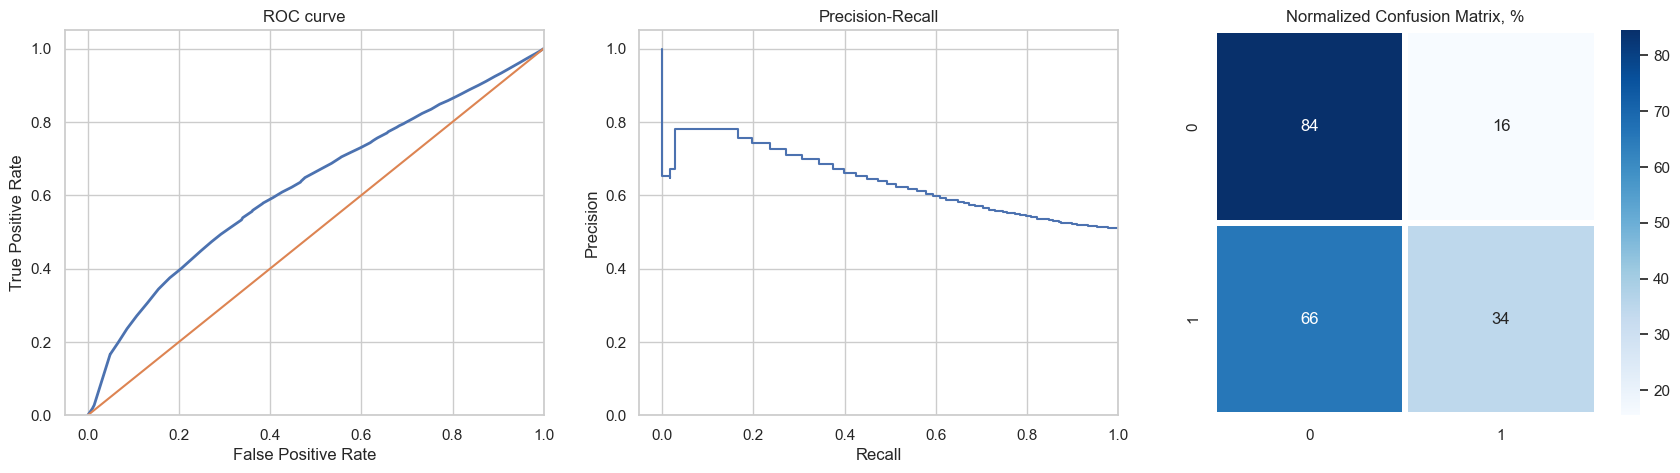

Metrics values:


,metrics,score
0,accuracy,0.589068
1,precision,0.698640
2,recall,0.344050
3,f1,0.461052
4,auc,0.625576


In [202]:
create_metrics(model_cb, X_test, y_test, False)

## Промежуточные выводы после оценки моделей

Можно сказать, что на основе текущих признаков нельзя создать эффективную модель, способную точно предсказывать вероятность степени виновности в ДТП.

# Анализ важности факторов ДТП

Feature importances:


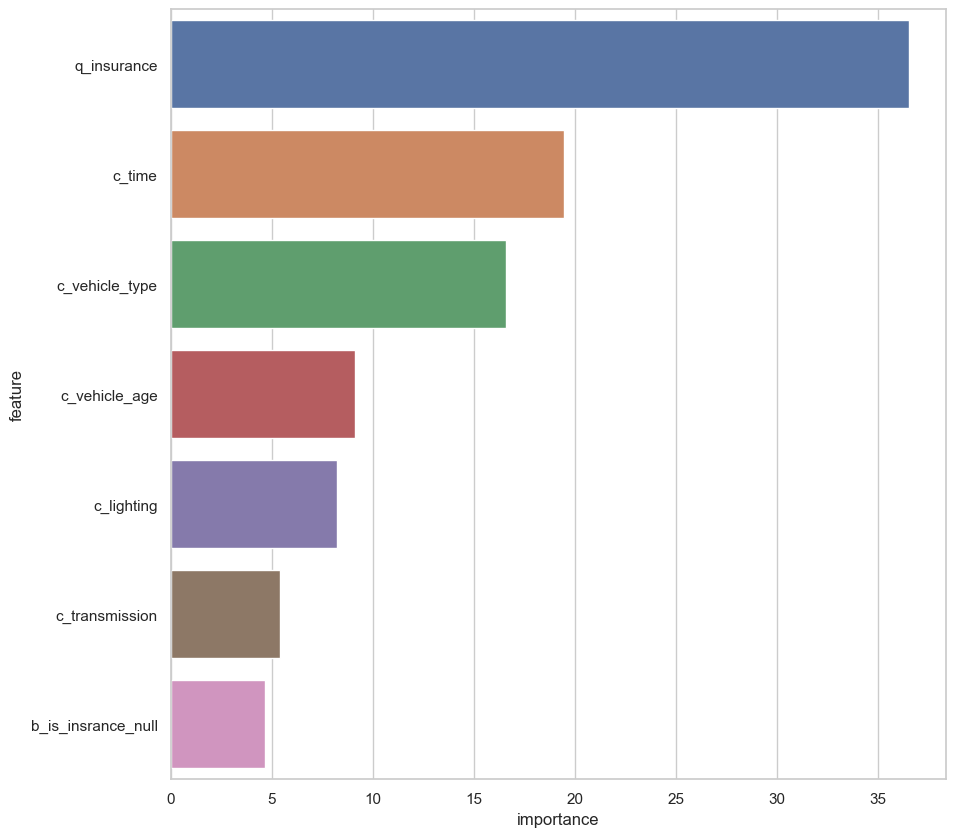

In [203]:
get_feature_importances(model=model_cb, X_train=X_train)

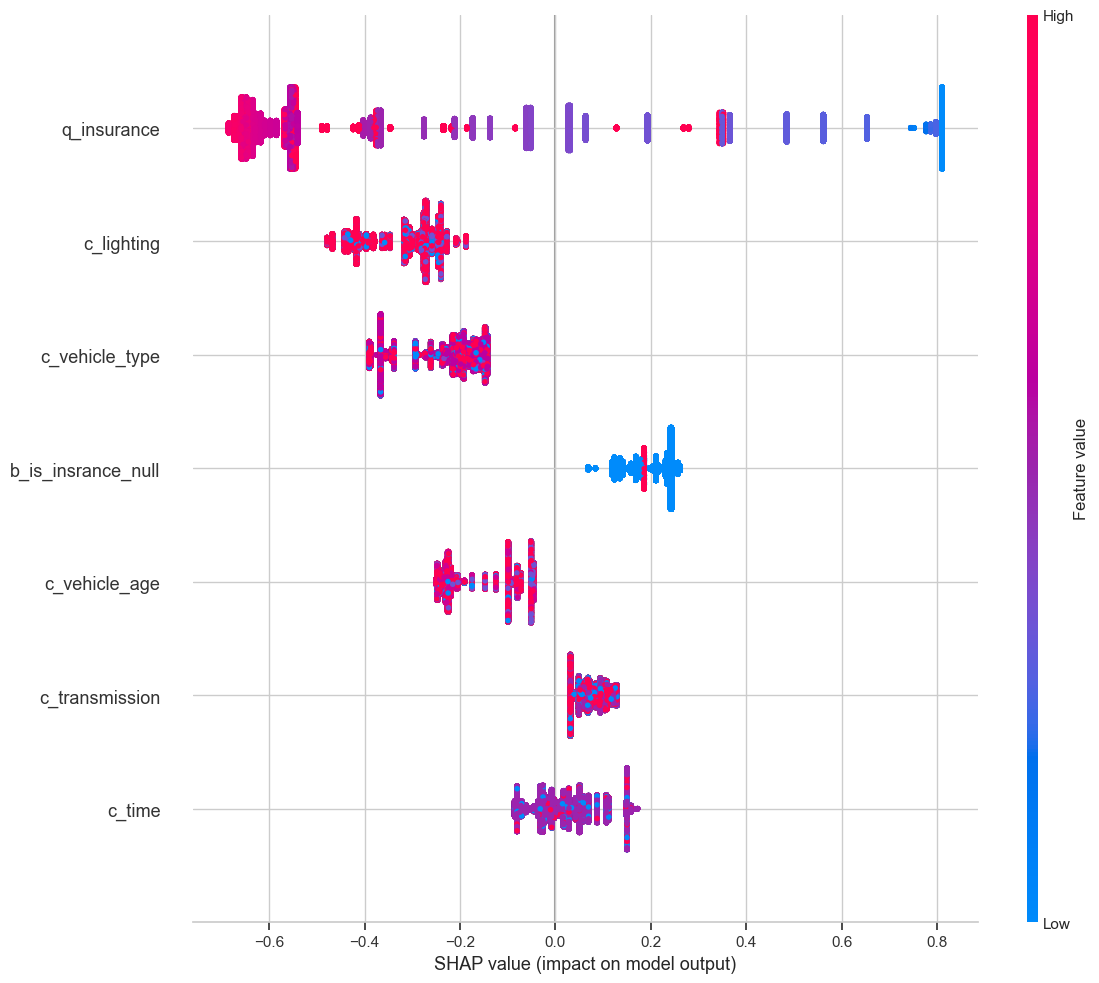

In [204]:
get_shap(model_cb, X_train, y_train)

# Выводы

В данной работе были исследованы данные о произошедших ДТП с целью ответить на вопросы заказчика:
-   Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
-   Какие ещё факторы нужно учесть?
-   Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Развернуто ответим на них, опираясь на полученные выше результаты.


#### 1. Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?

На основе предоставленных данных так как:
1. Все представленные данные описывают совершенное ДТП и не содержат наблюдений о достижениях маршрута без происшествий;
2. Целевой признак `at_fault` представляет собой виновность участника в произошедшем ДТП.

Тем не менее была предпринята попытка создать систему оценки предсказания виновности участника ДТП.
Однако данная попытка не увеначалась успехом так как:
1. Виновность ДТП зависит нетолько от внешних и внутренних факторов, которые можно измерить (освещенность дороги, срок эксплуатации автомобиля и т.д.), но также и от частично или полностью неподконтрольных водителю действий других участников движения;
2. Исходя из результатов иследоватльского анализа, можно сказать, что наибольшим влиянием на виновность в ДТП обладает степень трезовсти водителя и его физическое и ментальное состояние. Однако оба фактора имеют природы "информации из будущего" или data leakage в представленных данных, что обуславливает их исключения из моделирования предсказания виновности водителя.

Таким образом, можно сказать, что представленные данные могут готиться лишь для исследований и статистического анализа ДТП, но не для моделирования.

#### 2. Какие ещё факторы нужно учесть?

Поскольку представленные данные не имеют наблюдений завершения маршрута без ДТП, в первую очередь их необходимо обогатить именно подобными, успешными, поездками.

Также наиболее ценными являются факторы степени трезвости водителя и его ментально-психологического состояния. Тем немененее, поскольку нетрезвые водители представляют угрозу нетолько своему здоровью и жизни, но и другим участникам движения, а также явно нарушают ПДД, необходимо обогащать эти данные безопасным способом.

Помимо этого крайне полезной может оказаться следующая информация:
1. Информация о заказе:
    - Частота нарушений ПДД водителем
    - Стаж и возраст водителя
    - Занопослушность водителя
    - Наличие детей и других пассажариов в авто
    - Длина и "сложность" маршрута
2. Информация о движении машины:
    - Средняя скорость
    - Среднее время заезда


#### 3. Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Это может быть полезным по многим причинам, выходящим за рамки данного исследования, а также с помощью камер можно отслеживать состояние водителя и пассажиров.


Таким образом цели данной работы являются выполненными.